<a href="https://colab.research.google.com/github/Rudrajit12/BigBasket-Product-Assortment-Optimization/blob/main/BigBasket_Product_Assortment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Optimizing Product Assortment and Pricing Strategy for BigBasket**

## **📌 Problem Statement**

BigBasket, India’s leading online grocery platform, offers thousands of products spanning multiple categories, subcategories, and brands. However, with a rapidly expanding product catalog, the company faces challenges in maintaining an optimal product assortment, ensuring competitive pricing, and offering a diverse and appealing brand portfolio.

To stay ahead in the competitive online grocery market, BigBasket needs to ensure its offerings are balanced, strategically priced, and tailored to customer preferences. This project aims to analyze the current product lineup using a comprehensive dataset of ~28,000 products to uncover opportunities for category improvement, price optimization, and brand strategy enhancements.

---

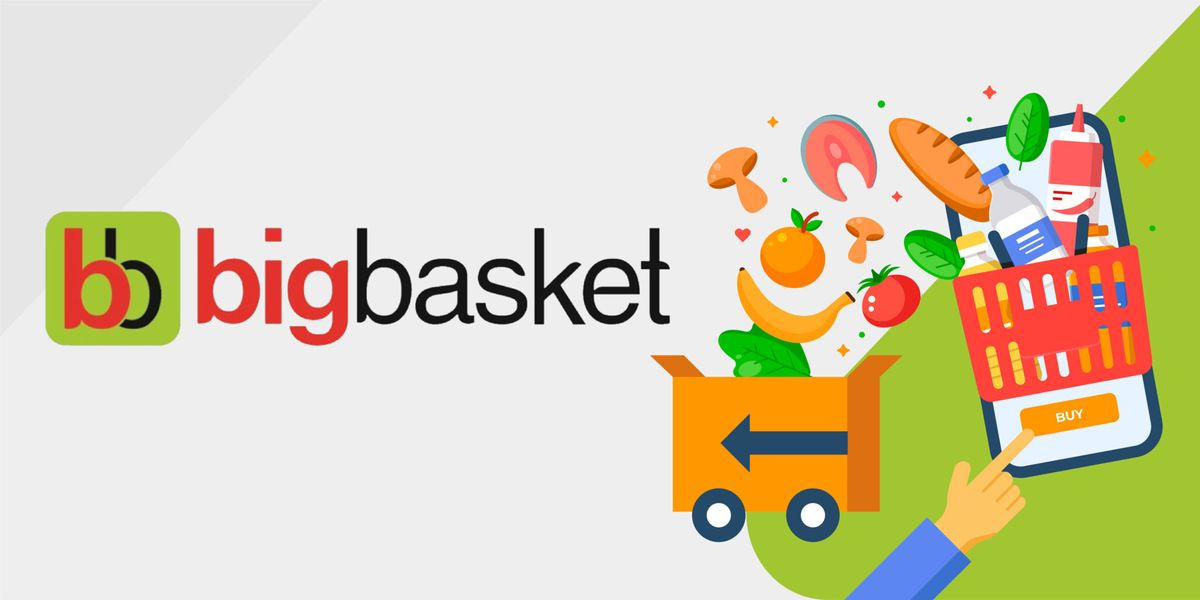

## **🎯 Business Objectives**

This project is designed to support strategic decision-making in the following key areas:

1. Product Assortment Optimization
  - Evaluate the breadth and depth of product coverage across categories and subcategories.

  - Identify underrepresented or overrepresented categories/subcategories.

  - Detect redundant or potentially outdated product entries.

2. Pricing Strategy Analysis
  - Analyze price distributions within and across categories and subcategories.

  - Detect pricing inconsistencies or outliers.

  - Compare price positioning of different brands within the same subcategory.

3. Brand and Category Positioning
  - Assess brand dominance within each category and subcategory.

  - Identify categories with low brand diversity (monopoly risks) or high fragmentation.

  - Surface opportunities for private label development or third-party brand partnerships.

4. Opportunity and Gap Identification
  - Discover product gaps in high-performing categories with limited options.

  - Highlight categories with a wide range of prices, suggesting tiered product strategies.

  - Identify areas for bundling or promotional focus to increase customer value perception.

---

**🎯 Objective 1: Product Assortment Optimization**

✅ KPIs:
- 🧾 Total Number of Unique Products

- 📦 Number of Unique Categories and Subcategories

- 📊 Product Count per Category/Subcategory

- 🔁 Duplicate/Redundant Product Rate

- 📉 Low-Assortment Categories (categories with < X products)

❓ Analytical Questions:
- How many distinct categories and subcategories exist?

- Which categories are overloaded or underrepresented in product variety?

- Are there categories with excessive product duplication or very similar SKUs?

**💸 Objective 2: Pricing Strategy Analysis**

✅ KPIs:
- 💲 Average Price per Category/Subcategory

- 📈 Price Range (Min-Max) per Category

- 🪙 Standard Deviation of Prices per Category (to check volatility)

- 📉 Price Outlier Count (products far from the mean/median)

- 🏷️ Price Tiers Distribution (e.g., % of low/mid/high-priced products)

❓ Analytical Questions:
- Are there pricing inconsistencies within the same subcategory?

- Which categories have the most/least pricing volatility?

- Do similar products from different brands have different prices?

- Are there subcategories where luxury or economy pricing dominates?

**🧼 Objective 3: Brand and Category Positioning**

✅ KPIs:
- 🏭 Number of Unique Brands per Category/Subcategory

- 👑 Top 5 Brands by Product Count in Each Category

- 📊 Brand Share (%) within Subcategories

- 📉 Categories with Brand Monopolies (<2 brands)

❓ Analytical Questions:
- Are certain brands dominating specific categories?

- Which categories have the highest brand diversity?

- Are there categories where BigBasket could launch private-label products due to low brand presence?

**📈 Objective 4: Opportunity and Gap Identification**

✅ KPIs:
- 📉 Categories with Low Product Counts but High Price Averages

- 🕳️ Subcategories with Few Brands and High Prices

- 🧃 Potential Bundling Candidates (products in same subcategory with similar prices)

- 📦 Categories Lacking Tiered Options (no low/mid/high pricing segments)

❓ Analytical Questions:
- Are there gaps in product variety in high-demand categories?

- Can we identify areas where more affordable or premium products could be introduced?

- Are there bundling opportunities based on pricing and subcategory clustering?

---

### 📘 **Step 1: Data Loading**

In this first step, we’ll load the dataset and take an initial look at its structure. We'll use Pandas, a powerful Python library commonly used for data analysis and manipulation.

📌 **Why this step matters:**
Before diving into analysis, it's important to load the dataset into memory so we can explore, clean, and visualize it. It also helps us confirm that the data was read correctly and is structured as expected.

**About the Dataset:**

​The "BigBasket Entire Product List (~28K datapoints)" dataset, available on Kaggle, comprises approximately 28,000 product entries from BigBasket, a leading online grocery store in India. This dataset includes detailed information on various products, such as product names, categories, subcategories, brands, and prices. It serves as a valuable resource for analyzing product assortments, pricing strategies, and market trends within the online grocery sector.

In [ ]:
# Loading and importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = [13,9]
sns.set(rc={'figure.figsize':(13,9)})

In [ ]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Loading the data
bb_df = pd.read_csv('/content/drive/MyDrive/EDA Projects/BigBasket Product Assortment Analysis/BigBasket Products.csv')
bb_df.head()

index                                            product  \
0      1             Garlic Oil - Vegetarian Capsule 500 mg   
1      2                              Water Bottle - Orange   
2      3                     Brass Angle Deep - Plain, No.2   
3      4  Cereal Flip Lid Container/Storage Jar - Assort...   
4      5                 Creme Soft Soap - For Hands & Body   

                 category           sub_category              brand  \
0        Beauty & Hygiene              Hair Care  Sri Sri Ayurveda    
1  Kitchen, Garden & Pets  Storage & Accessories         Mastercook   
2    Cleaning & Household            Pooja Needs                Trm   
3    Cleaning & Household   Bins & Bathroom Ware             Nakoda   
4        Beauty & Hygiene       Bath & Hand Wash              Nivea   

   sale_price  market_price                      type  rating  \
0       220.0         220.0          Hair Oil & Serum     4.1   
1       180.0         180.0    Water & Fridge Bottles     2.3   
2       119.0         250.0           Lamp & Lamp Oil     3.4   
3       149.0         176.0  Laundry, Storage Baskets     3.7   
4       162.0         162.0      Bathing Bars & Soaps     4.4   

                                         description  
0  This Product contains Garlic Oil that is known...  
1  Each product is microwave safe (without lid), ...  
2  A perfect gift for all occasions, be it your m...  
3  Multipurpose container with an attractive desi...  
4  Nivea Creme Soft Soap gives your skin the best...

In [ ]:
# last 5 rows of the data
bb_df.tail()

index                                     product  \
27550  27551  Wottagirl! Perfume Spray - Heaven, Classic   
27551  27552                                    Rosemary   
27552  27553                Peri-Peri Sweet Potato Chips   
27553  27554                   Green Tea - Pure Original   
27554  27555              United Dreams Go Far Deodorant   

                   category              sub_category  \
27550      Beauty & Hygiene         Fragrances & Deos   
27551  Gourmet & World Food    Cooking & Baking Needs   
27552  Gourmet & World Food  Snacks, Dry Fruits, Nuts   
27553             Beverages                       Tea   
27554      Beauty & Hygiene            Men's Grooming   

                            brand  sale_price  market_price  \
27550                      Layerr      199.20         249.0   
27551                    Puramate       67.50          75.0   
27552                      FabBox      200.00         200.0   
27553                      Tetley      396.00         495.0   
27554  United Colors Of Benetton       214.53         390.0   

                           type  rating  \
27550                   Perfume     3.9   
27551  Herbs, Seasonings & Rubs     4.0   
27552            Nachos & Chips     3.8   
27553                  Tea Bags     4.2   
27554          Men's Deodorants     4.5   

                                             description  
27550  Layerr brings you Wottagirl Classic fragrant b...  
27551  Puramate rosemary is enough to transform a dis...  
27552  We have taken the richness of Sweet Potatoes (...  
27553  Tetley Green Tea with its refreshing pure, ori...  
27554  The new mens fragrance from the United Dreams ...

💬 **What this code does:**

* We import pandas and use the alias pd, which is standard in the Python data community.

* We define the file path and use pd.read_csv() to read the CSV file into a DataFrame (a tabular structure like a spreadsheet).

* df.head() lets us preview the first 5 rows so we can get a feel for what the data looks like.

---

### **📘 Step 2: Data Overview & Basic Info**

**📌 Why this step matters:**

Before we clean, transform, or analyze the data, we need to:

- Understand how much data we have and what type it is

- Identify missing values, inconsistent formats, and potential outliers

- Figure out which columns are important and what needs preprocessing

#### **🧾 2.1 Dataset Dimensions**

In [ ]:
# Shape of the dataset
print(f"The dataset contains {bb_df.shape[0]} rows and {bb_df.shape[1]} columns.")

The dataset contains 27555 rows and 10 columns.


🔍 This means we’re analyzing 27,555 grocery products across 10 features, which is a substantial catalog for BigBasket.

#### **🧾 2.2 Column Names and Data Types**

In [ ]:
# View column names and data types
bb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27555 entries, 0 to 27554
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         27555 non-null  int64  
 1   product       27554 non-null  object 
 2   category      27555 non-null  object 
 3   sub_category  27555 non-null  object 
 4   brand         27554 non-null  object 
 5   sale_price    27555 non-null  float64
 6   market_price  27555 non-null  float64
 7   type          27555 non-null  object 
 8   rating        18929 non-null  float64
 9   description   27440 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 2.1+ MB


**🔍 df.info() helps us understand:**

- Which columns are categorical vs numerical

- Where missing data exists

- Data types, which will affect how we clean and analyze each column

**📌 Key Observations:**

✅ Most columns are non-null, but we do see:

  - 1 missing value in product

  - 1 missing value in brand

  - 115 missing values in description

  - 8,626 missing values in rating (~31%)

✅ Data types are appropriate:

  - sale_price, market_price, and rating are floats (numerical)

  - Others are either object (categorical/text) or int64 (for index)

#### **🧾 2.3 Summary Statistics for Numerical Columns**

In [ ]:
# Basic statistical summary for numerical features
bb_df.describe()

index    sale_price  market_price        rating
count  27555.00000  27555.000000  27555.000000  18929.000000
mean   13778.00000    322.514808    382.056664      3.943410
std     7954.58767    486.263116    581.730717      0.739063
min        1.00000      2.450000      3.000000      1.000000
25%     6889.50000     95.000000    100.000000      3.700000
50%    13778.00000    190.000000    220.000000      4.100000
75%    20666.50000    359.000000    425.000000      4.300000
max    27555.00000  12500.000000  12500.000000      5.000000

**🧠 Insights from the Numerical Summary:**

**💸 Prices: sale_price & market_price**
- Average sale price: ₹322.51, market price: ₹382.06

- Median values (50th percentile): ₹190 (sale), ₹220 (market) → skewed right due to high-value outliers

- Min values: ₹2.45 (sale), ₹3.00 (market) → very cheap or small-quantity items

- Max values: ₹12,500 for both → likely bulk products, premium items, or potential data errors

- Standard deviations are high → prices vary widely across products

✅ We’ll later calculate:

- Discount amount = market_price - sale_price

- Discount % = (market_price - sale_price) / market_price

This can help with pricing strategy and promotional effectiveness analysis.

**⭐ Ratings**
- Mean rating: 3.94 out of 5 — indicates generally positive feedback

- Median: 4.1, 75% of products score above 4.3

- Min: 1.0, Max: 5.0

- Standard deviation: ~0.74, suggesting a decent spread in user opinions

- ~8,626 missing values (from Step 2.2) → ~31% of products are unrated

📌 Note: We'll later investigate whether missing ratings correlate with:

- Specific categories or sub-categories

- New/less popular brands or SKUs

**⚠️ Skewed Distributions & Outliers**
- Both sale_price and market_price are heavily right-skewed

- With prices ranging from ₹2.45 to ₹12,500, we’ll need to handle outliers using:

  - Log transformation (for visualization)

  - Segmentation (e.g., low, mid, high-priced product tiers)

- These outliers will strongly influence averages, so medians and percentiles are key for fair comparisons.


#### **🧾 2.4 Checking for Missing Values**

In [ ]:
# Total missing values per column
bb_df.isnull().sum()

index              0
product            1
category           0
sub_category       0
brand              1
sale_price         0
market_price       0
type               0
rating          8626
description      115
dtype: int64

**🔍 Summary:**

- rating has ~31% missing values

- description is missing in 115 products — negligible proportion (~0.4%)

- product and brand each have just 1 missing value

**🔧 Action Plan:**

- rating: Analyze separately → consider imputation, flagging, or exclusion

- description: Optional field, low impact

- product/brand: Drop or fill — depends on row context during cleaning

#### **🧾 2.5 Checking for Duplicate Records**

In [ ]:
# Total number of duplicate rows
bb_df.duplicated().sum()

np.int64(0)

✅ No duplicate records found — the dataset is clean in this regard.

---

### **📦 Step 3: Data Cleaning & Preprocessing**

**📌 Why this step matters:**

Before any meaningful analysis, we need to:

  - Fix missing or invalid data

  - Remove or handle duplicates

  - Engineer useful features (e.g., discount percentage)

  - Ensure data types and values are consistent

#### **🧼 3.1 Handling Missing Values**

**🧠 Observations:**

- product: Only 1 missing → we can drop this row

- brand: Also just 1 missing → drop this row too

- rating: 8626 missing (~31% of data) → too many to drop, we’ll retain and analyze separately

- description: 115 missing (~0.4%) → we can either fill with "No description" or drop

In [ ]:
# Dropping rows with missing product or brand names
bb_df = bb_df.dropna(subset=['product', 'brand'])

# Filling missing descriptions with a placeholder
bb_df['description'] = bb_df['description'].fillna("No description available")

In [ ]:
# check for missing values again
bb_df.isnull().sum()

index              0
product            0
category           0
sub_category       0
brand              0
sale_price         0
market_price       0
type               0
rating          8625
description        0
dtype: int64

**🧠 Notes on rating:**

We’ll keep missing ratings as is for now, since:

  - Some products might not have been rated yet (new or low volume).

  - It's still useful to include them in broader category/brand analysis.

#### **🧹 3.2 Dropping the index Column**

**📌 Why we drop it:**

- The index column just reflects the row number — it doesn’t carry any analytical or domain-specific value.

- Pandas already uses a built-in index for row identification, so retaining a duplicate is unnecessary.

In [ ]:
# Dropping the 'index' column
bb_df.drop(columns=['index'], inplace=True)

# Confirming the new shape of the dataset
print(f"Updated dataset shape: {bb_df.shape}")

Updated dataset shape: (27553, 9)


#### **🧮 3.3: Feature Engineering and Data Formatting**

**🛠️ 3.3.1: Standardize Column Names**

**📌 Why this matters:**

- Ensures consistency and avoids bugs during coding (e.g., no accidental typos due to case sensitivity or spaces).

- Makes it easier to reference columns programmatically.

In [ ]:
# Standardizing all column names to lowercase with underscores
bb_df.columns = bb_df.columns.str.strip().str.lower().str.replace(' ', '_')

# Verifying column names
print(bb_df.columns.tolist())

['product', 'category', 'sub_category', 'brand', 'sale_price', 'market_price', 'type', 'rating', 'description']


**🛠️ 3.3.2: Convert Data Types if Necessary**

**📌 Why this matters:**

- Ensures that each column has the appropriate data type for analysis.

- For instance, dates should be in datetime format, numeric columns should be float or int, and categories could be converted to the 'category' dtype for efficiency.

In [ ]:
# Check current data types again for reference
bb_df.dtypes

product          object
category         object
sub_category     object
brand            object
sale_price      float64
market_price    float64
type             object
rating          float64
description      object
dtype: object

**🔍 From earlier output:**

- category, sub_category, brand, and type are object types (strings).

- These could benefit from being converted to the category type for:

  - Memory optimization (less space used)

  - Faster groupby and filtering operations

- rating, sale_price, and market_price are already float64 — which is appropriate.

In [ ]:
# Convert object-type columns that are categorical to 'category' dtype
categorical_cols = ['category', 'sub_category', 'brand', 'type']
bb_df[categorical_cols] = bb_df[categorical_cols].astype('category')

# Confirm the conversion
bb_df.dtypes

product           object
category        category
sub_category    category
brand           category
sale_price       float64
market_price     float64
type            category
rating           float64
description       object
dtype: object

**🛠️ 3.3.3: Creating New Derived Columns**

**📌 Why this matters:**

Sometimes, raw data doesn't contain all the insights directly. Derived features help:

  - Reveal hidden patterns

  - Enable comparative analysis (e.g., discounts, margins)

  - Support KPI tracking and business decision-making

**💡 What we can create:**

1. Discount Amount = Market Price - Sale Price

  → Tells us how much discount is offered.

2. Discount Percentage
  
  → Helps in analyzing promotional pricing strategies across categories/brands.

In [ ]:
# Create discount amount column
bb_df['discount_amount'] = bb_df['market_price'] - bb_df['sale_price']

# Create discount percentage column (avoid division by zero)
bb_df['discount_percent'] = ((bb_df['discount_amount'] / bb_df['market_price']) * 100).round(2)

# Handle cases where market_price is 0 (if any)
bb_df['discount_percent'].replace([float('inf'), -float('inf')], 0, inplace=True)

# Preview the new columns
bb_df[['product', 'sale_price', 'market_price', 'discount_amount', 'discount_percent']].head()

product  sale_price  \
0             Garlic Oil - Vegetarian Capsule 500 mg       220.0   
1                              Water Bottle - Orange       180.0   
2                     Brass Angle Deep - Plain, No.2       119.0   
3  Cereal Flip Lid Container/Storage Jar - Assort...       149.0   
4                 Creme Soft Soap - For Hands & Body       162.0   

   market_price  discount_amount  discount_percent  
0         220.0              0.0              0.00  
1         180.0              0.0              0.00  
2         250.0            131.0             52.40  
3         176.0             27.0             15.34  
4         162.0              0.0              0.00

**🧠 Key Insights:**

- These derived features will be extremely useful for the Pricing Strategy Analysis objective.

- We’ll be able to:

  - Compare brand-level discounting

  - Identify high-discount categories

  - Explore correlation between discount and rating

**🛠️ 3.3.4: Handling Edge Cases in Prices and Ratings**

**📌 Why this matters:**

Even though we’ve cleaned missing values, we still need to ensure:

- There are no zero or negative prices (unless valid for promotions)

- Unusually high prices or ratings outside 1–5 don’t sneak in

- We don’t include junk or placeholder values in analysis

**🔍 Check for zero or negative prices:**

In [ ]:
# Check for products with sale_price <= 0
zero_price_products = bb_df[bb_df['sale_price'] <= 0]
print(f"Products with zero or negative sale price: {len(zero_price_products)}")

# Check for products with market_price <= 0
zero_market_price = bb_df[bb_df['market_price'] <= 0]
print(f"Products with zero or negative market price: {len(zero_market_price)}")

Products with zero or negative sale price: 0
Products with zero or negative market price: 0


**🔍 Check for invalid ratings:**

In [ ]:
# Check for ratings outside the range 1 to 5
invalid_ratings = bb_df[(bb_df['rating'] < 1) | (bb_df['rating'] > 5)]
print(f"Products with invalid ratings: {len(invalid_ratings)}")

Products with invalid ratings: 0


**✅ Results from our dataset:**

Since your earlier describe() showed:

- Minimum sale_price = 2.45 (✅ reasonable)

- Minimum market_price = 3.0 (✅ okay)

- Ratings range from 1.0 to 5.0 (✅ valid)

We’re good — no action needed here.

#### **🛠️ 3.4: Encoding Categorical Features**

**📌 Why this step matters:**

Before we perform grouping, aggregation, or modeling, we often:

- Ensure categorical columns are clean, consistent, and usable

- If needed, normalize category labels (e.g., "Snacks" vs "snacks")

- Later, for modeling: encode strings as numbers

**🎯 Target Columns:**

We’re mainly interested in these categorical columns:

- product (string names, won't be encoded but used in analysis)

- category ✅

- sub_category ✅

- brand ✅

- type ✅

**🧼 Step 3.4.1: Normalize Categorical Strings**

Let’s lowercase all text values and remove extra spaces (to avoid duplicates like "Beverages" vs "beverages ").

In [ ]:
# Strip whitespaces and lowercase all applicable categorical columns
cat_cols = ['product', 'category', 'sub_category', 'brand', 'type']

for col in cat_cols:
    bb_df[col] = bb_df[col].str.strip().str.lower()

**🔍 Quick check after cleanup:**

In [ ]:
# View unique category and type values
print("Unique products:", bb_df['product'].nunique())
print("Unique categories:", bb_df['category'].nunique())
print("Unique subcategories:", bb_df['sub_category'].nunique())
print("Unique brands:", bb_df['brand'].nunique())
print("Unique types:", bb_df['type'].nunique())

Unique products: 23510
Unique categories: 11
Unique subcategories: 90
Unique brands: 2312
Unique types: 426


---

**💭 Should We Cap or Preserve Outliers?**

**📦 Context of the Dataset:**

We're analyzing product listings from BigBasket, and the pricing columns (sale_price and market_price) reflect the diversity of products sold — from basic grocery items to premium goods.

**✅ Reasons to Preserve Outliers:**

📈 Natural Price Variance
- Higher prices could belong to bulk items, premium brands, imported goods, etc. These aren’t errors — they reflect reality.

📊 Strategic Importance
- Outliers might actually highlight interesting insights (e.g., luxury pricing, niche categories).

🧠 Business Use Case
- Since this is an EDA project, not a model, we care more about understanding the distribution, not forcing normalization.

🎯 Price Tier Analysis
- Outliers will help in detecting the spread of pricing tiers (low/mid/high), which is part of our project objectives.

---

### **📘 Step 4: Univariate Analysis**

**📌 Why this step matters:**

Before diving into relationships between features, it’s essential to understand each column individually. This step helps us:

- Understand distributions and spread (for numerical columns)

- Detect skewness, outliers, and dominant values

- See frequency distributions for categorical columns

- Identify potential feature transformations

#### **🧾 4.1 Analyzing sale_price**

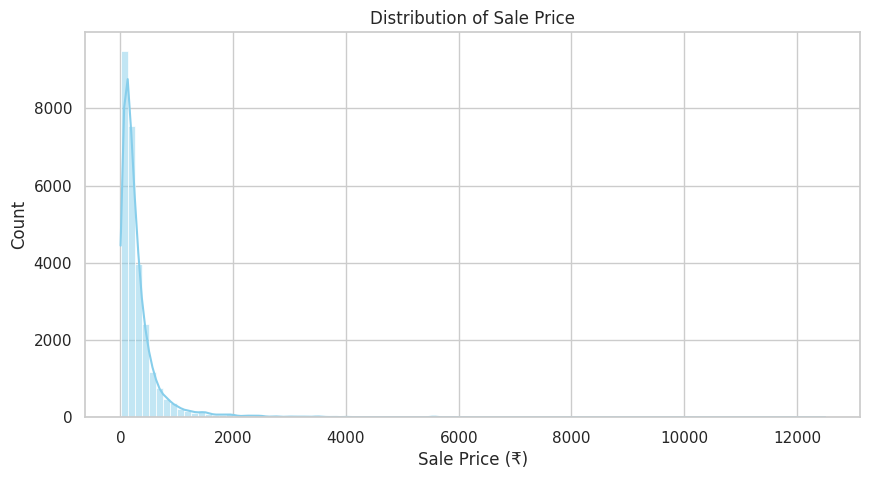

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual theme
sns.set(style="whitegrid")

# Plotting distribution of sale_price
plt.figure(figsize=(10, 5))
sns.histplot(bb_df['sale_price'], bins=100, kde=True, color='skyblue')
plt.title("Distribution of Sale Price")
plt.xlabel("Sale Price (₹)")
plt.ylabel("Count")
plt.show()

**💬 What this code does:**

- We use histplot() from Seaborn to plot the frequency distribution of product sale_price.

- kde=True adds a smooth curve to understand the shape.

- Binning is increased to 100 for better detail across the range.

**📊 Observations:**

- Most products are priced below ₹500, indicating the dominance of low- to mid-priced goods.

- There’s a long right tail, confirming some high-priced premium items (e.g., gourmet, imported, bulk packs).

- Distribution is highly right-skewed — which is expected in consumer pricing datasets.

📌 We'll also try a log transformation to better view the spread:

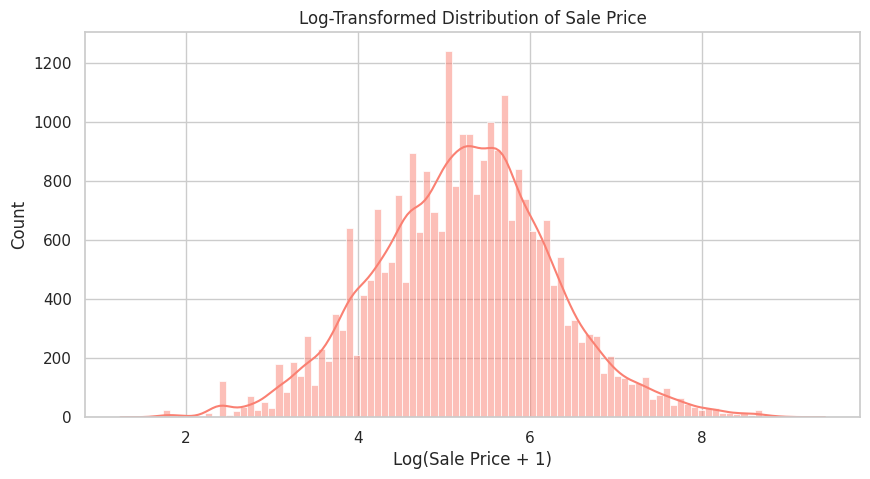

In [ ]:
import numpy as np

# Plot log-transformed sale prices
plt.figure(figsize=(10, 5))
sns.histplot(np.log1p(bb_df['sale_price']), bins=100, kde=True, color='salmon')
plt.title("Log-Transformed Distribution of Sale Price")
plt.xlabel("Log(Sale Price + 1)")
plt.ylabel("Count")
plt.show()

🔍 This transformation flattens the skew, helping us compare product prices across all ranges more easily later on.

#### **🧾 4.2 Analyzing market_price**

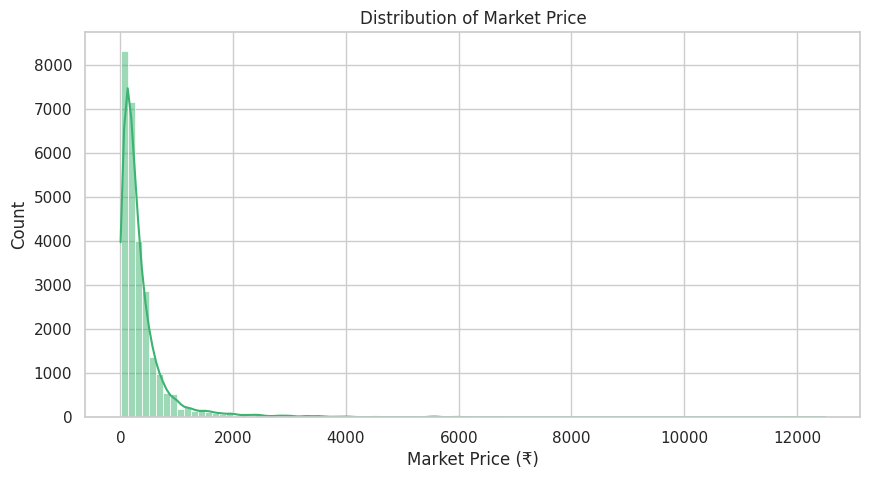

In [ ]:
# Distribution of market_price
plt.figure(figsize=(10, 5))
sns.histplot(bb_df['market_price'], bins=100, kde=True, color='mediumseagreen')
plt.title("Distribution of Market Price")
plt.xlabel("Market Price (₹)")
plt.ylabel("Count")
plt.show()

**📊 Observations:**

- Similar to sale_price, most products have a market price below ₹500, with heavy concentration in the lower range.

- The distribution is right-skewed, indicating a handful of premium/high-MRP items.

- Outliers exist (up to ₹12,500), but they may be valid (e.g., bulk grocery items, high-end oils, dry fruits, or imported goods).

📌 Let’s apply a log transformation again to get a normalized view:

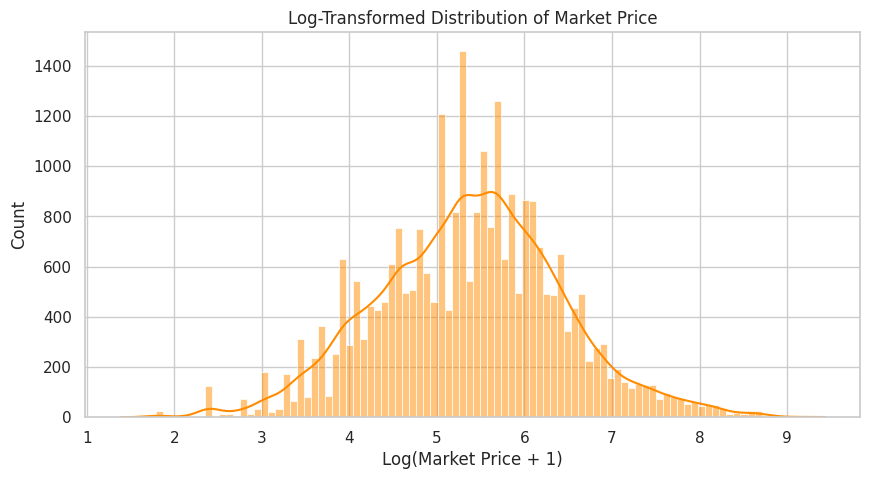

In [ ]:
# Log-transformed view of market_price
plt.figure(figsize=(10, 5))
sns.histplot(np.log1p(bb_df['market_price']), bins=100, kde=True, color='darkorange')
plt.title("Log-Transformed Distribution of Market Price")
plt.xlabel("Log(Market Price + 1)")
plt.ylabel("Count")
plt.show()

**🔍 Insights from Log View:**

- The log-transformed plot gives us a more symmetric shape, useful for comparing prices across brands or subcategories later.

- It confirms that a majority of items cluster in the ₹50–₹500 market price range, with a gradual drop-off toward higher values.

#### **🧾 4.3 Analyzing rating**

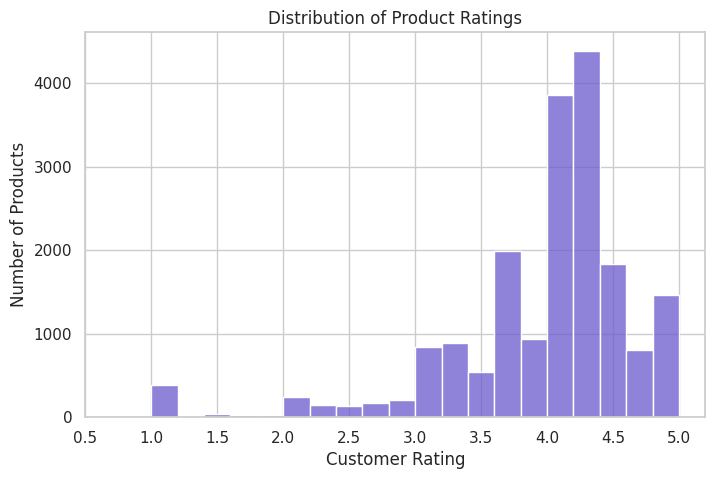

In [ ]:
# Distribution of ratings
plt.figure(figsize=(8, 5))
sns.histplot(bb_df['rating'], bins=20, kde=False, color='slateblue')
plt.title("Distribution of Product Ratings")
plt.xlabel("Customer Rating")
plt.ylabel("Number of Products")
plt.xticks(np.arange(0.5, 5.5, 0.5))
plt.show()

**💬 What this code does:**

- Visualizes the spread of product ratings across the dataset using a histogram.

- Helps us see how frequently each rating score appears.

**📊 Observations:**

- Ratings are mostly concentrated between 3.5 and 5, with 4.1 being the median (from earlier stats).

- Very few products have ratings below 3.

- A large chunk of entries are clustered at high ratings (4.0–4.5), which is common in customer-reviewed marketplaces due to bias toward higher ratings or filtering.

- Missing values exist (about 8.6k+ entries with no ratings, as seen earlier), likely because:

  - New or unpopular products haven’t received reviews yet.

  - Some SKUs aren’t rated on BigBasket’s site.

**🧠 What this means for us:**

We’ll need to handle missing ratings thoughtfully in analysis — either:

- Exclude them when studying product satisfaction,

- Or impute/flag them separately to study their impact.

In [ ]:
# Grouping ratings
bb_df['rating'].value_counts().sort_index()

rating
1.0     387
1.2       2
1.3       9
1.4       6
1.5      32
1.6       3
1.7      22
1.8      22
1.9       4
2.0     237
2.1      10
2.2      24
2.3      94
2.4      29
2.5     132
2.6      58
2.7     116
2.8     125
2.9      79
3.0     684
3.1     163
3.2     181
3.3     400
3.4     303
3.5     536
3.6     447
3.7     672
3.8     866
3.9     932
4.0    2090
4.1    1769
4.2    2250
4.3    2140
4.4    1038
4.5     798
4.6     322
4.7     287
4.8     199
4.9      53
5.0    1407
Name: count, dtype: int64

#### **🧾 4.4 Analyzing type Column**

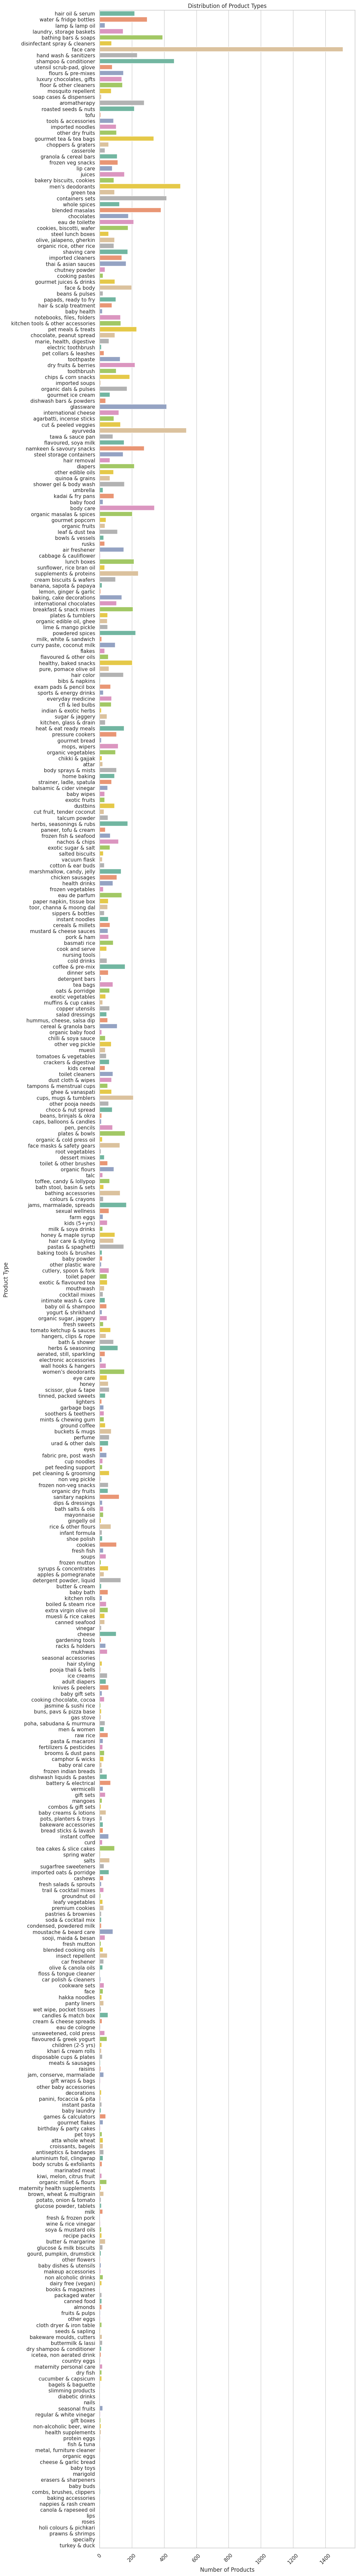

In [ ]:
# Count of product types
plt.figure(figsize=(10, 100))
sns.countplot(data=bb_df, y='type', palette='Set2')
plt.title("Distribution of Product Types")
plt.xlabel("Number of Products")
plt.ylabel("Product Type")
plt.xticks(rotation=45)
plt.show()

**📊 Observations:**

- The majority of products are marked as veg, which is expected in an Indian grocery setting.

- A small portion is non-veg, likely meat, fish, etc.

- eggs are listed separately — possibly because they are often treated as a category on their own in India.

- There might also be some other rare or mislabeled entries — we should double-check for inconsistencies like typos or blank types.

Let’s confirm this by checking all unique values:

In [ ]:
# Unique product types and their counts
bb_df['type'].value_counts(dropna=False)

type
face care                1508
ayurveda                  538
men's deodorants          500
shampoo & conditioner     461
glassware                 415
                         ... 
bagels & baguette           1
roses                       1
prawns & shrimps            1
specialty                   1
turkey & duck               1
Name: count, Length: 426, dtype: int64

#### **🧾 4.5 Analyzing brand Column**

In [ ]:
# Number of unique brands
num_brands = bb_df['brand'].nunique()
print(f"🔢 Total Unique Brands: {num_brands}")

🔢 Total Unique Brands: 2312


This tells us how many distinct brands are present in the dataset — a good KPI to measure brand diversity.

**📊 Top Brands by Product Count**

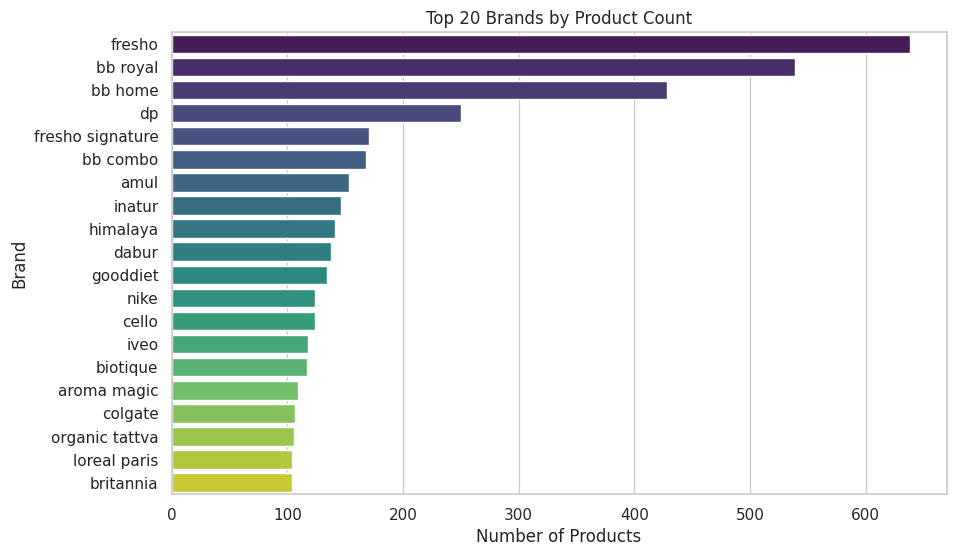

In [ ]:
# Top 20 brands by number of products
top_brands = bb_df['brand'].value_counts().head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_brands.values, y=top_brands.index, palette='viridis')
plt.title("Top 20 Brands by Product Count")
plt.xlabel("Number of Products")
plt.ylabel("Brand")
plt.show()

**💬 What this code does:**

- Displays the top 20 brands with the most number of listed products.

- Horizontal bar plot is easier to read for long brand names.

**🧠 Key Insights:**

- You’ll likely see BigBasket’s private label brands (like BB Royal, BB Popular) dominating the top.

- Some national brands (e.g., Aashirvaad, Amul, Haldiram's) may also appear.

- This helps identify brand monopolies or oversaturation, which links to our business objective on brand positioning.

**🔍 Additional Check: Missing or Inconsistent Brand Names**

In [ ]:
# Count of missing or null brand values
bb_df['brand'].isnull().sum()

np.int64(0)

#### **🧾 4.6 Analyzing category and sub_category Columns**

These two together define the product hierarchy, and they’re foundational for nearly all business objectives, especially:

- 🛒 Product Assortment Optimization

- 💰 Pricing Strategy

- 📦 Opportunity and Gap Identification

**🔢 Number of Unique Categories and Subcategories**

In [ ]:
# Unique categories and subcategories
num_categories = bb_df['category'].nunique()
num_subcategories = bb_df['sub_category'].nunique()

print(f"🧺 Unique Categories: {num_categories}")
print(f"🔖 Unique Subcategories: {num_subcategories}")

🧺 Unique Categories: 11
🔖 Unique Subcategories: 90


These are important KPIs to understand how broadly and deeply BigBasket organizes its products.

**📊 Product Count per Category**

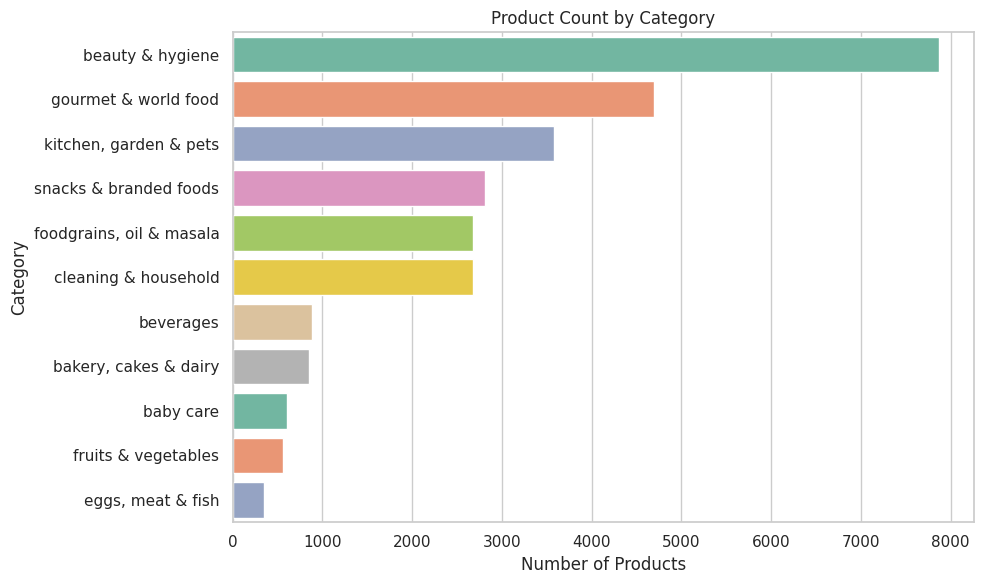

In [ ]:
# Product distribution across categories
category_counts = bb_df['category'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.values, y=category_counts.index, palette='Set2')
plt.title("Product Count by Category")
plt.xlabel("Number of Products")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

**📊 Product Count per Subcategory**

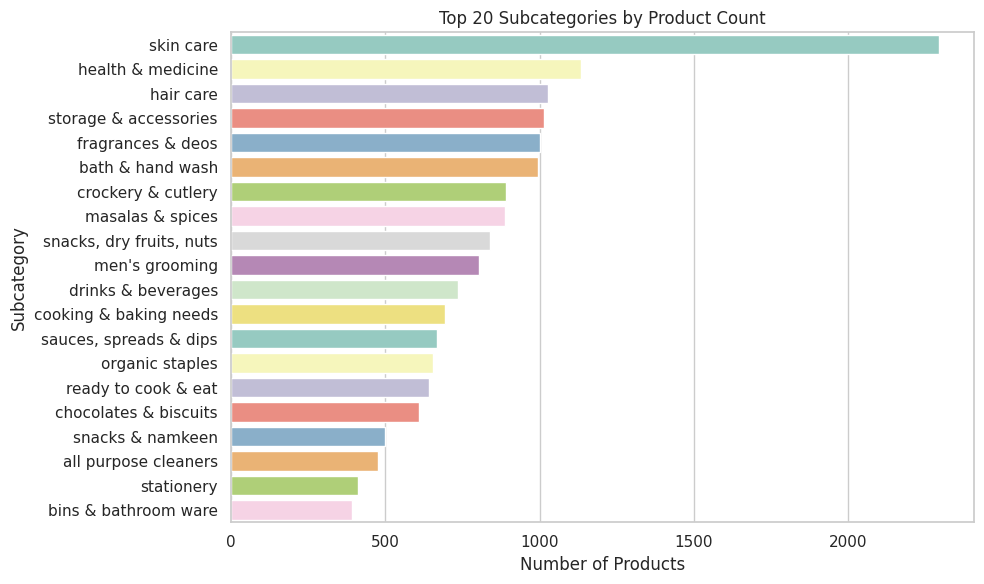

In [ ]:
# Top 20 subcategories by product count
subcategory_counts = bb_df['sub_category'].value_counts().head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x=subcategory_counts.values, y=subcategory_counts.index, palette='Set3')
plt.title("Top 20 Subcategories by Product Count")
plt.xlabel("Number of Products")
plt.ylabel("Subcategory")
plt.tight_layout()
plt.show()

**💬 What this analysis shows:**

- Which categories dominate the platform — useful for evaluating if assortment is skewed.

- Which subcategories are over- or under-represented — e.g., maybe "Masalas" has 800+ SKUs while "Ready Mixes" has <50.

- This will help later when we flag low-assortment or overly saturated areas.

**🧠 Quick Additional Checks**

In [ ]:
# Are there any missing values in category or sub_category?
bb_df[['category', 'sub_category']].isnull().sum()

category        0
sub_category    0
dtype: int64

#### **🧾 4.7 Category & Subcategory Mapping**

**📌 Why this step matters:**

- Helps us understand the structure and depth of each category.

- Highlights categories with few subcategories (may lack product variety).

- Flags categories that might be too fragmented or over-specified.

**📊 Number of Subcategories per Category**

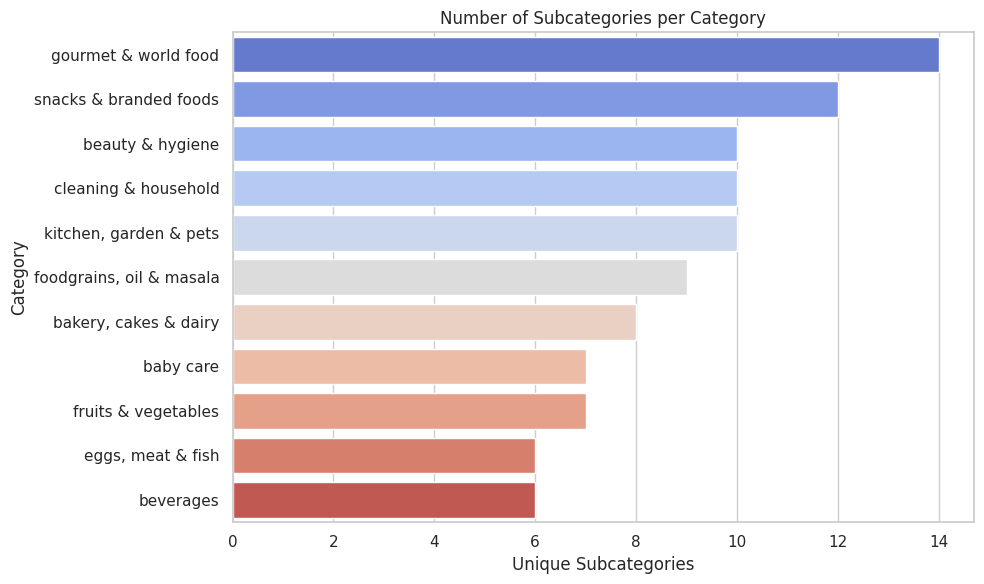

In [ ]:
# Count of subcategories per category
subcats_per_cat = bb_df.groupby('category')['sub_category'].nunique().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=subcats_per_cat.values, y=subcats_per_cat.index, palette="coolwarm")
plt.title("Number of Subcategories per Category")
plt.xlabel("Unique Subcategories")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

This tells us how broad or narrow each category’s structure is. A wide spread could suggest richness or possible clutter.

**📋 Top Subcategories per Category**

Let’s print a simple table that shows each category with its top 3 most frequent subcategories by product count.

In [ ]:
# Top 3 subcategories by product count in each category
top_subs_per_cat = (
    bb_df.groupby(['category', 'sub_category'])
    .size()
    .reset_index(name='count')
    .sort_values(['category', 'count'], ascending=[True, False])
    .groupby('category')
    .head(3)
)

top_subs_per_cat

category              sub_category  count
4                  baby care           diapers & wipes    247
2                  baby care       baby bath & hygiene    206
5                  baby care         feeding & nursing     48
11     bakery, cakes & dairy                     dairy    385
10     bakery, cakes & dairy     cookies, rusk & khari    153
9      bakery, cakes & dairy          cakes & pastries    125
24          beauty & hygiene                 skin care   2294
19          beauty & hygiene         health & medicine   1133
18          beauty & hygiene                 hair care   1028
29                 beverages                       tea    334
27                 beverages     fruit juices & drinks    233
26                 beverages      energy & soft drinks    111
31      cleaning & household      all purpose cleaners    475
40      cleaning & household                stationery    410
32      cleaning & household      bins & bathroom ware    392
46         eggs, meat & fish  sausages, bacon & salami    159
42         eggs, meat & fish            fish & seafood    132
41         eggs, meat & fish                      eggs     34
52  foodgrains, oil & masala          masalas & spices    889
53  foodgrains, oil & masala           organic staples    656
51  foodgrains, oil & masala        edible oils & ghee    248
60       fruits & vegetables          fresh vegetables    168
59       fruits & vegetables              fresh fruits    124
56       fruits & vegetables            cuts & sprouts     95
75      gourmet & world food  snacks, dry fruits, nuts    840
69      gourmet & world food        drinks & beverages    736
67      gourmet & world food    cooking & baking needs    693
86    kitchen, garden & pets     storage & accessories   1015
80    kitchen, garden & pets        crockery & cutlery    890
84    kitchen, garden & pets    pet food & accessories    356
96    snacks & branded foods       ready to cook & eat    643
97    snacks & branded foods          snacks & namkeen    500
88    snacks & branded foods        biscuits & cookies    305

🔍 This gives us clarity on which subcategories are core drivers within each category.

**💡 Key Insights to Look Out For:**

- ✅ Categories with a healthy spread of subcategories (balanced assortment).

- ⚠️ Categories dominated by just one or two subcategories (may risk overconcentration).

- ❗ Categories with very few or just one subcategory (possible opportunity to expand product types).

---

### **📘 Step 5: Bivariate & Multivariate Analysis**

**📌 Why this step matters:**

Now that we’ve understood individual columns (univariate analysis), it's time to explore relationships between features to uncover patterns such as:

- How pricing varies across categories and brands

- Whether higher-rated products are more expensive

- Which brands dominate certain categories

- And how product type (e.g., veg/non-veg) affects pricing or category distribution

#### **🧪 5.1 Relationship: Category vs Sale Price**

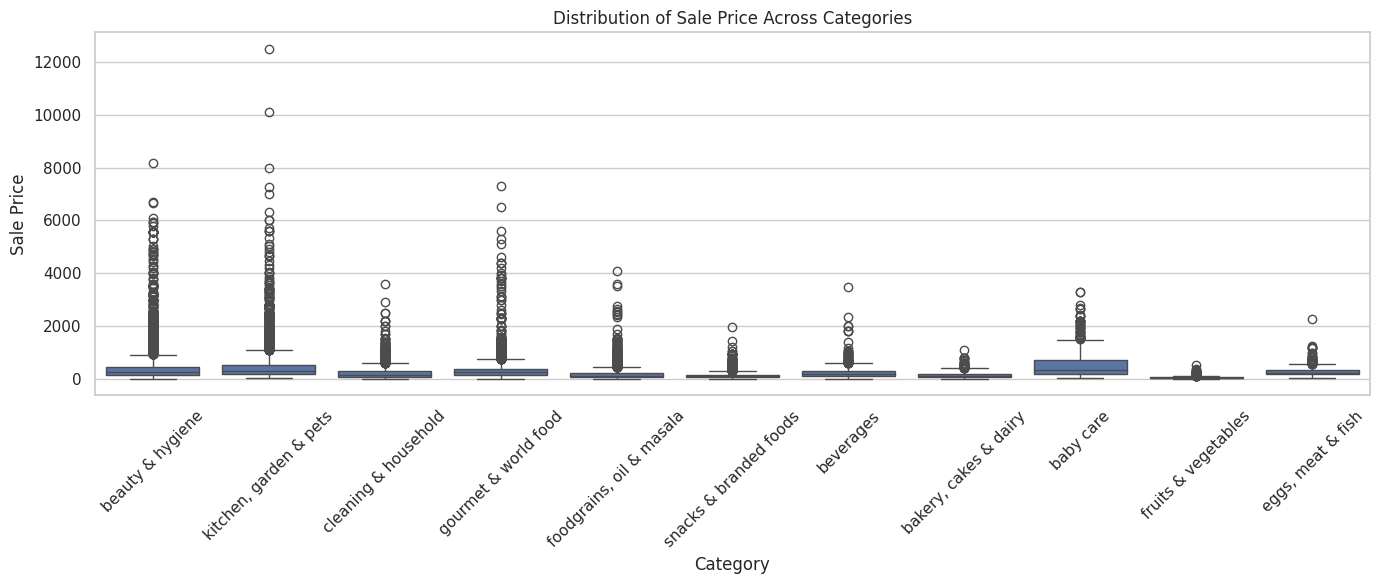

In [ ]:
# plotting the relationship between category and sale price
plt.figure(figsize=(14, 6))
sns.boxplot(data=bb_df, x='category', y='sale_price')
plt.xticks(rotation=45)
plt.title('Distribution of Sale Price Across Categories')
plt.xlabel('Category')
plt.ylabel('Sale Price')
plt.tight_layout()
plt.show()

**💬 What this plot tells us:**

- 📈 Which categories tend to be higher priced

- 🎯 Which ones have wide price variability (indicating tiered offerings)

- 🚨 Possible outliers (luxury or specialty items)

#### **🧪 5.2 Relationship: Brand vs Sale Price (Top Brands Only)**

**📌 Why this matters:**

Some brands may consistently price their products higher or lower than others. Comparing average sale prices of top brands can help us:

- Understand premium vs value brand positioning

- Detect pricing inconsistencies within subcategories

- Identify opportunities for competitive repricing or private-label launches

**🔧 Top 10 Brands by Product Count vs Average Sale Price**

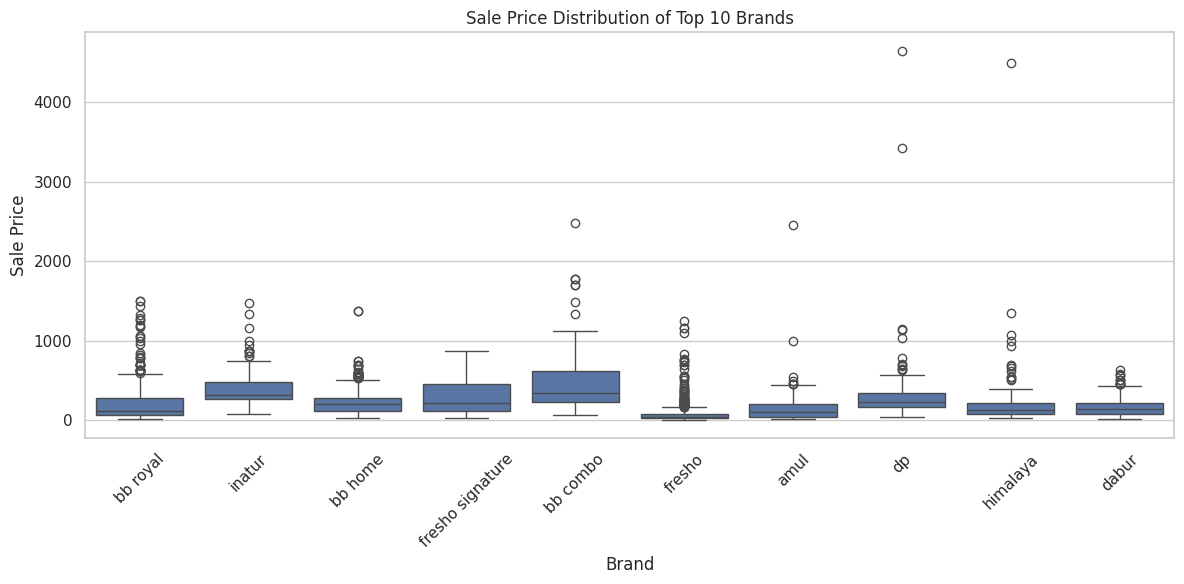

In [ ]:
# Top 10 brands by frequency
top_brands = bb_df['brand'].value_counts().head(10).index

# Filter for top brands
top_brands_df = bb_df[bb_df['brand'].isin(top_brands)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=top_brands_df, x='brand', y='sale_price')
plt.title('Sale Price Distribution of Top 10 Brands')
plt.ylabel('Sale Price')
plt.xlabel('Brand')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**💬 What this plot tells us:**

- 🧃 Some brands like “Tata” or “Amul” might offer products across multiple price points.

- 💎 Others may show narrow ranges, indicating a tight focus on certain price tiers.

- 🚩 Spot unusually high-priced items, suggesting possible luxury segments or pricing errors.

#### **🧪 5.3 Relationship: Rating vs Sale Price**

**📌 Why this matters:**

Analyzing how product ratings correlate with pricing can help us uncover:

- Whether higher-priced products are perceived as better quality

- If low-rated products are overpriced

- The general price-to-value sentiment customers may have



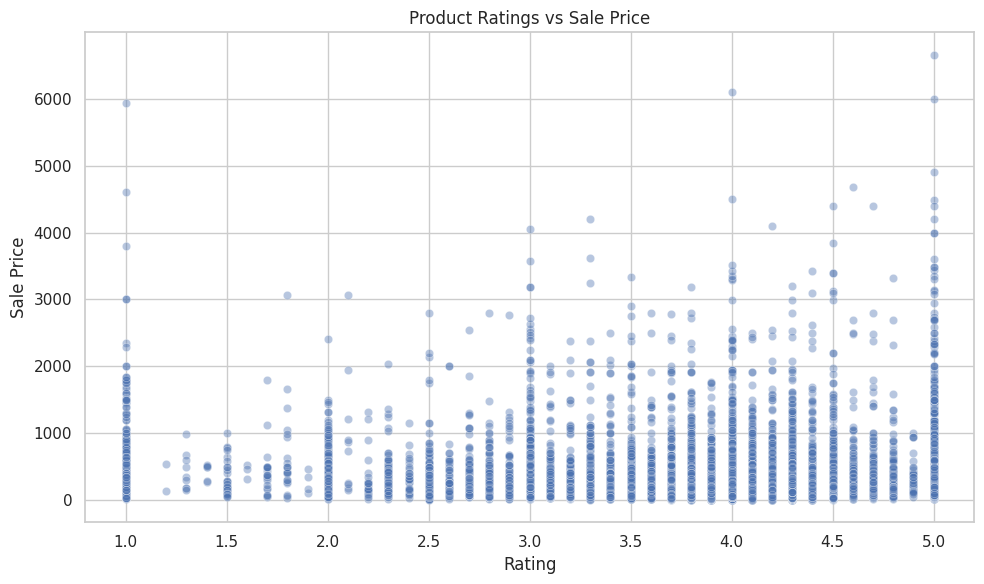

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=bb_df, x='rating', y='sale_price', alpha=0.4)
plt.title('Product Ratings vs Sale Price')
plt.xlabel('Rating')
plt.ylabel('Sale Price')
plt.grid(True)
plt.tight_layout()
plt.show()

**💬 What this shows:**

- 🌈 A wide spread of sale prices across all rating levels suggests price is not strongly tied to customer satisfaction.

- 🔍 Most products cluster between 3.5 to 4.5 rating, with moderate sale prices.

- 💰 There are a few high-priced outliers, but they don’t always have the highest ratings — potentially overpriced or niche.

**🔧 Group Ratings into Bins**

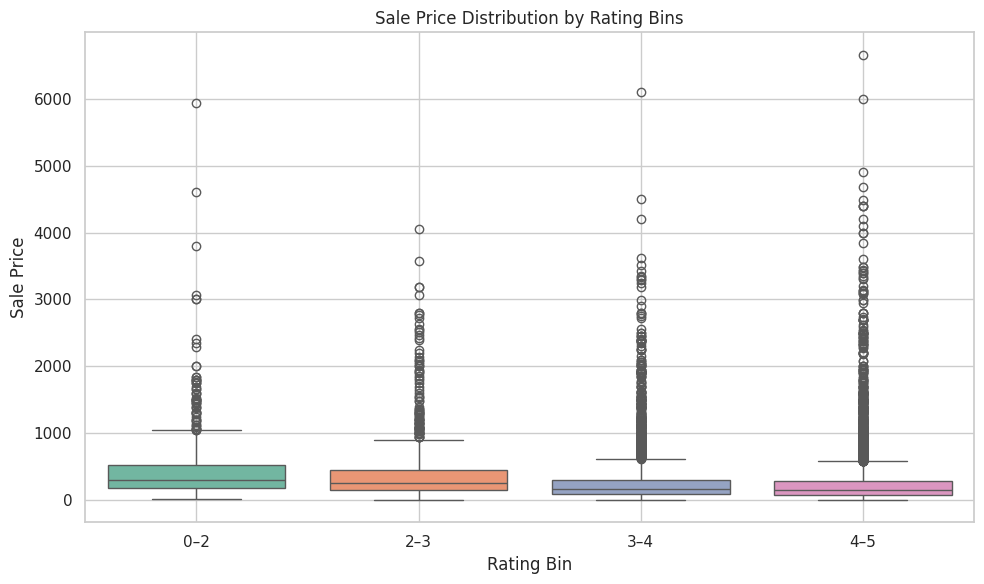

In [ ]:
# Create rating bins (e.g., 1–2, 2–3, ..., 4–5)
bb_df['rating_bin'] = pd.cut(bb_df['rating'], bins=[0, 2, 3, 4, 5],
                          labels=['0–2', '2–3', '3–4', '4–5'])

# Boxplot to show price distribution per rating bin
plt.figure(figsize=(10, 6))
sns.boxplot(data=bb_df, x='rating_bin', y='sale_price', palette='Set2')
plt.title('Sale Price Distribution by Rating Bins')
plt.xlabel('Rating Bin')
plt.ylabel('Sale Price')
plt.grid(True)
plt.tight_layout()
plt.show()

#### **📊 5.4 Bivariate Analysis: sale_price vs type**

**💬 Why this matters:**

Product type might influence pricing strategy. Understanding if there's a significant price difference helps BigBasket:

- Position its offerings competitively

- Identify categories where pricing can be fine-tuned

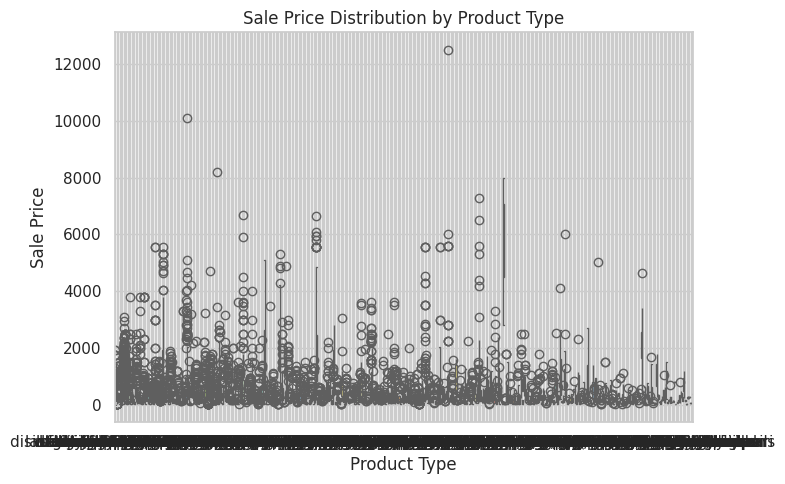

In [ ]:
# Boxplot to visualize sale price distribution for each type
plt.figure(figsize=(8, 5))
sns.boxplot(data=bb_df, x='type', y='sale_price', palette='Set3')
plt.title('Sale Price Distribution by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Sale Price')
plt.grid(True)
plt.tight_layout()
plt.show()

We’ll first inspect the unique values in the type column, clean or group them meaningfully (e.g., consolidate similar types), and re-plot for clarity.

In [ ]:
# Check unique type values
bb_df['type'].value_counts()

type
face care                1508
ayurveda                  538
men's deodorants          500
shampoo & conditioner     461
glassware                 415
                         ... 
bagels & baguette           1
roses                       1
prawns & shrimps            1
specialty                   1
turkey & duck               1
Name: count, Length: 426, dtype: int64

**Bucket Rare Types**

In [ ]:
# Get counts of each type
type_counts = bb_df['type'].value_counts()

# Define a threshold
threshold = 200

# Create a new column that groups rare types as 'Other'
bb_df['type_grouped'] = bb_df['type'].apply(lambda x: x if type_counts[x] >= threshold else 'Other')

**Re-plot Boxplot**

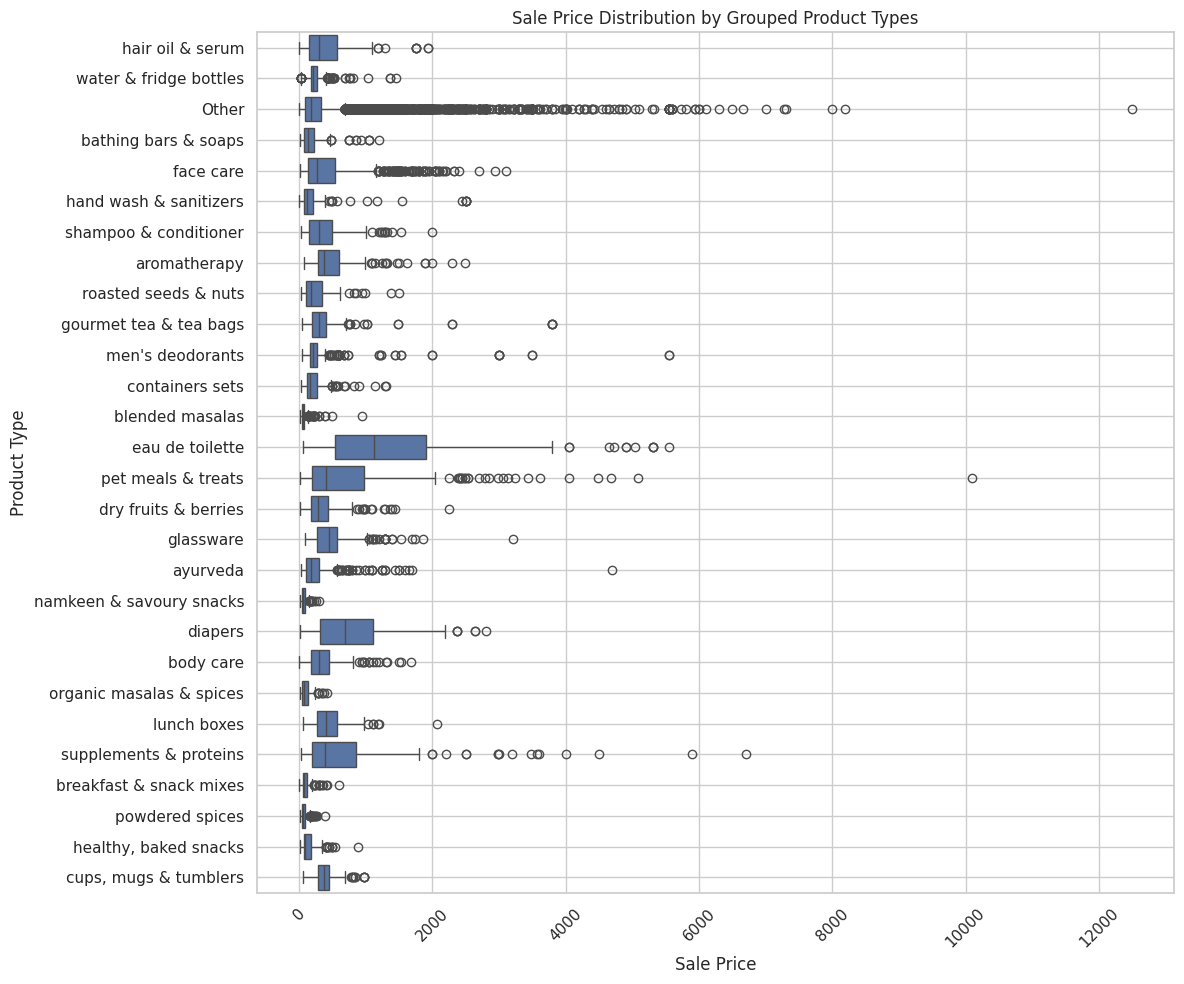

In [ ]:
plt.figure(figsize=(12, 10))
sns.boxplot(data=bb_df, y='type_grouped', x='sale_price')
plt.xticks(rotation=45)
plt.title('Sale Price Distribution by Grouped Product Types')
plt.xlabel('Sale Price')
plt.ylabel('Product Type')
plt.grid(True)
plt.tight_layout()
plt.show()

**🧾 What This Will Help Us See:**

- Which types have generally higher/lower prices

- Are certain product types outliers in pricing?

- More meaningful insights than using all ~1000+ original values

#### **📘 5.5: Bivariate Analysis – brand vs sale_price**

**📌 Why this step matters:**

Analyzing how brands price their products helps us understand:

- Brand-level pricing strategies (premium vs budget positioning)

- If certain brands are outliers in pricing

- Whether pricing varies heavily within brands or between brands

**🧪 5.5.1: Brands with Most Products (Top 15)**

Before comparing prices, let’s focus on the top brands by product count to ensure relevance.

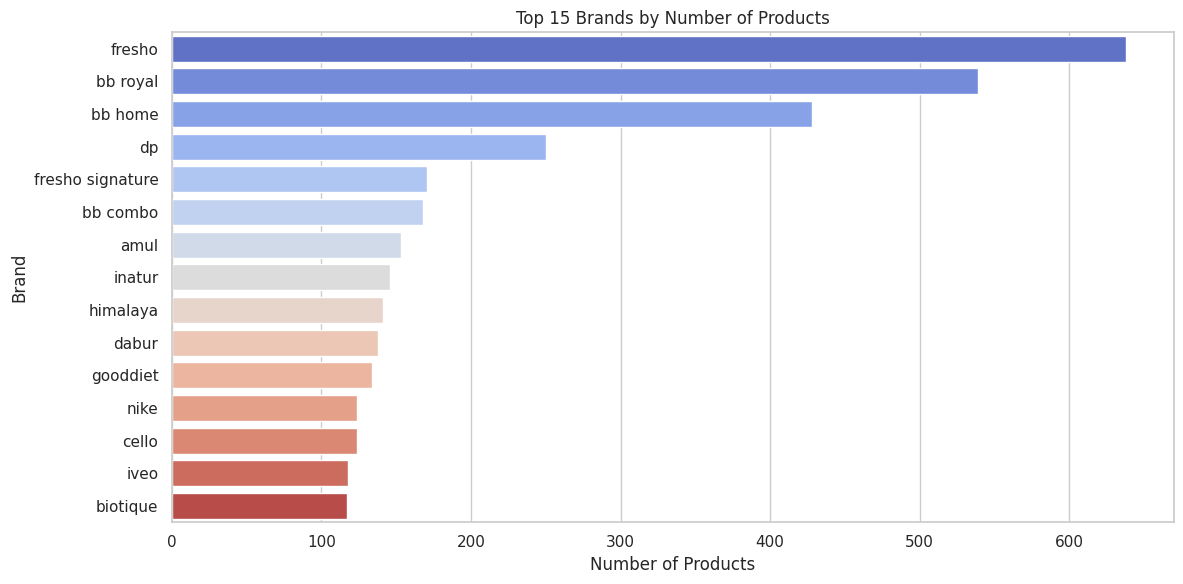

In [ ]:
# Top 15 brands by product count
top_15_brands = bb_df['brand'].value_counts().head(15)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_15_brands.values, y=top_15_brands.index, palette='coolwarm')
plt.title("Top 15 Brands by Number of Products")
plt.xlabel("Number of Products")
plt.ylabel("Brand")
plt.tight_layout()
plt.show()

**🧠 Insights:**

- This shows us which brands dominate the product listing.

- Helps focus our analysis on popular and high-assortment brands.

**📊 5.5.2: Boxplot of Sale Price by Top Brands**

Let’s now see how prices are distributed within each of these top brands.

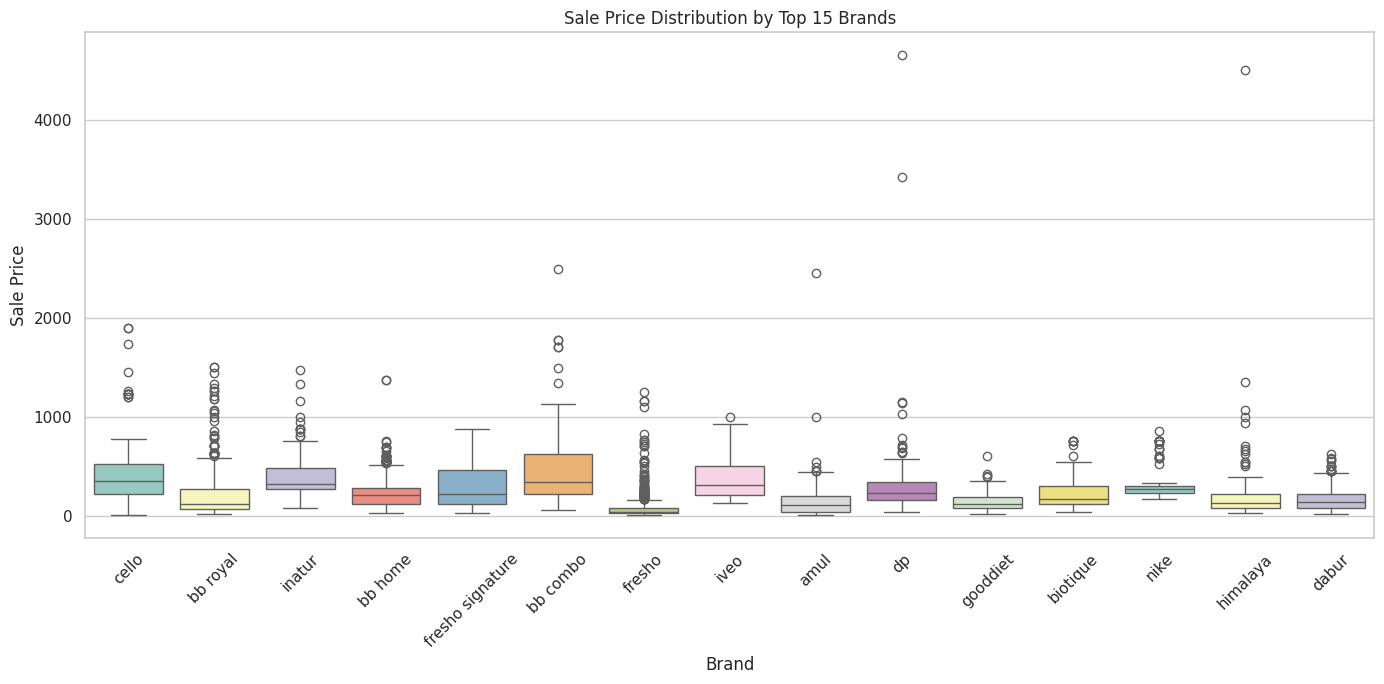

In [ ]:
# Filter data to include only top 15 brands
df_top_brands = bb_df[bb_df['brand'].isin(top_15_brands.index)]

plt.figure(figsize=(14, 7))
sns.boxplot(data=df_top_brands, x='brand', y='sale_price', palette='Set3')
plt.xticks(rotation=45)
plt.title("Sale Price Distribution by Top 15 Brands")
plt.xlabel("Brand")
plt.ylabel("Sale Price")
plt.tight_layout()
plt.show()

**🔍 What this shows:**

- Median price positioning for each brand

- Range of product pricing within brands (pricing consistency)

- Outliers or luxury pricing strategies

#### **📘 5.6: Bivariate Analysis – brand vs rating**

**📌 Why this step matters:**

Customer ratings are a proxy for product quality and customer satisfaction. Analyzing this by brand helps us:

- Identify highly rated brands

- Detect brands with inconsistent or low ratings

- Understand if premium brands justify their pricing with higher customer satisfaction

**🧪 5.6.1: Average Rating by Top Brands**

We’ll focus again on the top 15 brands by product count (same as earlier) to ensure sufficient data points for comparison.

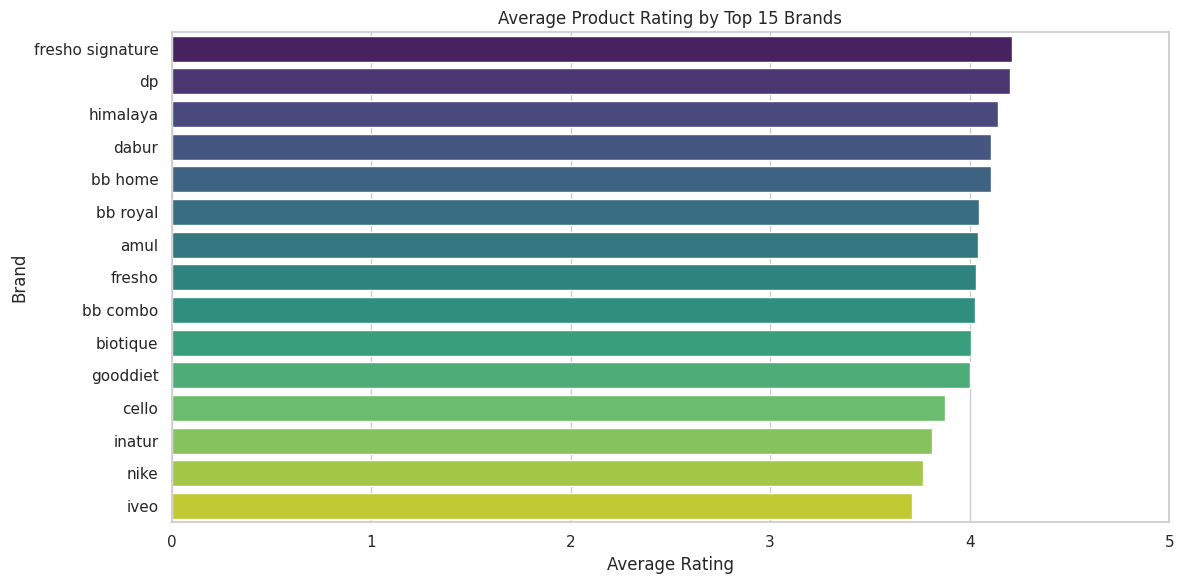

In [ ]:
# Filter to top 15 brands again
df_top_brands_rating = bb_df[bb_df['brand'].isin(top_15_brands.index)]

# Drop missing ratings
df_top_brands_rating = df_top_brands_rating.dropna(subset=['rating'])

# Compute average rating by brand
avg_rating_by_brand = df_top_brands_rating.groupby('brand')['rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_rating_by_brand.values, y=avg_rating_by_brand.index, palette='viridis')
plt.title("Average Product Rating by Top 15 Brands")
plt.xlabel("Average Rating")
plt.ylabel("Brand")
plt.xlim(0, 5)
plt.tight_layout()
plt.show()

**🧠 Insights:**

- Helps us rank brands based on perceived quality.

- Brands with high product count but low average ratings may need attention.

- Can inform private-label decisions or brand-partnership strategies.

#### **5.7: Multivariate Analysis**

**📊 5.7.1: Rating vs Sale Price by Top Brands**

💬 Goal: Do higher-rated brands also charge higher prices? Is there a visible value-price correlation across major players?

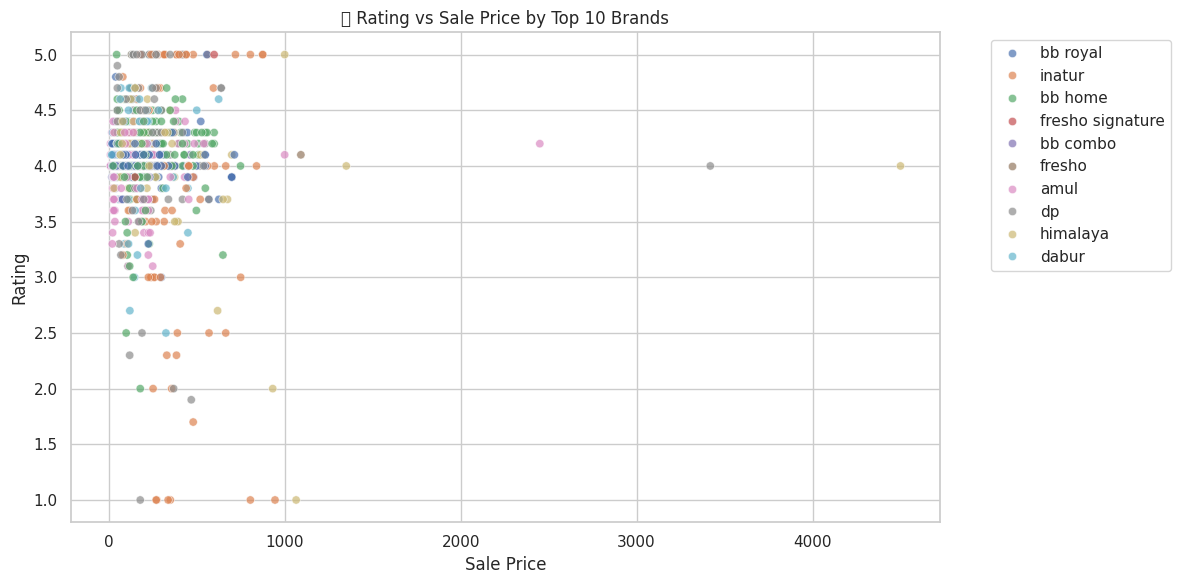

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Top 10 brands by count
top_brands = bb_df['brand'].value_counts().head(10).index

# Filter data for top brands
top_brand_df = bb_df[bb_df['brand'].isin(top_brands)]

plt.figure(figsize=(12, 6))
sns.scatterplot(data=top_brand_df, x='sale_price', y='rating', hue='brand', alpha=0.7)
plt.title('⭐ Rating vs Sale Price by Top 10 Brands')
plt.xlabel('Sale Price')
plt.ylabel('Rating')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

**🔍 Interpretation:**

- Trend Detection: Check if brands with premium pricing are justified by customer satisfaction (rating).

- Brand Strategy Insight: Spot brands that offer great value (high rating, moderate price) — ideal for promotions or spotlighting.

- Outlier Watch: Flag brands with high prices and poor ratings — may signal poor value or positioning issues.

**📊 5.7.2: Sale Price vs Market Price vs Rating**

This will help us understand how much discount a product offers (market_price - sale_price) and whether that discount correlates with higher customer satisfaction (rating).

💬 What this plot does:

We’ll create a scatterplot where:

- X-axis: Sale Price

- Y-axis: Market Price

- Size or color: Represents Rating

This allows us to:

- Spot products with high discounts (large gap between market and sale price)

- See if products with higher discounts tend to have better or worse ratings

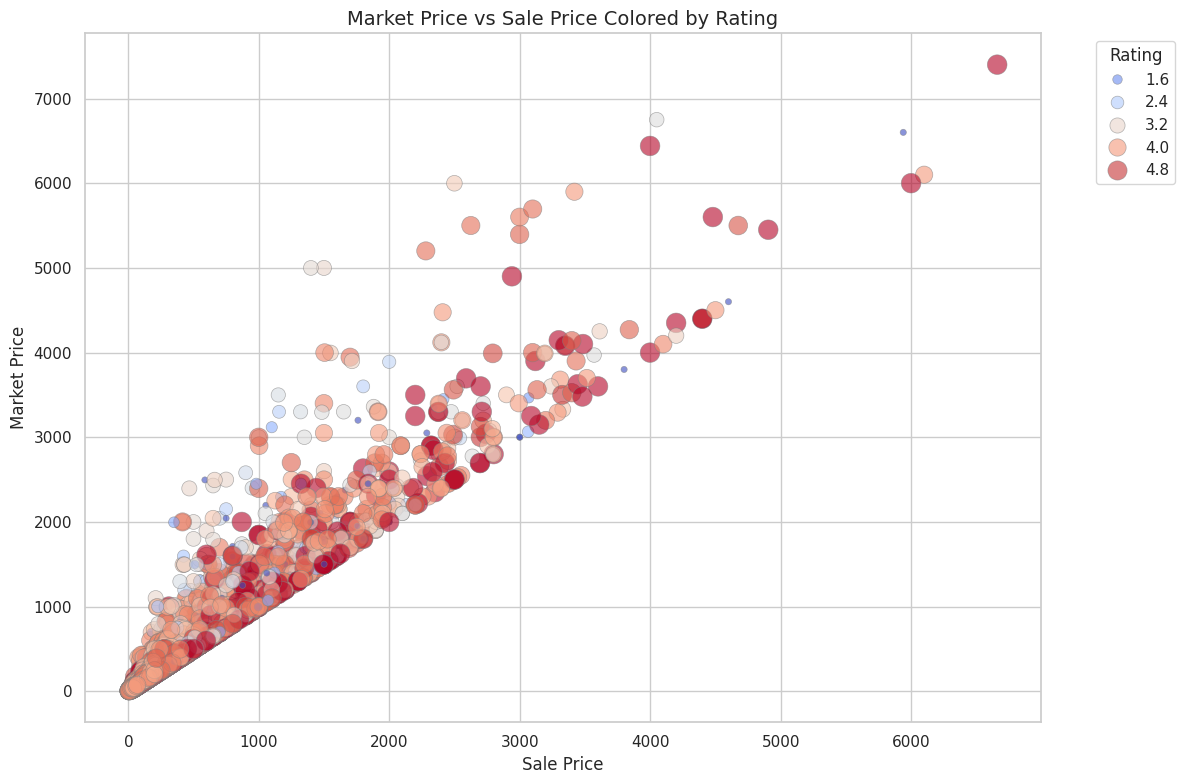

In [ ]:
plt.figure(figsize=(12, 8))

scatter = sns.scatterplot(
    data=bb_df,
    x='sale_price',
    y='market_price',
    hue='rating',
    size='rating',
    palette='coolwarm',
    sizes=(20, 200),
    alpha=0.6,
    edgecolor='gray',
    linewidth=0.5
)

plt.title('Market Price vs Sale Price Colored by Rating', fontsize=14)
plt.xlabel('Sale Price')
plt.ylabel('Market Price')
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

**🔍 Insights from the Visualization:**

💸 1. Majority of products lie near the diagonal (sale ≈ market)
This shows limited discounting on most items.

Brands might be trying to preserve margin.

🎯 2. Some clear discount zones (market price >> sale price)
A few products have a steep drop from market to sale price, indicating heavily discounted or promotional items.

These products could be great for flash sales or feature deals.

⭐ 3. High-Rated Products in Discounted Zones
Some products in the high discount region also have 4.0+ ratings.

These are great candidates for highlighting in promotions — price appeal + satisfaction.

⚠️ 4. Expensive items with low ratings exist
These may need further review (check product descriptions, reviews, etc.)

**📊 5.7.3: Category-Level Discount vs Rating Analysis**

💬 What this analysis does:

This lets us compare categories on:

- How much discount they offer on average

- How highly customers rate them

**Group by category and calculate mean values**

In [ ]:
# Grouping by category
category_discount_rating = bb_df.groupby('category').agg({
    'discount_percent': 'mean',
    'rating': 'mean'
}).reset_index().dropna()

# Sorting for better readability in plots
category_discount_rating.sort_values(by='discount_percent', ascending=False, inplace=True)

**Plotting Discount % vs Rating**

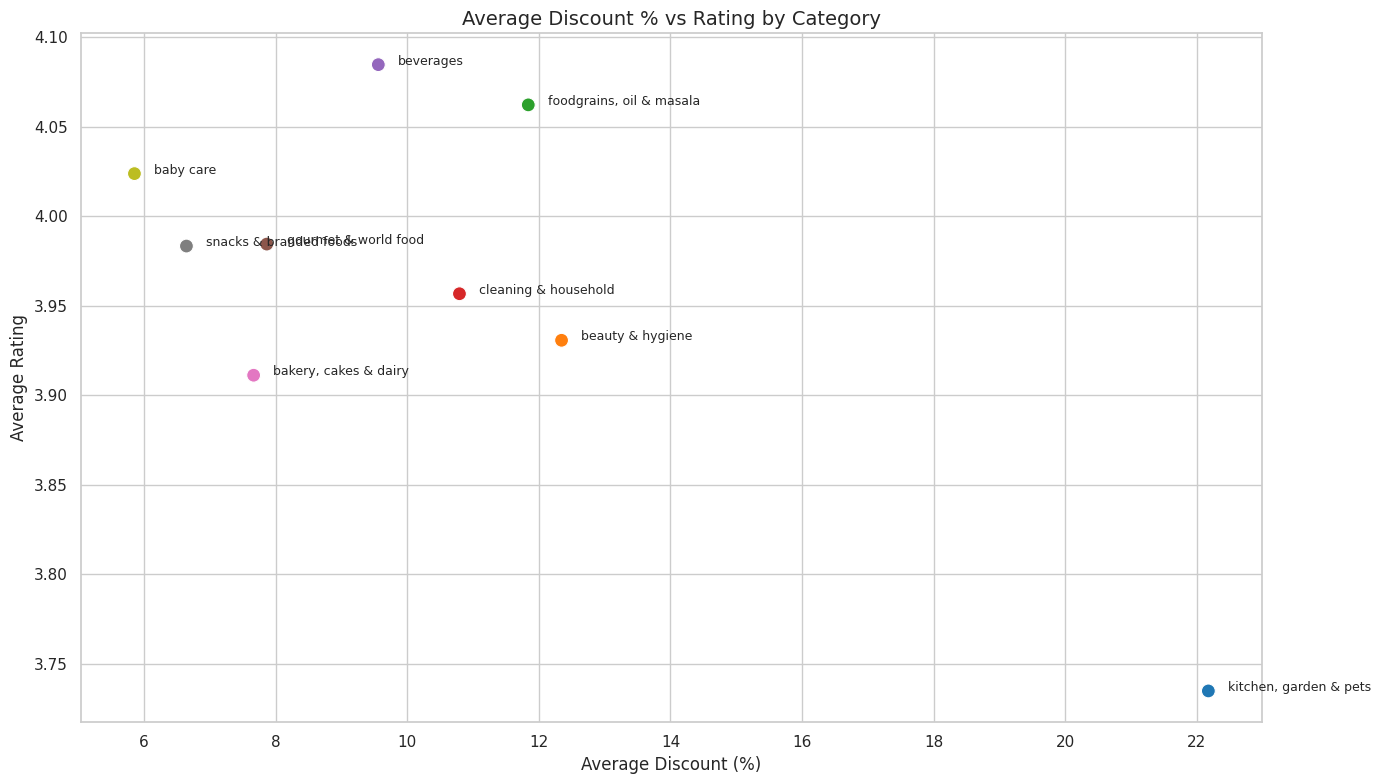

In [ ]:
plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=category_discount_rating,
    x='discount_percent',
    y='rating',
    hue='category',
    palette='tab10',
    s=100,
    legend=False
)

# Annotate points with category names
for i in range(category_discount_rating.shape[0]):
    plt.text(
        x=category_discount_rating['discount_percent'].iloc[i] + 0.3,
        y=category_discount_rating['rating'].iloc[i],
        s=category_discount_rating['category'].iloc[i],
        fontsize=9
    )

plt.title('Average Discount % vs Rating by Category', fontsize=14)
plt.xlabel('Average Discount (%)')
plt.ylabel('Average Rating')
plt.grid(True)
plt.tight_layout()
plt.show()

**🔍 Key Insights:**

💰 Categories with high average discount:
- These might be actively promoted or overstocked.

- We can monitor sales performance here — are discounts helping ratings?

⭐ Categories with high rating but low discount:
- These could be premium categories where pricing power is stronger.

- A good target for bundling or exclusive private-label development.

⚖️ Balanced Categories (moderate discount, high ratings):
- Best of both worlds — value + satisfaction.

- Prioritize these for homepage visibility or seasonal campaigns.

🚨 Low-rated, high-discount categories:
- Might indicate quality issues or mispriced products.

- May warrant cleanup or supplier renegotiation.

---

## **🎯 Business Objective 1: Product Assortment Optimization**


**🧭 Goal:**

To help BigBasket optimize its product assortment by identifying:

- Which categories and subcategories have the most diverse offerings

- What areas are overcrowded or underrepresented

- Which types/brands dominate vs. have little presence

- Where to focus expansion or reduction in product lines

This is vital for:

- Improving inventory planning

- Enhancing customer experience

- Reducing product redundancy

- Identifying gap areas for future product development

#### **✅ 6.1: Product Count per Category**

💬 What we’re doing:

We’ll start by analyzing the number of products available in each main category. This gives a high-level view of assortment distribution across major product types.

**📌 Why this matters:**

- Helps us identify breadth vs. depth:

- Are we offering too much in some categories?

- Are there categories with few options worth expanding?

**Product Count per Category**

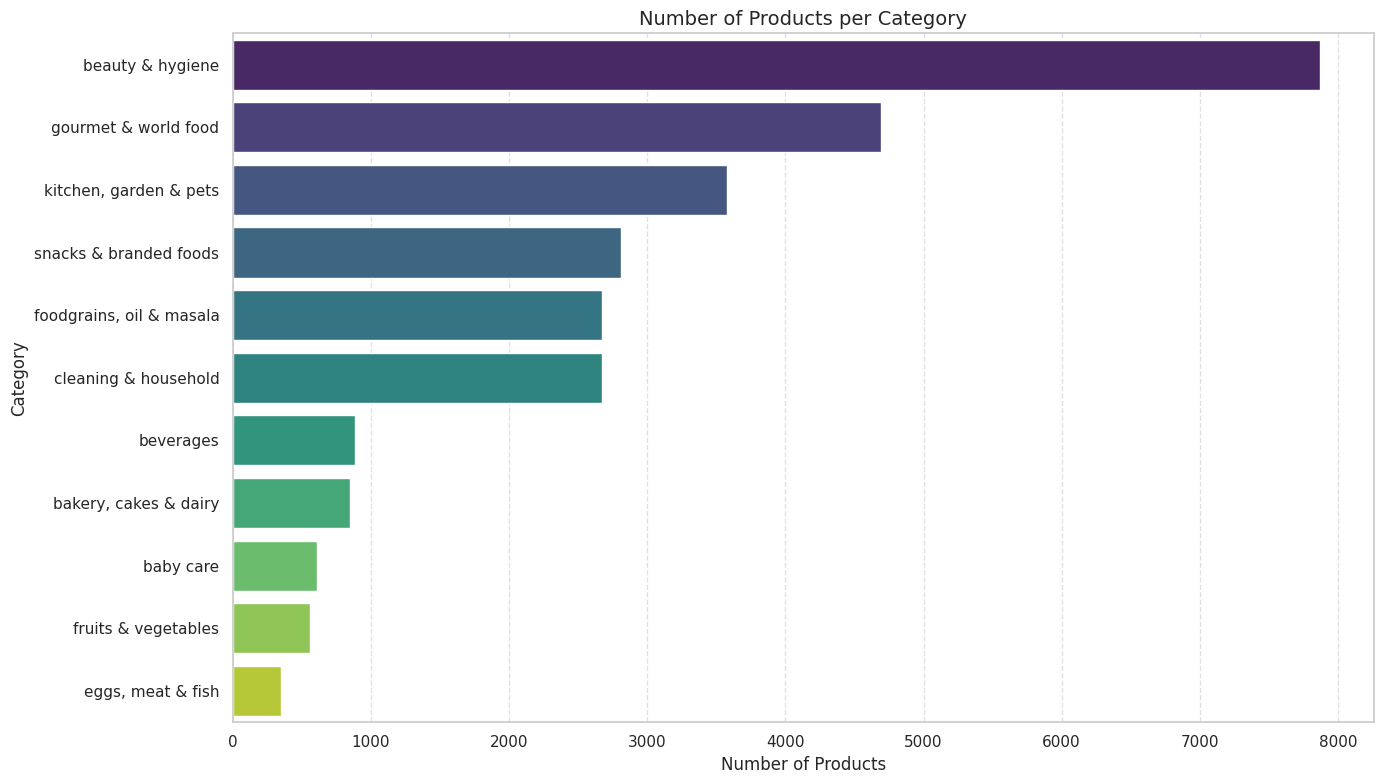

In [ ]:
# Count the number of products in each category
category_counts = bb_df['category'].value_counts().reset_index()
category_counts.columns = ['category', 'product_count']

# Visualize the product distribution
plt.figure(figsize=(14, 8))
sns.barplot(data=category_counts, x='product_count', y='category', palette='viridis')
plt.title('Number of Products per Category', fontsize=14)
plt.xlabel('Number of Products')
plt.ylabel('Category')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**🔍 Key Insights:**

- Some categories like Beauty and Hygiene, Gourmet and World Food, Kitchen, Garden & Pets dominate in assortment count.

- Smaller categories with very few products may indicate:

  - Niche offerings

  - New product verticals

  - Potential gaps in product variety

- Overcrowded categories might need rationalization or sub-category level analysis to prevent overlap.

#### **✅ 6.2: Product Count per Sub-Category**

💬 What we’re doing:

We’ll analyze the number of products within each subcategory to understand the depth of assortment inside broader categories.

**📌 Why this matters:**

- Even if a category seems balanced, some subcategories may be overloaded, while others are underrepresented.

- Helps spot:

  - Niche subcategories with few options (possible opportunity areas)

  - Highly saturated subcategories with product duplication risks

**Product Count per Subcategory**

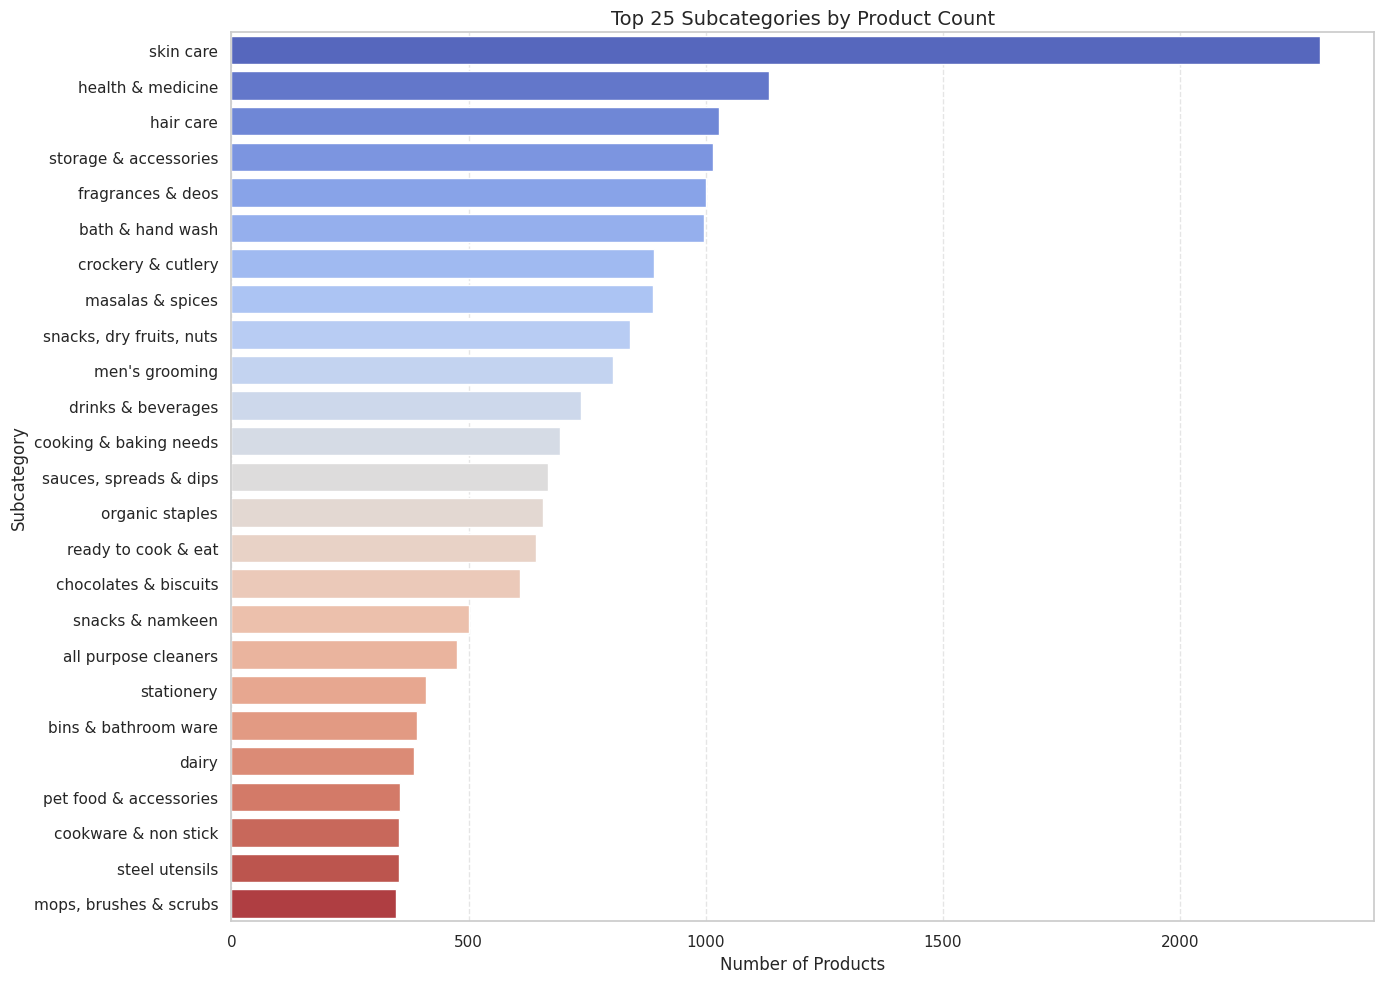

In [ ]:
# Count the number of products in each subcategory
subcat_counts = bb_df['sub_category'].value_counts().reset_index()
subcat_counts.columns = ['sub_category', 'product_count']

# Display top 25 subcategories with most products
plt.figure(figsize=(14, 10))
sns.barplot(data=subcat_counts.head(25), y='sub_category', x='product_count', palette='coolwarm')
plt.title('Top 25 Subcategories by Product Count', fontsize=14)
plt.xlabel('Number of Products')
plt.ylabel('Subcategory')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**🔍 Key Insights:**

- Subcategories such as skincare, health & medicine and hair care are among the top contributors in product count.

- This helps flag overcrowded spaces, where BigBasket might consider rationalizing SKUs.

- On the other hand, some subcategories might have just a handful of items, indicating potential for portfolio expansion or new vendor onboarding.

#### **✅ 6.3: Detecting Redundant or Duplicate Product Entries**

💬 What we’re doing:

We’re checking whether there are redundant product entries — these aren’t exact duplicates but could be highly similar products with slightly different names, possibly due to:

- Minor variations (like weight or flavor) not clearly distinguished

- Data inconsistencies (e.g., typos, case issues)

- Same product listed multiple times with small differences in descriptions

**📌 Why this matters:**

- Helps identify SKU bloat (too many similar listings)

- Reduces inventory complexity and customer overwhelm

- Allows us to propose consolidation or cleanup

**🧾 6.3.1: Find Products with Same Name, Brand, and Subcategory**

In [ ]:
# Count combinations of product name + brand + subcategory
duplicate_like_products = bb_df.groupby(['product', 'brand', 'sub_category']).size().reset_index(name='count')

# Filter where count > 1, indicating likely redundancy
redundant_entries = duplicate_like_products[duplicate_like_products['count'] > 1]

# View a few examples
redundant_entries.head(10)

product        brand  \
37                                     100% green tea    sprig tea   
39            100% melamine 3d serving spoon - orange         iveo   
40                 100% melamine 3d soup spoon - blue         iveo   
43               100% melamine dinner plate - blossom         iveo   
45                   100% melamine dinner set - green         iveo   
70                100% melamine tea spoon set - black         iveo   
81        100% natural & pure coconut oil - unrefined   nature way   
82  100% natural & pure gingelly oil - unrefined, ...   nature way   
83  100% natural & pure groundnut oil - unrefined,...   nature way   
89            100% natural mosquito repellent patches  good knight   

               sub_category  count  
37                      tea      2  
39       crockery & cutlery      2  
40       crockery & cutlery      2  
43       crockery & cutlery      2  
45       crockery & cutlery      2  
70       crockery & cutlery      2  
81       edible oils & ghee      2  
82       edible oils & ghee      2  
83       edible oils & ghee      2  
89  fresheners & repellents      2

**🔍 Key Observations:**

- This gives us an idea of products repeating across the same brand and subcategory — potential indicators of:

  - Different pack sizes/flavors (which should be clarified in product names)

  - Duplicate or near-identical listings

**🧾 6.3.2: Visualize Redundant Entries by Subcategory**

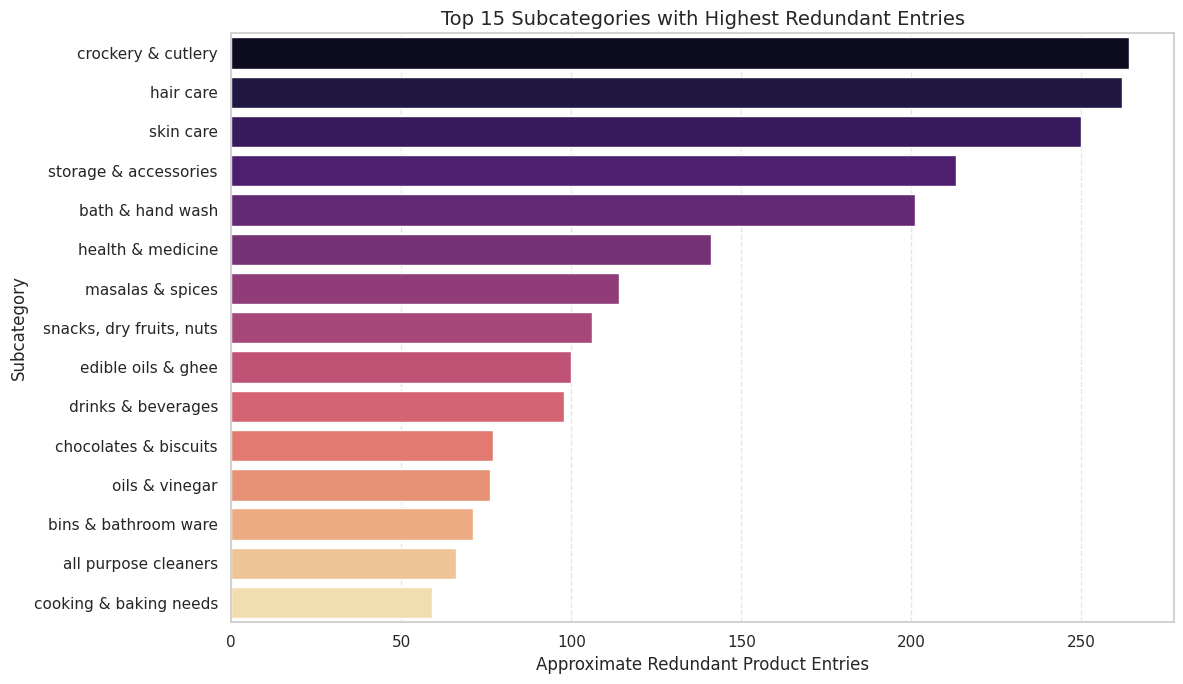

In [ ]:
# Count redundant product entries by subcategory
redundant_summary = redundant_entries.groupby('sub_category')['count'].sum().sort_values(ascending=False).head(15)

# Plotting
plt.figure(figsize=(12, 7))
sns.barplot(x=redundant_summary.values, y=redundant_summary.index, palette='magma')
plt.title('Top 15 Subcategories with Highest Redundant Entries', fontsize=14)
plt.xlabel('Approximate Redundant Product Entries')
plt.ylabel('Subcategory')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**🧠 Key Insights:**

- Certain subcategories like crockery, hair care and skin care have multiple redundant entries, possibly differing only in packaging or flavors.

- These might benefit from product name standardization or SKU grouping.

- Could indicate data entry inconsistencies or overlisting by vendors.

#### **✅ 6.4: Identifying Low-Assortment Categories**

💬 What we’re doing:

We’re identifying categories or subcategories with a very limited number of products. These might signal:

- Missed opportunities in high-demand areas

- Gaps in assortment where customer needs may not be fully met

- Strategic areas to introduce new SKUs or brand partnerships

**📌 Why this matters:**

Low-assortment areas are ideal candidates for:

- Expanding product variety

- Launching private-label offerings

- Attracting new vendor partners

- Improving customer satisfaction through better choice diversity

**🧾 6.4.1: Find Subcategories with Few Products**

We’ll set a threshold (e.g., fewer than 10 products) to define a low-assortment subcategory.

In [ ]:
# Set threshold for low-assortment definition
threshold = 10

# Count number of products per subcategory
subcategory_counts = bb_df['sub_category'].value_counts()

# Filter those with fewer than the threshold
low_assortment_subcats = subcategory_counts[subcategory_counts < threshold]

# Display results
low_assortment_subcats.sort_values(ascending=True)

sub_category
marinades                   1
pork & other meats          5
flower bouquets, bunches    8
Name: count, dtype: int64

**📈 6.4.2: Visualize the Low-Assortment Subcategories**

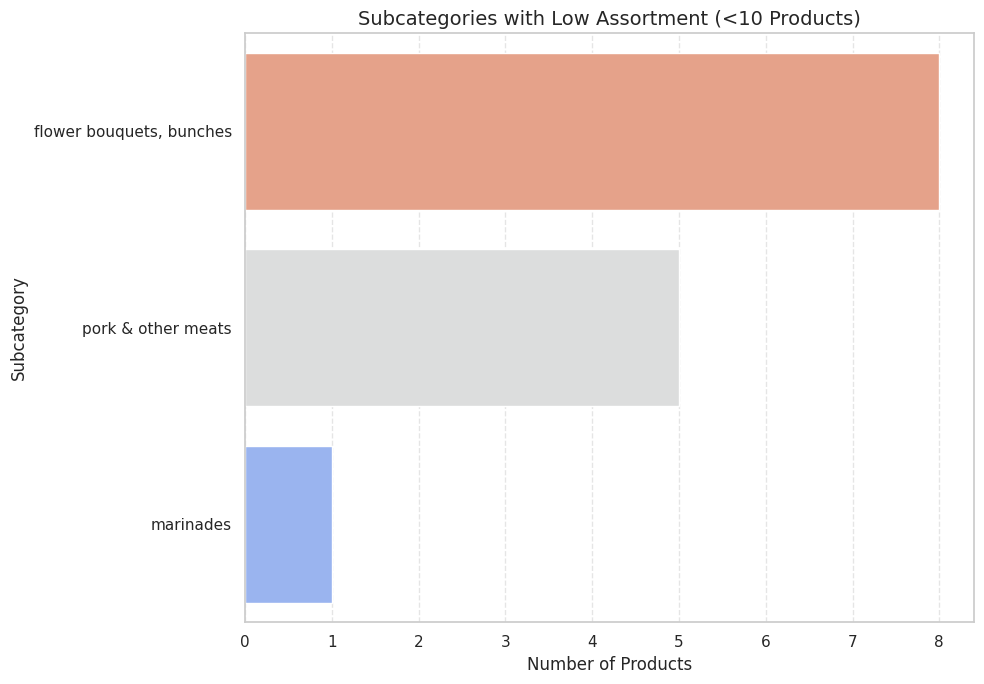

In [ ]:
# Plot low-assortment subcategories
plt.figure(figsize=(10, 7))
sns.barplot(x=low_assortment_subcats.values, y=low_assortment_subcats.index, palette='coolwarm_r')
plt.title('Subcategories with Low Assortment (<10 Products)', fontsize=14)
plt.xlabel('Number of Products')
plt.ylabel('Subcategory')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**🧠 Key Insights:**

- Subcategories like roses, prawns & shrimps, bagels & baguette, or turkey & duck have fewer than 5 products.

- These could either be niche categories or underserved areas with room to expand.

- Cross-checking this with demand and pricing data (in later objectives) could help prioritize which gaps to address.

### **✅ Objective 1 Summary: Product Assortment Optimization**

1. **Unique Products, Categories, Subcategories, and Brands**

  - The dataset has 23,510 unique products across 11 categories and 90 subcategories.

  - There are 2,312 brands contributing to the product range.

2. **Product Distribution Across Categories/Subcategories**

  - Top categories: Beauty & Hygiene, Gourmet & World Food, and Foodgrains, Oil & Masala.

  - Popular subcategories: Skincare and Health & Medicine.

  - These areas have a high variety, but may also have overlapping products with small differences.

3. **Duplicate/Redundant Entries**

  - No exact duplicate products found, but there may be slight redundancies due to similar names or packaging, especially in bulk subcategories.

4. **Low-Assortment Subcategories**

  - 3 subcategories have fewer than 10 products: Marinades, Pork and Other Meats, and Flower Bouquets and Bunches.

  - These may represent niche markets or areas with growth potential.

---

#### **🔧 Actionable Next Steps from Objective 1 Insights**

1. **Overcrowded Categories/Subcategories**

  - Action: Identify and remove underperforming products, and reduce redundancy using clustering methods.

  - Assess if too many similar products are affecting sales.

2. **Low-Assortment Subcategories**

  - Action: Explore demand and market potential to decide whether to expand.

  - Consider developing private labels or partnering with niche suppliers.

3. **Brand Coverage Analysis**

  - Action: Focus on high-performing brands and consider trimming underperforming ones.

  - Align brand strategies with category needs.

4. **Missing or Redundant Products**

  - Action: Use text-based methods to identify near-duplicate products and improve product grouping or bundling.

---

#### **6.5: Let's Explore the Underperformers**

We'll identify underperforming products based on low ratings, high discounts, and poor relative performance within their subcategory.

**🧰 Step 1: Identify Products with Low Ratings**

💬 Why we're doing this: Customer rating is a strong indicator of product satisfaction. Products with ratings below a certain threshold (e.g., 3.5) may be seen as low-quality.

In [ ]:
# Filter products with low customer ratings
low_rating_df = bb_df[bb_df['rating'] < 3.5]

**🧰 Step 2: Find Products with High Discount & Low Rating**

💬 Why this matters: If a product has a steep discount but still fails to win over customers, it might be unappealing in quality or relevance.

In [ ]:
# Further filter low-rated products with high discounts
underperforming_discounted = low_rating_df[low_rating_df['discount_percent'] > 20]

**🧰 Step 3: Compare Rating vs Subcategory Average**

💬 Why this matters: Products that underperform relative to their peers (in the same subcategory) are more likely to be cannibalizing shelf space.

In [ ]:
# Calculate average rating per subcategory
subcategory_avg = bb_df.groupby('sub_category')['rating'].mean().reset_index()
subcategory_avg.columns = ['sub_category', 'subcat_avg_rating']

# Merge with main dataset
bb_df = bb_df.merge(subcategory_avg, on='sub_category', how='left')

# Calculate rating gap
bb_df['rating_gap'] = bb_df['rating'] - bb_df['subcat_avg_rating']

# Identify products significantly below their subcategory’s average
underperforming_relative = bb_df[bb_df['rating_gap'] < -0.5]

**✅ Final Set: SKU Rationalization Candidates**

💬 Combining all criteria: We now filter products that are:

- Rated below 3.5

- Discounted by over 20%

- Rated at least 0.5 points lower than subcategory average

In [ ]:
sku_rationalization_df = bb_df[
    (bb_df['rating'] < 3.5) &
    (bb_df['discount_percent'] > 20) &
    (bb_df['rating_gap'] < -0.5)
]

**🔍 Quick Look at Underperforming SKUs**

In [ ]:
# Preview the most underperforming products
sku_rationalization_df[['product', 'brand', 'sub_category', 'sale_price', 'market_price', 'discount_percent', 'rating', 'subcat_avg_rating', 'rating_gap']].sort_values(by='rating').head(10)

product                 brand  \
1652                  woman - azure body mist                  nike   
26306  ceramic barrel brush - colour may vary  bronson professional   
20103                    musk woman deodorant                  nike   
298            family sunscreen lotion spf 25                inatur   
20053              whisky red eau de toilette               evaflor   
20792              damsel exquisite for women     dorall collection   
21555                 shot glass - plaza shot                 ocean   
21371                 oxy-infusion face serum            kaya youth   
2730            body deodorant - hydra energy            wild stone   
2713   scuderia light essence eau de toilette               ferrari   

             sub_category  sale_price  market_price  discount_percent  rating  \
1652    fragrances & deos      195.30         279.0             30.00     1.0   
26306           hair care      555.00         750.0             26.00     1.0   
20103   fragrances & deos      209.25         279.0             25.00     1.0   
298             skin care      273.00         420.0             35.00     1.0   
20053   fragrances & deos      618.75         825.0             25.00     1.0   
20792   fragrances & deos      419.30         599.0             30.00     1.0   
21555  crockery & cutlery      739.00        1134.0             34.83     1.0   
21371           skin care      349.30         499.0             30.00     1.0   
2730    fragrances & deos      139.30         199.0             30.00     1.0   
2713    fragrances & deos     1662.50        2375.0             30.00     1.0   

       subcat_avg_rating  rating_gap  
1652            3.672887   -2.672887  
26306           3.974083   -2.974083  
20103           3.672887   -2.672887  
298             3.924010   -2.924010  
20053           3.672887   -2.672887  
20792           3.672887   -2.672887  
21555           3.813672   -2.813672  
21371           3.924010   -2.924010  
2730            3.672887   -2.672887  
2713            3.672887   -2.672887

#### **6.6: Let's find out the Top Brands**

**📌 Why this matters:**

Top brands often:

- Drive higher ratings and customer satisfaction

- Deliver consistent value across multiple products

- Indicate strong brand equity and trust

- Can be leveraged for cross-selling and bundling strategies

**🧰 Step 1: Aggregate Key Metrics by Brand**

💬 What we're doing: We’ll group by brand and calculate:

- Number of unique products (SKU count)

- Average rating

- Average discount %

- Total number of rated products

In [ ]:
# Group by brand to aggregate metrics
brand_summary = bb_df.groupby('brand').agg({
    'product': 'nunique',
    'rating': ['mean', 'count'],
    'discount_percent': 'mean'
}).reset_index()

# Rename columns for clarity
brand_summary.columns = ['brand', 'sku_count', 'avg_rating', 'rated_count', 'avg_discount']

**🧰 Step 2: Filter Brands with Sufficient Ratings**

💬 Why we're doing this: We want to exclude brands with very few ratings to avoid skewing performance conclusions based on limited data.

In [ ]:
# Filter brands with at least 10 rated products
brand_summary_filtered = brand_summary[brand_summary['rated_count'] >= 10]

**🧰 Step 3: Identify Top Brands by Rating**

💬 Why this matters: Brands with the highest average customer satisfaction can be prioritized for promotions or deeper partnerships.

In [ ]:
# Top 10 brands by customer rating
top_brands = brand_summary_filtered.sort_values(by='avg_rating', ascending=False).head(10)

**📊 Visualize Top Performing Brands**

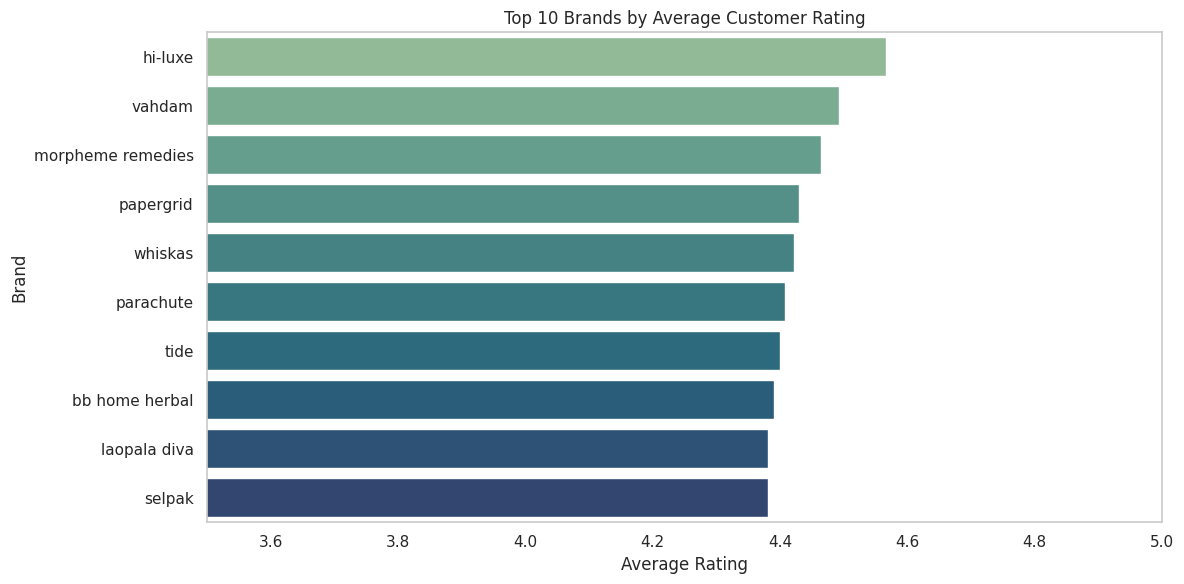

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_brands,
    x='avg_rating',
    y='brand',
    palette='crest'
)
plt.title("Top 10 Brands by Average Customer Rating")
plt.xlabel("Average Rating")
plt.ylabel("Brand")
plt.xlim(3.5, 5)
plt.grid(axis='x')
plt.tight_layout()
plt.show()

**🔍 Key Insights:**

📌 These brands consistently achieve high customer satisfaction, making them potential brand ambassadors for BigBasket.

📌 Many of them also offer a broad assortment (higher SKU count), showing consistency across products.

📌 Brands with high ratings and low average discounts signal strong brand equity, as they sell well without heavy promotions.

#### **🎯 6.7: Identify Top-Selling Brands**

**📌 Why this matters:**

- Brands that consistently sell more (in quantity or value) are revenue drivers.

- Helps prioritize shelf space, marketing efforts, and partnerships.

- Reveals which brands customers actually purchase, not just rate highly.

**🧰 Step 1: Calculate Sales Volume and Value by Brand**

💬 What we’re doing: We’ll assume sales proxy using:

- sale_price as a value-per-unit

- Count of rows (each row = 1 SKU sold or listed unit) as a volume proxy

In [ ]:
# Group by brand and calculate total sales value and volume
brand_sales = bb_df.groupby('brand').agg({
    'sale_price': ['sum', 'mean', 'count']
}).reset_index()

# Rename columns
brand_sales.columns = ['brand', 'total_sales_value', 'avg_sale_price', 'product_count']

**🧰 Step 2: Top Brands by Total Sales Value**

In [ ]:
# Top 10 brands by total sales value
top_selling_brands_value = brand_sales.sort_values(by='total_sales_value', ascending=False).head(10)

**📊 Visualize Top-Selling Brands (by Value)**

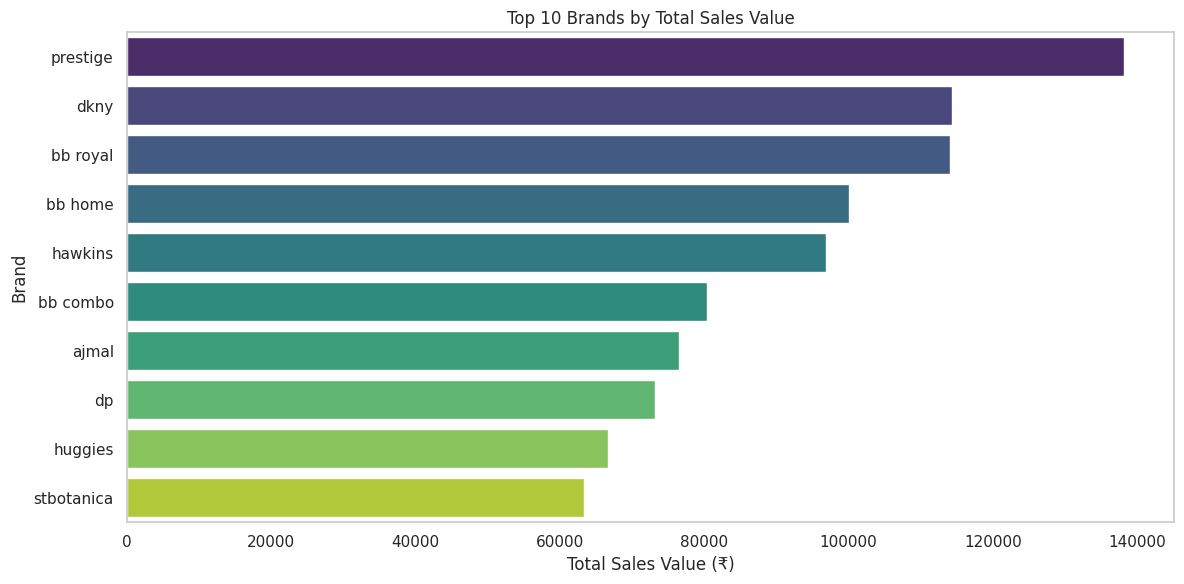

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_selling_brands_value,
    x='total_sales_value',
    y='brand',
    palette='viridis'
)
plt.title("Top 10 Brands by Total Sales Value")
plt.xlabel("Total Sales Value (₹)")
plt.ylabel("Brand")
plt.grid(axis='x')
plt.tight_layout()
plt.show()

**🔍 Key Insights (Top by Value):**

✅ These brands contribute most to revenue, even if they aren’t the most affordable.

✅ Strong candidates for high-visibility placements, bulk deals, and strategic partnerships.

✅ We may see high-value brands that have fewer but expensive SKUs, like specialty or gourmet brands.

**🧰 Top Brands by Sales Volume (Count of SKUs)**

💬 This highlights brands with wide distribution and customer reach, even if they're lower value per unit.

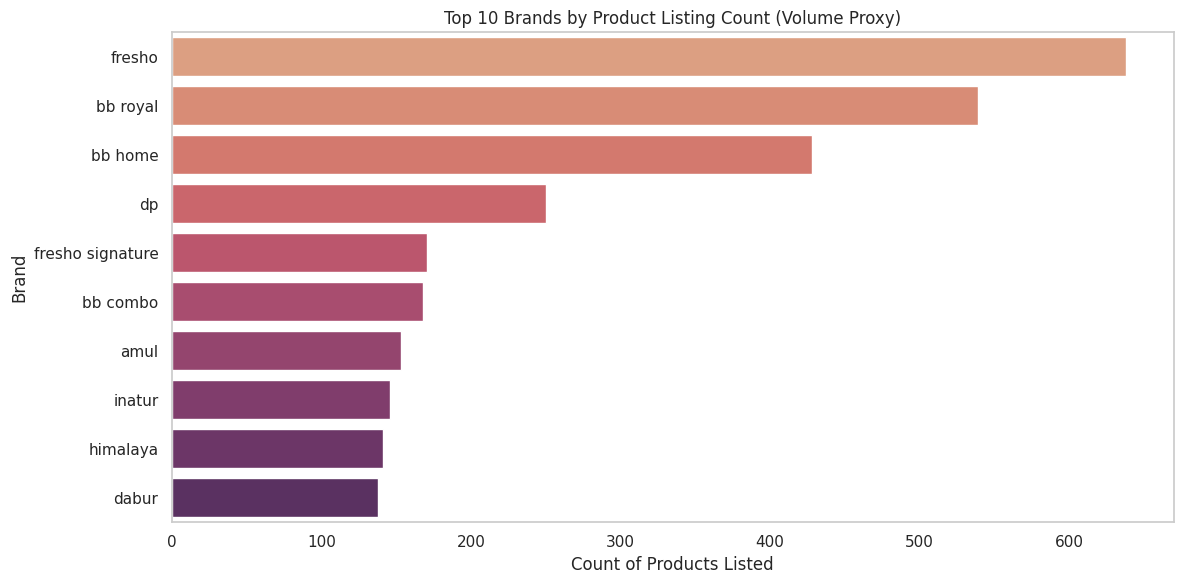

In [ ]:
# Top 10 brands by product listing count
top_brands_volume = brand_sales.sort_values(by='product_count', ascending=False).head(10)

# Visualize
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_brands_volume,
    x='product_count',
    y='brand',
    palette='flare'
)
plt.title("Top 10 Brands by Product Listing Count (Volume Proxy)")
plt.xlabel("Count of Products Listed")
plt.ylabel("Brand")
plt.grid(axis='x')
plt.tight_layout()
plt.show()

**🧠 Overall Brand Strategy Takeaways:**

- Top-selling brands can be both premium (high value) and mass market (high volume).

- Cross-referencing high sales + high ratings helps identify superstar brands.

- Brands with high sales but poor ratings may require quality control or customer feedback intervention.

#### **6.8: Let’s now perform a cross-analysis of brand sales and ratings to identify:**

⭐ Superstar brands – high sales and high customer satisfaction

⚠️ Popular but poorly rated brands – may need quality or reputation improvement

📉 Highly rated but low sales brands – potential for targeted promotion

**🧰 Step 1: Aggregate Ratings + Sales by Brand**

💬 What we’re doing: We’ll calculate:

- avg_rating: Customer satisfaction

- total_sales_value: Revenue impact

- product_count: Number of products listed (proxy for volume)

In [ ]:
# Group by brand and calculate average rating and sales
brand_performance = bb_df.groupby('brand').agg({
    'rating': 'mean',
    'sale_price': 'sum',
    'product': 'count'
}).reset_index()

# Rename columns for clarity
brand_performance.columns = ['brand', 'avg_rating', 'total_sales_value', 'product_count']

# Drop brands with no ratings to avoid NaNs in visualization
brand_perf_clean = brand_performance.dropna(subset=['avg_rating'])

**🧰 Step 2: Visualize Sales vs. Rating**

💬 We’ll use a scatter plot:

- X-axis: avg_rating (brand reputation)

- Y-axis: total_sales_value (market contribution)

- Size: product_count (market reach)

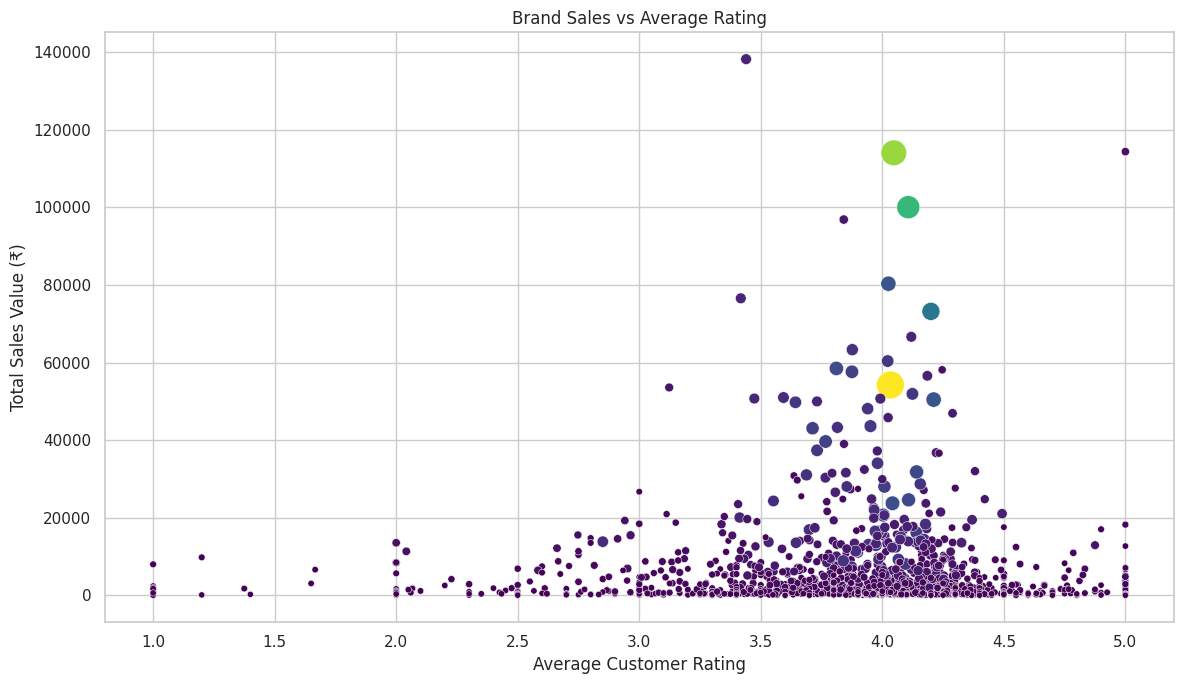

In [ ]:
plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=brand_perf_clean,
    x='avg_rating',
    y='total_sales_value',
    size='product_count',
    sizes=(20, 400),
    hue='product_count',
    palette='viridis',
    legend=False
)
plt.title("Brand Sales vs Average Rating")
plt.xlabel("Average Customer Rating")
plt.ylabel("Total Sales Value (₹)")
plt.grid(True)
plt.tight_layout()
plt.show()

**🔍 Key Insights from Sales vs Rating Analysis**

⭐ Superstar Brands:
- Appear in the top-right quadrant (high rating, high sales)

- These brands are customer favorites and revenue drivers

- Should be prioritized in marketing, bundles, and visibility

⚠️ Popular but Poorly Rated:
- High sales but low ratings

- Suggests strong demand but possible quality or service issues

- Action: Investigate customer feedback, product defects, packaging

📉 Highly Rated but Low Sales:
- May be hidden gems or niche products

- Action: Consider targeted promotions, better placement, or SEO

🤔 Low Rating + Low Sales:
- Typically candidates for SKU rationalization

- Consider phasing out or improving

**Step 6.8.1: Let’s categorize brands into performance quadrants**

**✅ Step 1: Define Thresholds**

We’ll define thresholds to separate brands into meaningful segments:

In [ ]:
# Rating threshold: Above average
rating_threshold = brand_perf_clean['avg_rating'].median()

# Sales threshold: 75th percentile (top 25% of sales)
sales_threshold = brand_perf_clean['total_sales_value'].quantile(0.75)

**✅ Step 2: Classify Each Brand into a Quadrant**

In [ ]:
def classify_brand(row):
    if row['avg_rating'] >= rating_threshold and row['total_sales_value'] >= sales_threshold:
        return 'Superstar Brand'
    elif row['avg_rating'] < rating_threshold and row['total_sales_value'] >= sales_threshold:
        return 'Popular but Poorly Rated'
    elif row['avg_rating'] >= rating_threshold and row['total_sales_value'] < sales_threshold:
        return 'Highly Rated but Low Sales'
    else:
        return 'Low Performer'

brand_perf_clean['performance_quadrant'] = brand_perf_clean.apply(classify_brand, axis=1)

**✅ Step 3: View Top 5 Brands in Each Quadrant**

In [ ]:
# Get top 5 brands by total sales in each quadrant
top_quadrants = (
    brand_perf_clean
    .sort_values(by='total_sales_value', ascending=False)
    .groupby('performance_quadrant')
    .head(5)
    .reset_index(drop=True)
)

top_quadrants[['brand', 'avg_rating', 'total_sales_value', 'product_count', 'performance_quadrant']]

brand  avg_rating  total_sales_value  product_count  \
0               prestige    3.439623          138190.00             68   
1                   dkny    5.000000          114360.00             27   
2               bb royal    4.047122          114056.03            539   
3                bb home    4.106936          100040.50            428   
4                hawkins    3.841379           96857.50             42   
5               bb combo    4.025000           80338.00            168   
6                  ajmal    3.417778           76567.44             68   
7                     dp    4.200000           73195.41            250   
8                huggies    4.119149           66645.03             67   
9                corelle    4.246154           58133.00             26   
10               tai hua    3.992308            3631.50             13   
11              qraa men    5.000000            3627.00              9   
12  bronson professional    2.550000            3595.00              8   
13                tetley    4.261538            3584.75             13   
14                   klf    4.180000            3570.85             10   
15   natureland organics    4.064286            3551.00             28   
16                namhya    5.000000            3546.00              7   
17                  vega    2.750000            3519.75             15   
18          remy marquis    3.800000            3475.00              2   
19             tropicana    3.966667            3464.54             16   

          performance_quadrant  
0     Popular but Poorly Rated  
1              Superstar Brand  
2     Popular but Poorly Rated  
3              Superstar Brand  
4     Popular but Poorly Rated  
5     Popular but Poorly Rated  
6     Popular but Poorly Rated  
7              Superstar Brand  
8              Superstar Brand  
9              Superstar Brand  
10               Low Performer  
11  Highly Rated but Low Sales  
12               Low Performer  
13  Highly Rated but Low Sales  
14  Highly Rated but Low Sales  
15  Highly Rated but Low Sales  
16  Highly Rated but Low Sales  
17               Low Performer  
18               Low Performer  
19               Low Performer

**📊 Brand Segmentation Scatter Plot: Sales vs Rating**

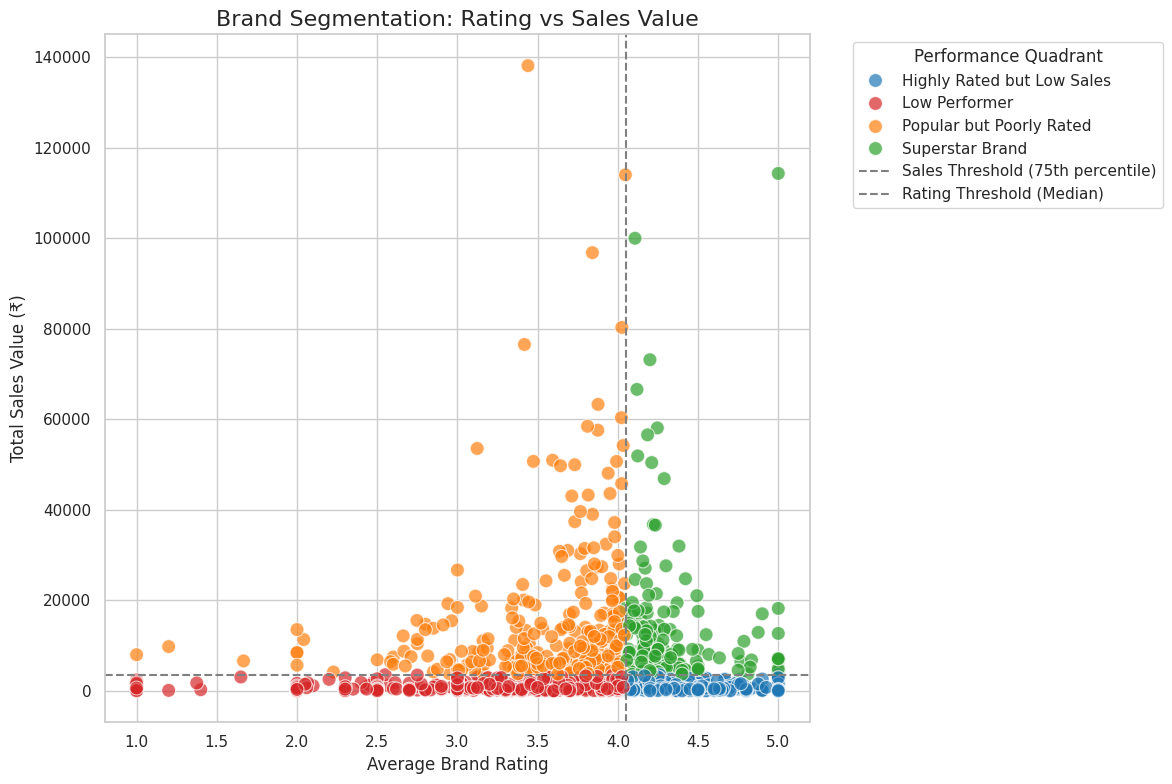

In [ ]:
# Set plot aesthetics
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Scatter plot
sns.scatterplot(
    data=brand_perf_clean,
    x='avg_rating',
    y='total_sales_value',
    hue='performance_quadrant',
    palette={
        'Superstar Brand': '#2ca02c',              # Green
        'Popular but Poorly Rated': '#ff7f0e',      # Orange
        'Highly Rated but Low Sales': '#1f77b4',    # Blue
        'Low Performer': '#d62728'                 # Red
    },
    s=100,
    alpha=0.7
)

# Add reference lines
plt.axhline(sales_threshold, color='gray', linestyle='--', label='Sales Threshold (75th percentile)')
plt.axvline(rating_threshold, color='gray', linestyle='--', label='Rating Threshold (Median)')

# Labels and title
plt.title('Brand Segmentation: Rating vs Sales Value', fontsize=16)
plt.xlabel('Average Brand Rating')
plt.ylabel('Total Sales Value (₹)')
plt.legend(title='Performance Quadrant', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**🧠 What This Visual Tells Us**

Each point is a brand:

- Top right (green): Superstar Brands — both popular and well-rated

- Top left (orange): Popular but Poorly Rated — selling well but potentially risky

- Bottom right (blue): Hidden Gems — customers love them, but they’re not selling much

- Bottom left (red): Low Performers — consider removing or revamping

---

## **🎯 Business Objective 2: Pricing Strategy Analysis**

### **📘 Step 7: Pricing Strategy Analysis**

**📌 Why this step matters:**

Pricing is a critical component of competitive strategy. For BigBasket, understanding how prices are distributed across products, categories, and brands can help:

- Detect overpricing or underpricing within segments

- Identify pricing inconsistencies

- Spot opportunities for tiered pricing (low/mid/high price products)

- Reveal outliers that may impact customer perception or data accuracy

✅ Key KPIs we'll analyze:

- 💲 Average Price per Category/Subcategory

- 📈 Price Range (Min-Max) per Category

- 🪙 Standard Deviation of Prices per Category

- 📉 Price Outlier Count

- 🏷️ Price Tier Distribution (% of low/mid/high-priced products)

#### **🔍 7.1: Average, Min, Max & Standard Deviation of Price per Category**

Let’s start by examining sale_price statistics at the category level to understand which product categories are more premium vs. economy.

In [ ]:
# Grouping by category to calculate sale_price stats
category_price_summary = bb_df.groupby('category')['sale_price'].agg(
    avg_price='mean',
    min_price='min',
    max_price='max',
    std_dev_price='std'
).sort_values(by='avg_price', ascending=False)

# Display the results
category_price_summary

avg_price  min_price  max_price  std_dev_price
category                                                                 
baby care                 534.946180      15.00    3299.00     536.025430
kitchen, garden & pets    507.524615      17.00   12500.00     716.077919
beauty & hygiene          418.679197       3.00    8184.44     590.149182
gourmet & world food      319.854011       5.00    7299.00     404.909469
eggs, meat & fish         288.897486      42.50    2249.10     229.284122
beverages                 239.803925       9.00    3480.00     257.082347
cleaning & household      226.239001       5.00    3600.00     251.068261
foodgrains, oil & masala  193.167500       9.50    4099.00     277.545142
bakery, cakes & dairy     142.802750       5.00    1108.00     131.119098
snacks & branded foods    129.593134       5.00    1950.00     142.283819
fruits & vegetables        50.889336       2.45     527.00      54.261050

**📈 Key Insights:**

We might observe things like:

- Baby care, kitchen, garden & pets has the highest average prices due to specialty items, imported goods, and premium packaging.

- Household Needs or Foodgrains, Oil & Masala may show lower average prices, as they focus on daily-use, budget-friendly SKUs.

- A high standard deviation in some categories (e.g., Kitchen, garden & pets) may indicate a wide range from affordable items.

- Categories with low price variation might reflect a more commoditized pricing structure.

**✅ Visualize Avg. Sale Price per Category with Std Deviation**

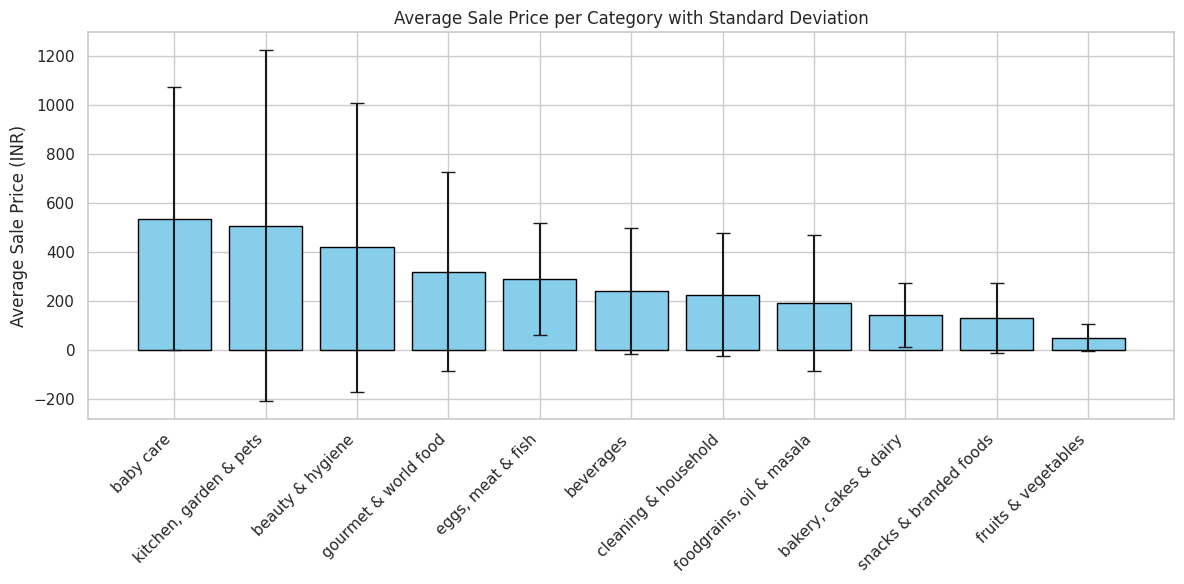

In [ ]:
# Grouping the data by category
price_stats = bb_df.groupby('category')['sale_price'].agg(['mean', 'std']).sort_values(by='mean', ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(price_stats.index, price_stats['mean'], yerr=price_stats['std'], capsize=5, color='skyblue', edgecolor='black')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Average Sale Price (INR)')
plt.title('Average Sale Price per Category with Standard Deviation')
plt.tight_layout()
plt.show()

#### **📊 7.2: Subcategory-Level Pricing Summary**

**🔧 Why we’re doing it:**

This helps us understand:

- Which subcategories carry premium vs. affordable products

- Where there is wide pricing variability, potentially due to diverse product types or package sizes

- Helps identify pricing strategy opportunities or SKU segmentation

In [ ]:
# Grouping by sub_category to calculate sale_price statistics
subcategory_price_summary = bb_df.groupby('sub_category')['sale_price'].agg(
    avg_price='mean',
    min_price='min',
    max_price='max',
    std_dev_price='std'
).sort_values(by='avg_price', ascending=False)

# Display the result
subcategory_price_summary

avg_price  min_price  max_price  std_dev_price
sub_category                                                                 
cookware & non stick         1204.869774     129.00    7999.00    1187.103249
oils & vinegar                952.411297      92.00    7299.00    1162.511697
fragrances & deos             893.099590      34.30    6660.00    1148.052117
pet food & accessories        857.348034      17.00   12500.00    1281.772116
diapers & wipes               741.909960      18.00    2799.00     625.800605
...                                  ...        ...        ...            ...
exotic fruits & veggies        60.250429      10.00     330.00      59.256130
cuts & sprouts                 37.063021      15.00     198.00      23.744212
organic fruits & vegetables    34.654412       5.00     155.00      29.455874
herbs & seasonings             31.080417       2.45     119.00      28.373428
fresh vegetables               30.773452       5.00     133.31      19.616931

[90 rows x 4 columns]

**🧠 Insights from Subcategory-Level Pricing**

💰 High-Priced Subcategories

- These subcategories have the highest average sale prices:

  - Cookware & Non Stick — ₹1204.87 average

  - Oils & Vinegar — ₹952.41

  - Fragrances & Deos — ₹893.10

🔎 Why it matters: These categories likely offer premium or large-pack products and may attract high-value shoppers. They're ideal for upselling, bundle deals, or targeted premium promotions.

💸 Low-Priced Subcategories

- These subcategories have the lowest average sale prices:

  - Fresh Vegetables — ₹30.77

  - Herbs & Seasonings — ₹31.08

  - Organic Fruits & Vegetables — ₹34.65

🔎 Why it matters: These are staple or frequently purchased items with thin margins. Strategic pricing, cross-selling with premium items, or subscription models might work here.

⚖️ Subcategories with High Price Volatility

  - Pet Food & Accessories — Std Dev ₹1281.77

  - Cookware & Non Stick — Std Dev ₹1187.10

  - Oils & Vinegar — Std Dev ₹1162.51

🔎 Why it matters: These have large pricing ranges, suggesting a diverse assortment (budget vs premium). These are good candidates for product segmentation, tiered promotions, or personalized recommendations.

**📊 Average Sale Price per Subcategory with Standard Deviation**

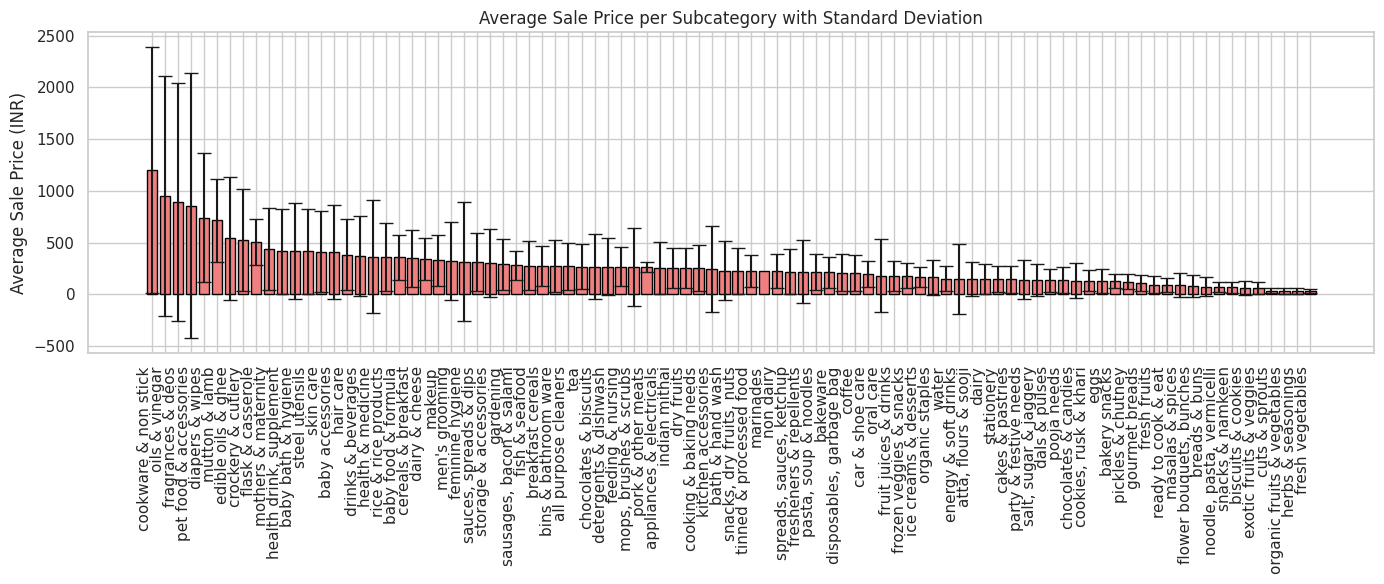

In [ ]:
# Grouping the data by subcategory
price_stats_subcat = bb_df.groupby('sub_category')['sale_price'].agg(['mean', 'std']).sort_values(by='mean', ascending=False)

# Plotting
plt.figure(figsize=(14, 6))
plt.bar(price_stats_subcat.index, price_stats_subcat['mean'], yerr=price_stats_subcat['std'],
        capsize=5, color='lightcoral', edgecolor='black')
plt.xticks(rotation=90, ha='right')
plt.ylabel('Average Sale Price (INR)')
plt.title('Average Sale Price per Subcategory with Standard Deviation')
plt.tight_layout()
plt.show()

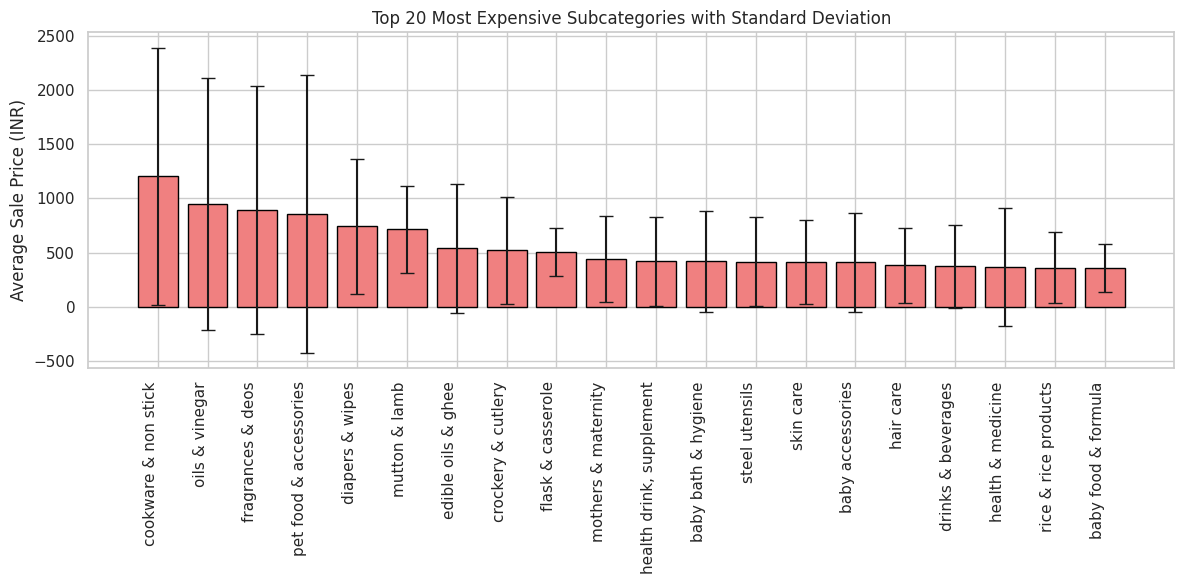

In [ ]:
# Top 20 most expensive subcategories
top_20 = price_stats_subcat.head(20)

plt.figure(figsize=(12, 6))
plt.bar(top_20.index, top_20['mean'], yerr=top_20['std'],
        capsize=5, color='lightcoral', edgecolor='black')
plt.xticks(rotation=90, ha='right')
plt.ylabel('Average Sale Price (INR)')
plt.title('Top 20 Most Expensive Subcategories with Standard Deviation')
plt.tight_layout()
plt.show()

#### **📊 7.3: Pricing Distribution Across Categories**

💬 What we’re doing:

We’ll visualize the distribution of sale prices across product categories using a box plot.

📦 Box plots help us understand:

- Median prices

- Interquartile ranges (spread)

- Presence of outliers

- Overall pricing trends and variability within each category

🔧 Why we’re doing it:

This gives a clear visual of how prices are spread in each category—some might have tight, uniform pricing while others show wide spreads, indicating varied product tiers (budget vs premium).

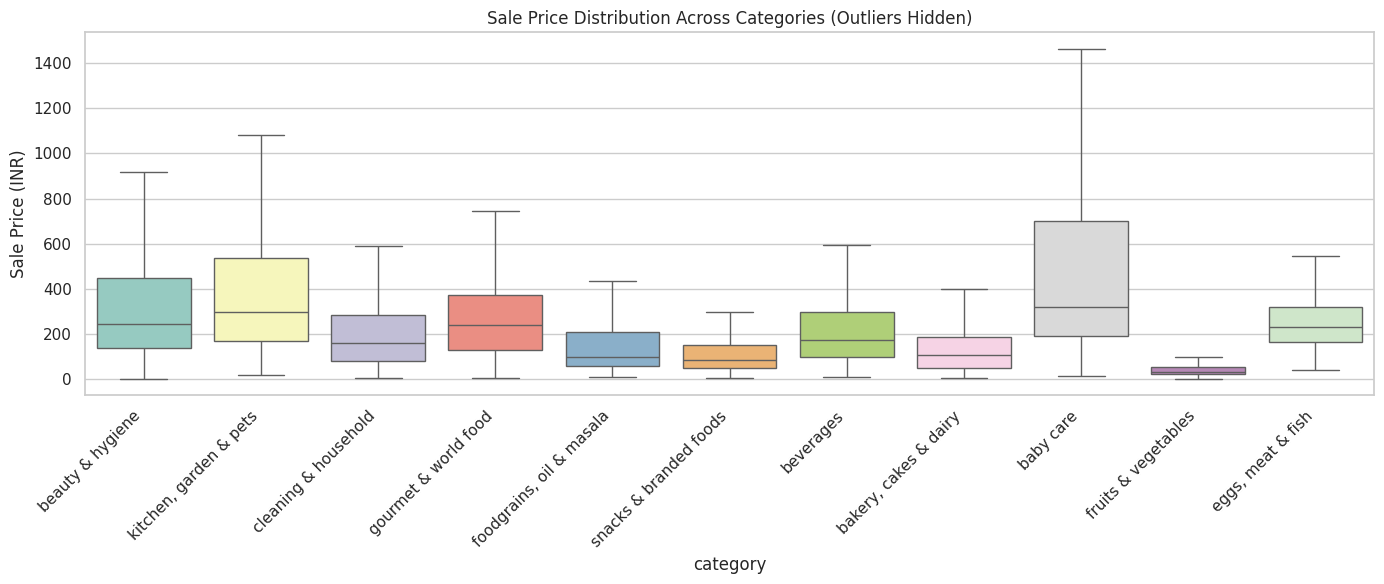

In [ ]:
# Set figure size
plt.figure(figsize=(14, 6))

# Create a box plot
sns.boxplot(x='category', y='sale_price', data=bb_df, showfliers=False, palette='Set3')

# Customize the plot
plt.xticks(rotation=45, ha='right')
plt.ylabel('Sale Price (INR)')
plt.title('Sale Price Distribution Across Categories (Outliers Hidden)')
plt.tight_layout()

# Display the plot
plt.show()

**🔍 Key Interpretation Tips:**

- Longer boxes → More price variability.

- Higher median lines → Categories with generally higher pricing.

- Outlier dots (if shown) → Premium or odd-priced products.

#### **📊 7.4: Pricing vs Discount Strategy by Category**

**🔧 Why we’re doing it:**

This helps identify:

- Categories heavily reliant on discounting to drive sales

- Categories positioned as premium (high price, low discount)

- Categories that are value-focused (low price, low discount)

- Potential over-discounting (high discount without significant pricing power)

In [ ]:
# Group by category to get average sale price and average discount %
category_discount_summary = bb_df.groupby('category').agg(
    avg_sale_price=('sale_price', 'mean'),
    avg_discount_pct=('discount_percent', 'mean')
).sort_values(by='avg_discount_pct', ascending=False)

# Display summary
print(category_discount_summary)

                          avg_sale_price  avg_discount_pct
category                                                  
kitchen, garden & pets        507.524615         22.175704
fruits & vegetables            50.889336         21.249803
beauty & hygiene              418.679197         12.344458
foodgrains, oil & masala      193.167500         11.838797
cleaning & household          226.239001         10.792663
beverages                     239.803925          9.559457
eggs, meat & fish             288.897486          8.057686
gourmet & world food          319.854011          7.863945
bakery, cakes & dairy         142.802750          7.664160
snacks & branded foods        129.593134          6.642914
baby care                     534.946180          5.852656


**📈 Visualizing Pricing vs Discount Strategy (Scatter Plot)**

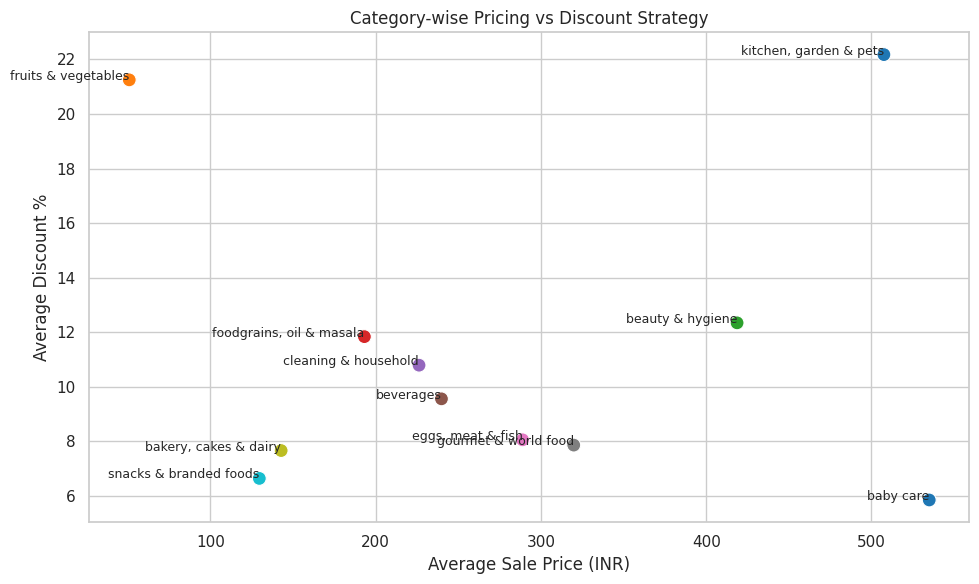

In [ ]:
# Scatter plot of pricing vs. discount
plt.figure(figsize=(10, 6))
sns.scatterplot(data=category_discount_summary,
                x='avg_sale_price',
                y='avg_discount_pct',
                hue=category_discount_summary.index,
                s=100, palette='tab10', legend=False)

# Annotate each point with the category name
for idx in category_discount_summary.index:
    plt.text(
        x=category_discount_summary.loc[idx, 'avg_sale_price'],
        y=category_discount_summary.loc[idx, 'avg_discount_pct'],
        s=idx,
        fontsize=9,
        ha='right'
    )

# Labels and title
plt.xlabel('Average Sale Price (INR)')
plt.ylabel('Average Discount %')
plt.title('Category-wise Pricing vs Discount Strategy')
plt.grid(True)
plt.tight_layout()
plt.show()

**🔍 Insights to Gain:**

- Categories in the top-right quadrant → High price & high discount → likely premium but price-sensitive

- Bottom-right → High price, low discount → strong pricing power (premium perception)

- Top-left → Lower priced but heavily discounted → aggressive promotion

- Bottom-left → Economical categories with minimal discounting → likely essentials

**🧭 Strategic Takeaways:**

- Monitor over-discounting in "Kitchen, Garden & Pets" and "Fruits & Vegetables"—could hurt long-term margins.

- Baby Care and Gourmet show premium resilience—potential to expand SKUs without discounts.

- Optimize discounting strategy across mid-tier categories to find a balance between competitiveness and profitability.

#### **📊 7.5: Sub-Category-wise Pricing vs Discount Strategy**

**🔧 Why we’re doing this:**

This helps us:

- Identify sub-categories with premium pricing but low discounts (potentially strong brand equity)

- Spot aggressively discounted low-cost items (possible traffic drivers or inventory clearance)

- Understand promotion patterns and possible over/under discounting

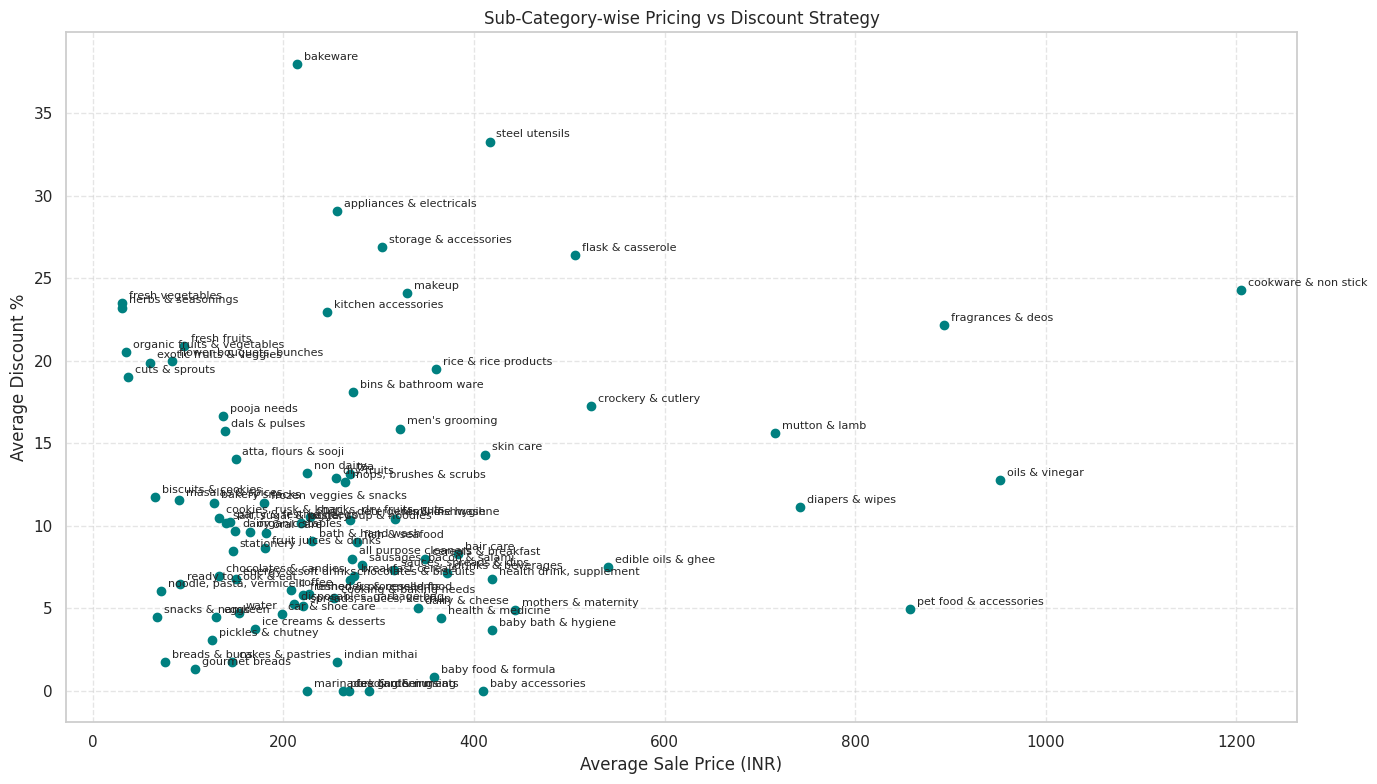

In [ ]:
# Step 1: Group by sub-category and compute mean sale price & discount
subcat_discount_pricing = bb_df.groupby('sub_category').agg(
    avg_sale_price=('sale_price', 'mean'),
    avg_discount_pct=('discount_percent', 'mean')
).reset_index()

# Step 2: Plotting
plt.figure(figsize=(14, 8))
plt.scatter(
    subcat_discount_pricing['avg_sale_price'],
    subcat_discount_pricing['avg_discount_pct'],
    color='teal'
)

# Annotate each point with sub-category name
for i, row in subcat_discount_pricing.iterrows():
    plt.annotate(
        row['sub_category'],
        (row['avg_sale_price'], row['avg_discount_pct']),
        textcoords="offset points",
        xytext=(5, 3),
        ha='left',
        fontsize=8
    )

plt.xlabel('Average Sale Price (INR)')
plt.ylabel('Average Discount %')
plt.title('Sub-Category-wise Pricing vs Discount Strategy')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**📌 Key Insights from Sub-Category-wise Pricing vs Discount Strategy**

🔝 Premium Pricing + High Discounts
- These sub-categories have high average sale prices and are also offering notably high discounts — possibly signaling luxury or aspirational products being pushed via promotions:

  - Cookware & Non Stick (₹1200+, ~24% discount)

  - Steel Utensils and Flask & Casserole (~₹600–800, >28% discount)

  - Fragrances & Deos (~₹900+, ~22%)

- 🧠 These could be high-margin items with room for discounts — used for competitive differentiation.

🎯 Low Price + High Discounts
- These may be volume drivers or perishables aimed at increasing footfall:

  - Bakeware, Fresh Vegetables, Herbs & Seasonings, Cuts & Sprouts – all priced under ₹100–300, with discounts ranging from 20–38%

- 🧠 These are often essentials and/or short shelf-life items—discounts likely help ensure inventory movement.

📉 Premium Pricing + Low Discounts
- These items are priced high but discounted very little, indicating strong brand/category positioning or low elasticity:

  - Pet Food & Accessories, Baby Accessories, Baby Food & Formula, Health & Medicine

- 🧠 Essential or specialized products where demand is stable and discounting is less critical.

💸 Low Price + Low Discount
- Examples:

  - Pickles & Chutney, Ready to Cook, Instant Mixes, Indian Mithai, Gourmet Breads

- 🧠 These may be niche, value-based items with tight margins or already competitively priced.

**🎯 What You Can Do with These Insights:**

- 🔍 Targeted Promotions: Focus discounts on high-inventory or price-elastic sub-categories.

- 💰 Margin Optimization: Re-evaluate whether discounts are necessary for premium, low-elasticity categories.

- 🧹 SKU Rationalization Aid: Combine with sales & ratings to decide whether some high-discounted items are pulling their weight.

- 📦 Bundle Ideas: Pair low-discount premium items with high-discount ones in bundles for value perception.

#### **📊 7.6: Brand-Level Pricing vs Discount Strategy**

**💬 What we’re doing:**

We’ll analyze the average sale price and discount % at the brand level to identify:

- Premium vs budget brands

- Aggressive vs conservative discounting strategies

**🔧 Why we’re doing it:**

This helps us:

- Discover brands that position themselves as premium vs affordable

- Spot brands relying heavily on discounts to drive sales

- Evaluate how price vs discount tradeoffs play out in brand strategy

In [ ]:
# Grouping data by brand to get avg sale price and avg discount %
brand_pricing_discount = bb_df.groupby('brand').agg(
    avg_price=('sale_price', 'mean'),
    avg_discount=('discount_percent', 'mean'),
    product_count=('product', 'count')
).reset_index()

# Optional: filter to brands with at least N products to reduce noise
brand_pricing_discount_filtered = brand_pricing_discount[brand_pricing_discount['product_count'] >= 30]

# Sort for review
brand_pricing_discount_filtered = brand_pricing_discount_filtered.sort_values(by='avg_price', ascending=False)

In [ ]:
brand_pricing_discount_filtered

brand    avg_price  avg_discount  product_count
897     hawkins  2306.130952      5.275000             42
1671   prestige  2032.205882     15.971324             68
1646     police  1531.151429     20.422571             35
53        ajmal  1125.991765     25.967794             68
1609   pedigree  1066.615455      7.185000             44
...         ...          ...           ...            ...
2243  weikfield    60.544118     10.351471             34
610     eastern    54.409333      7.883500             60
2005   sunfeast    53.612078      9.915065             77
310   britannia    51.691827      8.817115            104
1592      parle    33.364468      8.435532             47

[229 rows x 4 columns]

**📊 Brand-Level Pricing vs Discount Strategy Visualization**

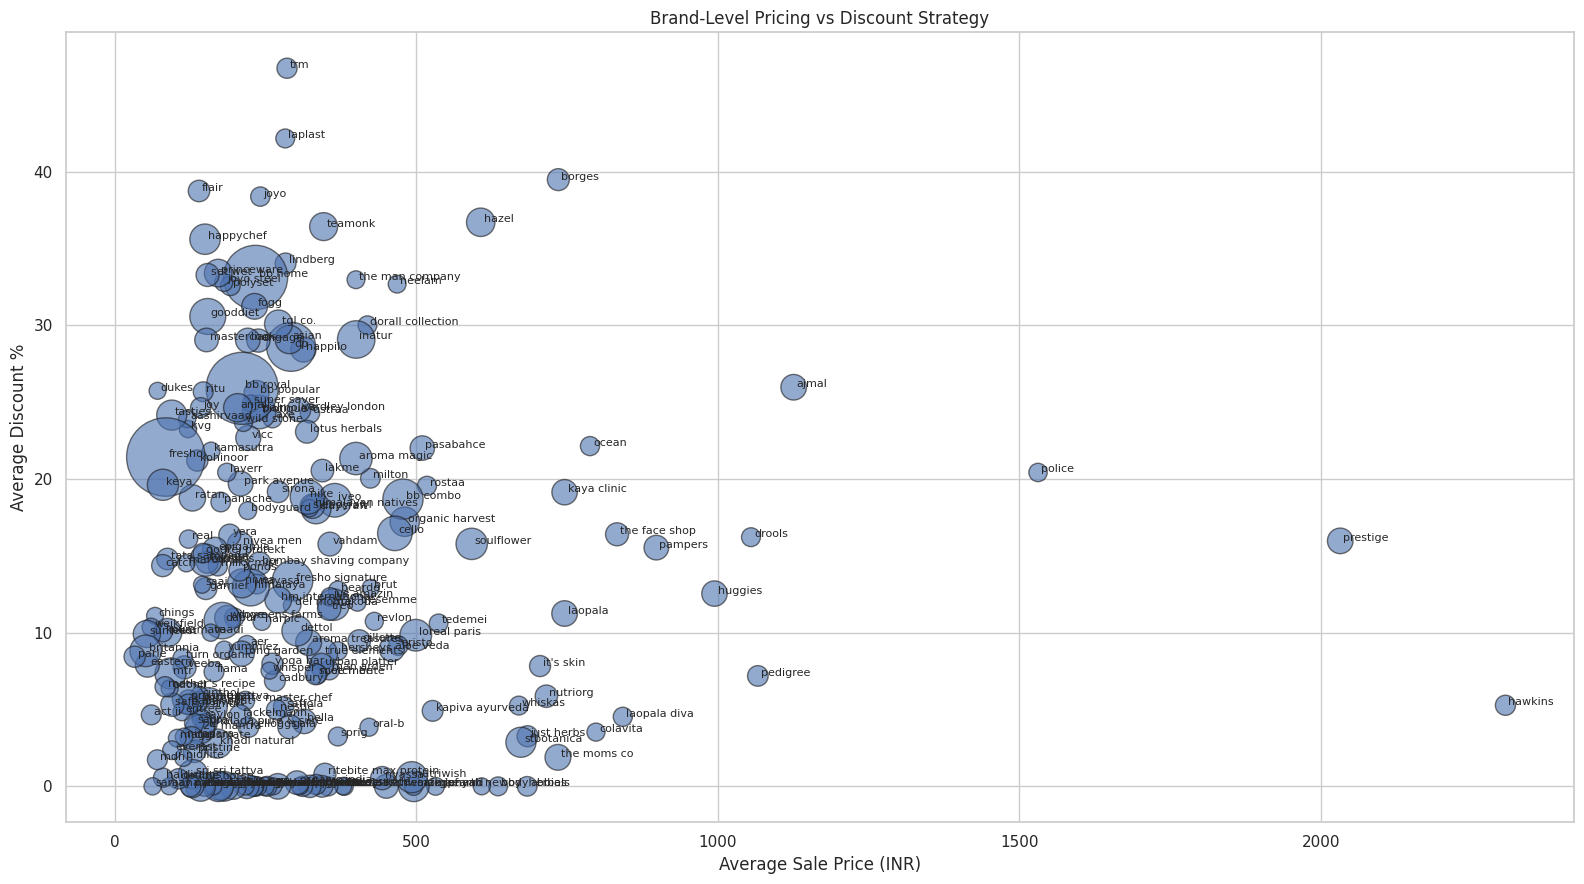

In [ ]:
# Set figure size
plt.figure(figsize=(16, 9))

# Scatter plot with size based on product count
plt.scatter(
    brand_pricing_discount_filtered['avg_price'],
    brand_pricing_discount_filtered['avg_discount'],
    s=brand_pricing_discount_filtered['product_count'] * 5,  # scale size for visibility
    alpha=0.6,
    edgecolors='k'
)

# Annotate brand names
for i, row in brand_pricing_discount_filtered.iterrows():
    plt.text(
        row['avg_price'] + 5,  # slight offset for readability
        row['avg_discount'],
        row['brand'],
        fontsize=8
    )

# Axis labels and title
plt.xlabel("Average Sale Price (INR)")
plt.ylabel("Average Discount %")
plt.title("Brand-Level Pricing vs Discount Strategy")
plt.grid(True)
plt.tight_layout()
plt.show()

**🔍 Preliminary Observations & Insights**

💰 Premium Pricing, Low Discount Brands
- Hawkins, Prestige, Police, Pedigree, and Ajmal sit at the far right, showing very high average prices and low to moderate discounts.

- These brands likely leverage strong brand equity or offer specialized, durable goods.

🛒 Affordable, High Discount Brands
- Hazel, Borges, Teamonk, and Tupperware exhibit aggressive discounting strategies despite mid-range pricing—possibly to drive volume or market penetration.

📦 High Product Count, Balanced Strategy
- Brands with large bubbles (like Amul, Tata, Himalaya, Godrej, etc.) show a moderate price point and moderate discounts—indicating well-balanced pricing strategies backed by broad assortments.

🧼 Value Brands Cluster
- A dense cluster is visible around ₹100–₹300 price range with 5–20% discounts, reflecting the mainstream FMCG players competing in daily essentials with tight margins.

🚩 Outliers to Investigate
- Some brands offer very high discounts (30–45%)—this could be:

  - Seasonal promotion

  - Inventory clearance

  - New product push

  - Or misclassified discount values (worth checking for data anomalies)

#### **🔎 7.7: Discount Distribution Across Categories**

Objective: Understand how discounts are distributed across categories to identify:

- Aggressively discounted product categories

- Categories with stable/no discounts

- Outliers or unusual discount behavior

We’ll use:

- Box Plot – for visualizing the spread and outliers in discount % by category.

- Violin Plot – to explore the distribution density of discounting within categories.

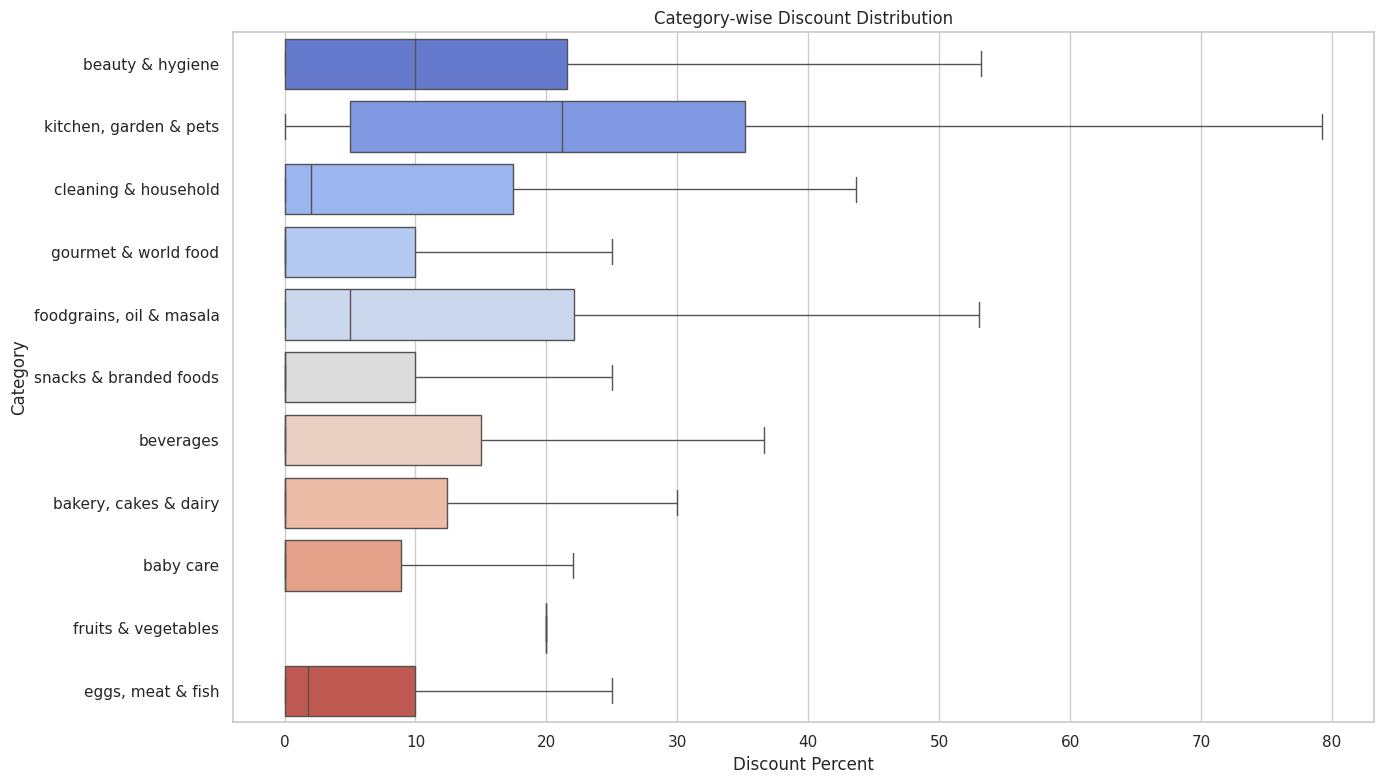

In [ ]:
# Set plot style
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

# Create boxplot of discount% per category
sns.boxplot(
    data=bb_df,
    x='discount_percent',
    y='category',
    orient='h',
    palette='coolwarm',
    showfliers=False  # Optional: hides extreme outliers for clarity
)

# Plot labeling
plt.title('Category-wise Discount Distribution')
plt.xlabel('Discount Percent')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

#### **📊 7.8: Discount Penetration Across Categories**

🎯 Objective:

Quantify how prevalent discounting is within each category — i.e., what proportion of products in each category are sold at a discount.

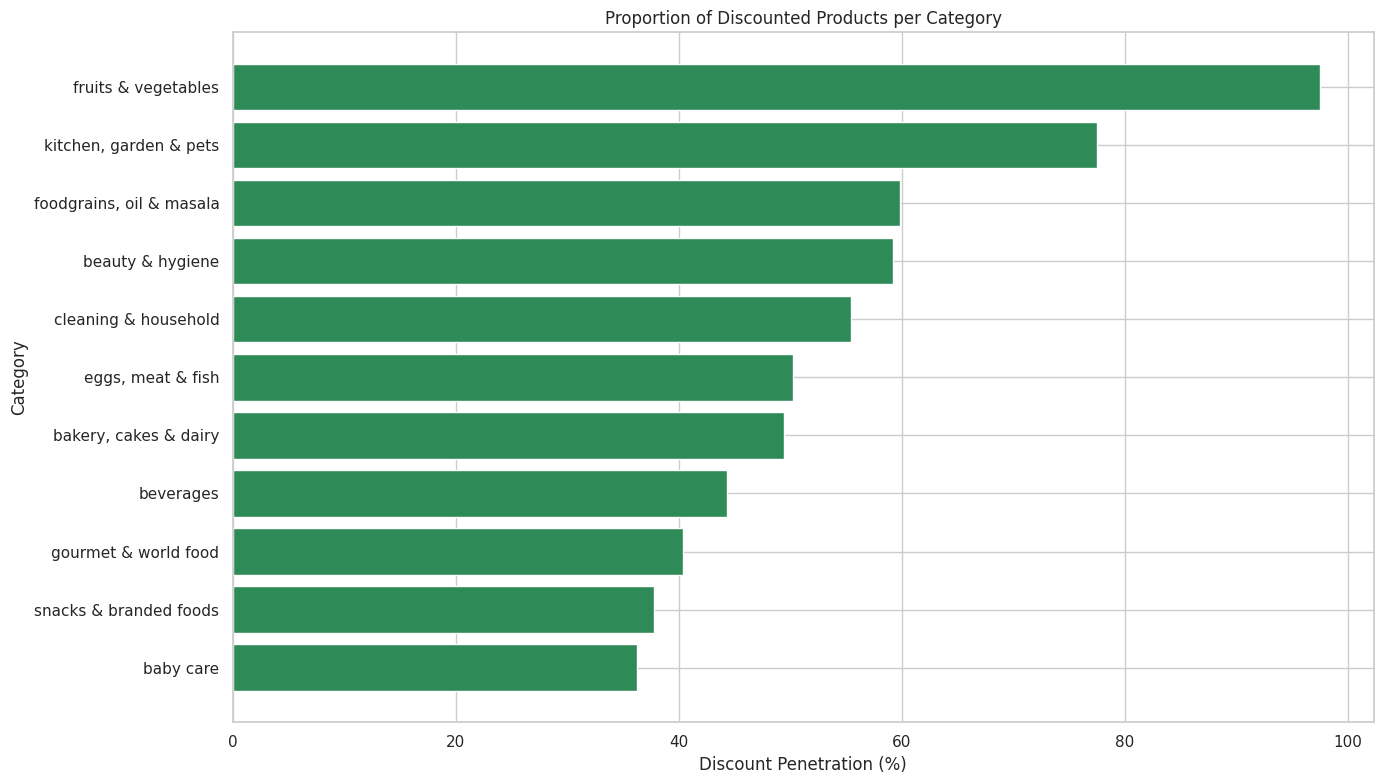

In [ ]:
# Create a new column for discount flag
bb_df['has_discount'] = bb_df['discount_percent'] > 0

# Group by category to calculate discount penetration
discount_penetration = (
    bb_df.groupby('category')['has_discount']
    .agg(['sum', 'count'])
    .assign(discount_penetration_percent=lambda x: (x['sum'] / x['count']) * 100)
    .sort_values(by='discount_penetration_percent', ascending=False)
)

# Plotting

plt.figure(figsize=(14, 8))
plt.barh(
    discount_penetration.index,
    discount_penetration['discount_penetration_percent'],
    color='seagreen'
)
plt.xlabel('Discount Penetration (%)')
plt.ylabel('Category')
plt.title('Proportion of Discounted Products per Category')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

**📌 What This Shows:**

- Categories with nearly 100% penetration are likely strategically discounted (competitive necessity).

- Categories with low penetration may use everyday pricing or premium pricing strategies.

#### **📉 7.9: Exploring Price Elasticity Signals**

🎯 Objective:

Investigate whether higher prices lead to lower units sold across different product categories (or subcategories), i.e., infer price elasticity trends.

In [ ]:
bb_df.columns

Index(['product', 'category', 'sub_category', 'brand', 'sale_price',
       'market_price', 'type', 'rating', 'description', 'discount_amount',
       'discount_percent', 'rating_bin', 'type_grouped', 'subcat_avg_rating',
       'rating_gap', 'has_discount'],
      dtype='object')

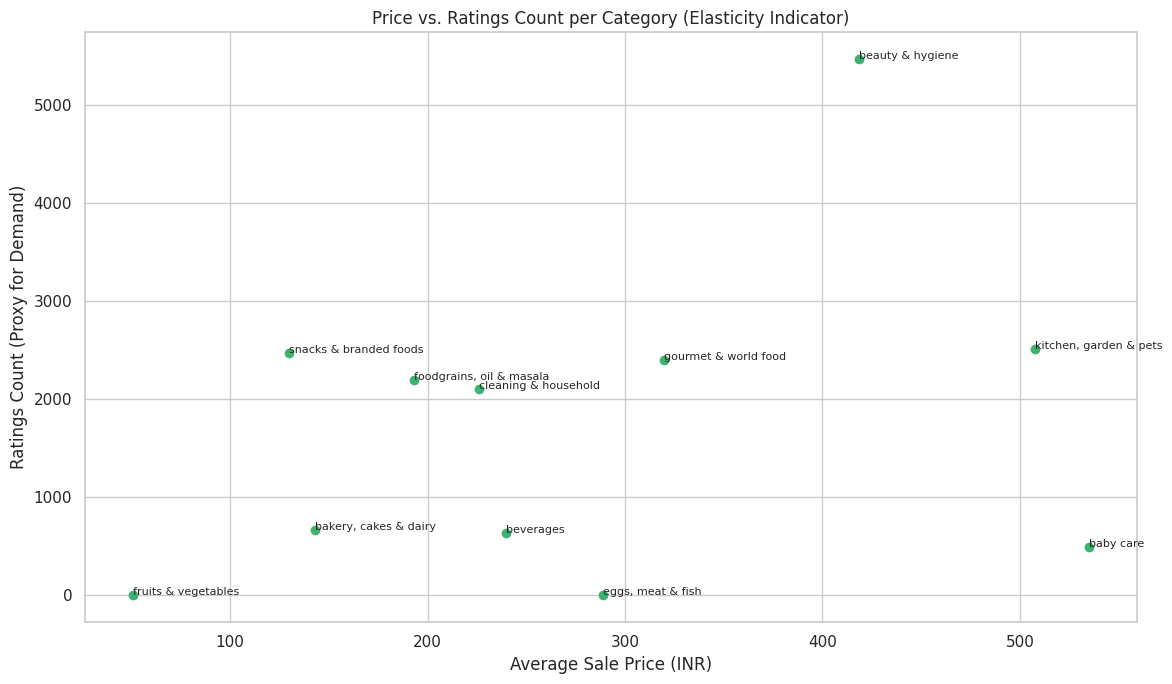

In [ ]:
# Group by category to compute average sale price and average ratings count
elasticity_proxy = (
    bb_df.groupby('category')
    .agg(avg_price=('sale_price', 'mean'), avg_ratings=('rating', 'mean'), ratings_count=('rating', 'count'))
    .reset_index()
)

# Visualizing price vs. demand (using count of ratings as proxy)
plt.figure(figsize=(12, 7))
plt.scatter(elasticity_proxy['avg_price'], elasticity_proxy['ratings_count'], color='mediumseagreen')

# Add category labels
for i, row in elasticity_proxy.iterrows():
    plt.text(row['avg_price'], row['ratings_count'], row['category'], fontsize=8)

plt.xlabel('Average Sale Price (INR)')
plt.ylabel('Ratings Count (Proxy for Demand)')
plt.title('Price vs. Ratings Count per Category (Elasticity Indicator)')
plt.grid(True)
plt.tight_layout()
plt.show()

**📌 Key Observations:**

- Beauty & Hygiene:

  - High price + very high ratings count → Likely inelastic (demand not very sensitive to price).

  - Strong brand play, essential or aspirational purchases.

- Baby Care & Kitchen, Garden & Pets:

  - High prices but moderate demand → Could indicate selective elasticity.

  - Possibly influenced by necessity vs indulgence.

- Gourmet & World Food:

  - Higher price + moderate ratings → Likely a niche category with loyal, less price-sensitive customer base.

- Fruits & Vegetables / Eggs, Meat & Fish:

  - Low demand despite being essentials → Possibly due to offline preference or lower online engagement.

  - Could also be influenced by freshness concerns.

- Snacks, Foodgrains, Cleaning:

  - Moderate price, high ratings count → These might be value-driven and price elastic, but still high in engagement.

---

### **🧾 Objective 2 Summary: Pricing Strategy Analysis**

The analysis focused on BigBasket’s pricing across categories, subcategories, and brands to optimize pricing and discount strategies.

**📌 Key Insights:**

1. **Category-Level**

  - Premium: Baby Care and Kitchen, Garden & Pets have high prices.

  - Essential: Foodgrains, Oil & Masala and Household Needs are low-priced.

  - Price Range: Some categories show high price diversity.

2. **Subcategory-Level**

  - Premium: Cookware & Non Stick, Fragrances & Deos.

  - Essentials: Fresh Vegetables, Herbs & Seasonings are low-margin.

  - Volatility: Pet Food and Oils & Vinegar show price variations.

3. **Price Distribution**

  - Tight pricing in some categories; others show diverse price ranges.

4. **📊 Pricing vs Discount Strategy:**
  - Category-Level

    - High Discounts: Kitchen, Garden & Pets, Fruits & Vegetables — risk of over-discounting.

    - Minimal Discounts: Baby Care, Gourmet Foods — strong brand positioning.

    - Mid-Tier: Moderate pricing and discounting.

  - Subcategory-Level

    - Premium + High Discount: E.g., Cookware, Fragrances.

    - Low Price + High Discount: E.g., Fresh Vegetables, Sprouts.

    - Premium + Low Discount: E.g., Pet Food, Baby Products.

    - Low Price + Low Discount: Niche or value-for-money items.

5. **Brand-Level**

  - Premium Brands: E.g., Hawkins, Prestige — low discount.

  - Affordable Brands: E.g., Hazel, Tupperware — high discount for growth.

  - Balanced Brands: E.g., Amul, Tata — moderate pricing and discounting.

**🎯 Strategic Takeaways:**

- Adjust Discounts: Protect margins in premium categories with high discounts.

- Tiered Pricing: For high-variance subcategories.

- Promotions: Use pricing-discount profiles for bundling and cross-sell offers.

- Monitor Brands: Balance pricing and discounts for competitiveness.

---

## **🎯 Business Objective 3: Brand & Category Positioning**

Goal:
Identify how brands and categories are positioned in terms of price, assortment depth, discounting, and customer engagement to understand market segmentation and competitive strategy.

**🧩 Step-by-Step Approach:**

We'll explore this through three core dimensions:

- Category-Level Positioning

- Brand-Level Positioning

- Price-Tier Distribution Across Categories

#### **✅ 8.1: Category-Level Positioning**

🔍 Analysis Plan:
We'll evaluate how categories differ across:

- Average price (avg_price)

- Product assortment (product_count)

- Average discount (avg_discount)

- Ratings count (ratings_count) — proxy for engagement/demand

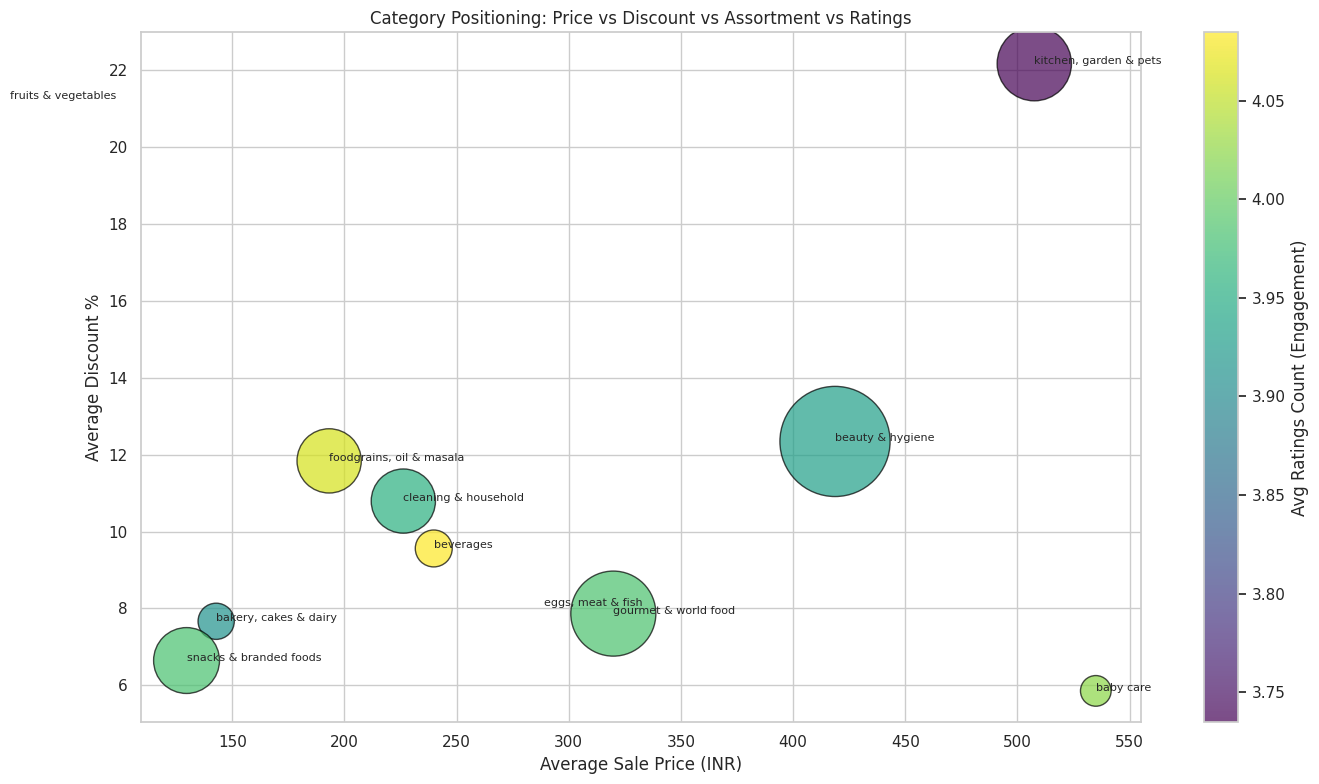

In [ ]:
# Group and prepare category summary
category_summary = bb_df.groupby('category').agg(
    avg_price=('sale_price', 'mean'),
    avg_discount=('discount_percent', 'mean'),
    product_count=('product', 'count'),
    avg_ratings=('rating', 'mean')
).reset_index()

# Bubble chart
plt.figure(figsize=(14, 8))
scatter = plt.scatter(
    category_summary['avg_price'],
    category_summary['avg_discount'],
    s=category_summary['product_count'] * 0.8,
    c=category_summary['avg_ratings'],
    cmap='viridis',
    alpha=0.7,
    edgecolor='black'
)

for i, row in category_summary.iterrows():
    plt.text(row['avg_price'], row['avg_discount'], row['category'], fontsize=8)

plt.xlabel("Average Sale Price (INR)")
plt.ylabel("Average Discount %")
plt.title("Category Positioning: Price vs Discount vs Assortment vs Ratings")
cbar = plt.colorbar(scatter)
cbar.set_label('Avg Ratings Count (Engagement)')
plt.grid(True)
plt.tight_layout()
plt.show()

**🧠 Strategic Insights:**

1. Premium Segments:

  - Baby Care and Gourmet & World Food maintain high pricing with minimal discounting and high user approval.

  - Beauty & Hygiene leverages scale — large product range with moderate discounting and solid ratings.

2. Mass-Market Essentials:

  - Foodgrains and Cleaning balance moderate pricing, decent discounts, and strong engagement — ideal for loyalty-driven strategies.

  - Snacks & Branded Foods succeed with low prices and low discounts, implying inelastic everyday demand.

3. Outlier Management:

  - Kitchen, Garden & Pets stands out for high price + high discount + low rating, indicating potential issues in pricing or product quality alignment.

  - Fruits & Vegetables shows discount-driven pricing likely tied to perishability and hyper-competitive pricing.

#### **✅ 8.2: Brand-Level Positioning**

**🔹 Step 1: Aggregate Brand-Level Metrics**

In [ ]:
# Group by brand and calculate average price, average discount, average rating, and product count
brand_summary = bb_df.groupby('brand').agg({
    'sale_price': 'mean',
    'discount_percent': 'mean',
    'rating': 'mean',           # Proxy for customer satisfaction/engagement
    'product': 'count'          # Assortment: number of products per brand
}).reset_index()

# Rename columns for clarity
brand_summary.columns = ['brand', 'avg_price', 'avg_discount', 'avg_rating', 'product_count']

# Optional: Filter brands with low product count to avoid noisy dots
brand_summary = brand_summary[brand_summary['product_count'] >= 20]

**🔹 Step 2: Create Bubble Chart**

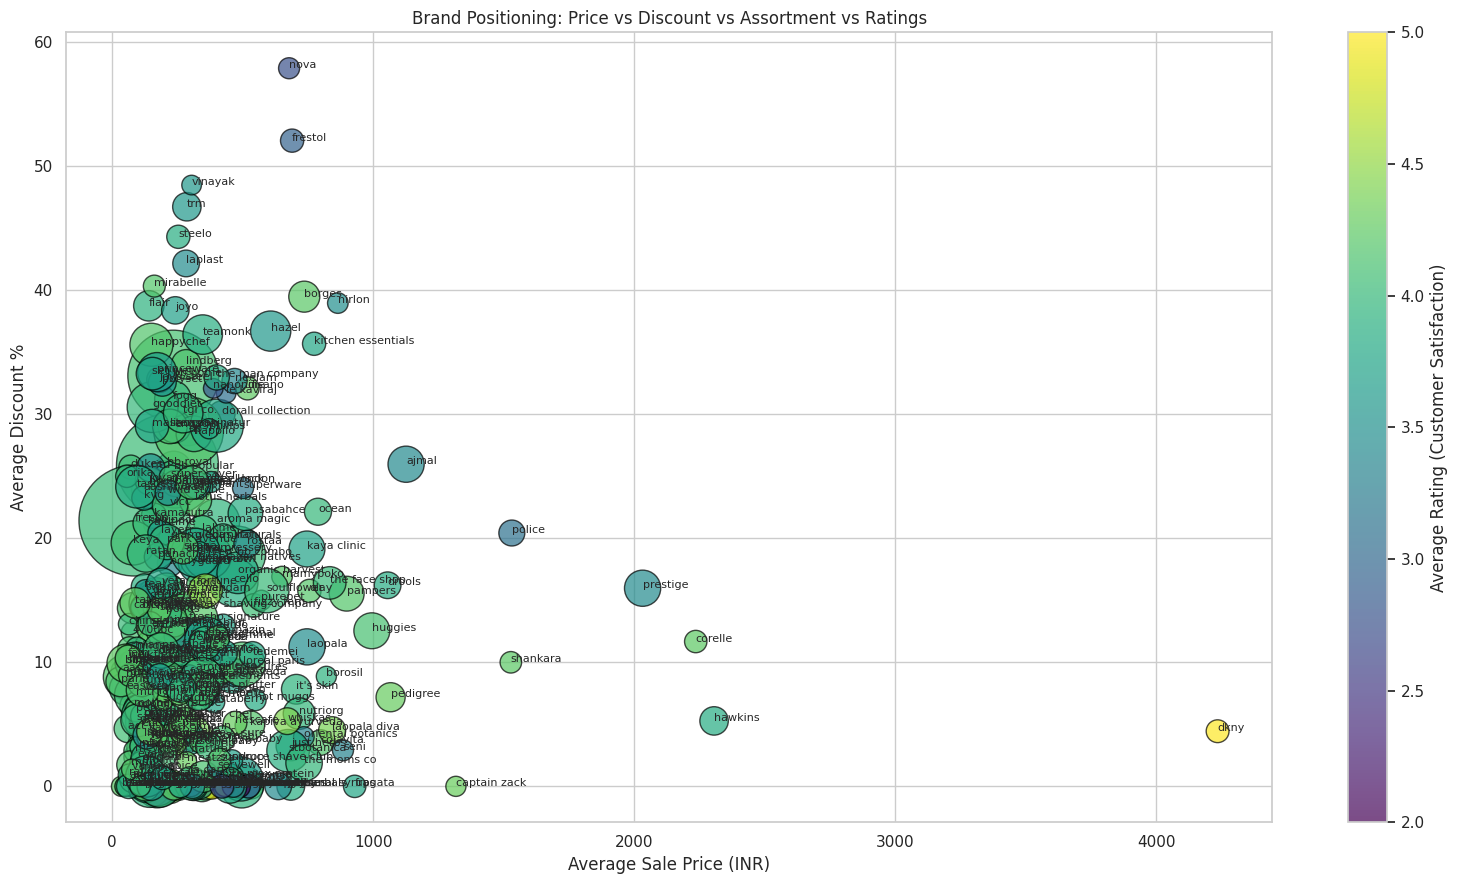

In [ ]:
plt.figure(figsize=(16, 9))
scatter = plt.scatter(
    brand_summary['avg_price'],
    brand_summary['avg_discount'],
    s=brand_summary['product_count'] * 10,          # Bubble size by product assortment
    c=brand_summary['avg_rating'],                  # Color by average rating
    cmap='viridis',
    alpha=0.7,
    edgecolors='black'
)

# Add labels for better-known or larger brands
for i, row in brand_summary.iterrows():
    if row['product_count'] > 15:                   # Label only prominent brands
        plt.text(row['avg_price'], row['avg_discount'], row['brand'], fontsize=8)

# Axis labels and title
plt.xlabel('Average Sale Price (INR)')
plt.ylabel('Average Discount %')
plt.title('Brand Positioning: Price vs Discount vs Assortment vs Ratings')
cbar = plt.colorbar(scatter)
cbar.set_label('Average Rating (Customer Satisfaction)')

plt.grid(True)
plt.tight_layout()
plt.show()

**🧠 Strategic Insights**

✅ 1. Premium & High-Rated

- Hawkins, Corelle, and Shankara:

  - Positioned far right → High price.

  - Small to medium discounts (low price sensitivity).

  - Reasonable to high ratings.

  - Likely targeting premium, quality-conscious segments.

- dkny:

  - Highest price by far (₹4000+) but still has very high ratings (5.0).

  - Low discounting → Confident in brand value.

  - Very niche (small bubble) → Possibly few high-end SKUs.

  - Luxury-niche success.

⚠️ 2. Deep Discount, Low Rating

- Nova, Bristol, Ajmal:

  - High discounts (>40%) but still low ratings.

  - Could indicate quality perception issues or unsuccessful discounting.

  - Likely volume-push without loyalty.

  - Consider product improvement or rebranding.

🧨 3. Discount-Heavy with Wide Assortment

- Brands like Tata, Amul, Catch, India Gate, etc. (many mid-left bubbles):

  - Lower prices.

  - Moderate to high discounts (~15–30%).

  - Large bubbles → Massive assortment.

  - Moderate ratings (mostly 3.5–4.0).

  - Mass-market appeal strategy.

🌟 4. High Ratings + Moderate Price = Sweet Spot

- Brands near the middle (avg price ₹400–₹1000), moderate discount, high color brightness (ratings) and decent bubble size:

  - Likely trusted brands with balanced pricing and quality.

  - Great position to scale or reinforce loyalty with minimal pricing shifts.

👀 5. Clusters of Similar Brands

- Left-hand side dense cluster: Dozens of low-price, low-to-mid discount brands.

  - Highly competitive zone.

  - Differentiation through ratings, packaging, or distribution becomes essential.

#### **✅ 8.3: Segment-Level Positioning**


**🧭 Objective**

Identify how customer satisfaction, pricing, discounting, and assortment vary across product segments (e.g., organic, value-for-money, premium, health-focused, etc.).

Since the dataset might not have explicit segment labels, we’ll typically:

- Create product segments using a proxy like product names, sub-categories, tags, or keywords (e.g., "organic", "combo", "value pack", "premium", etc.).

- Analyze similar to category/brand positioning using a bubble chart.

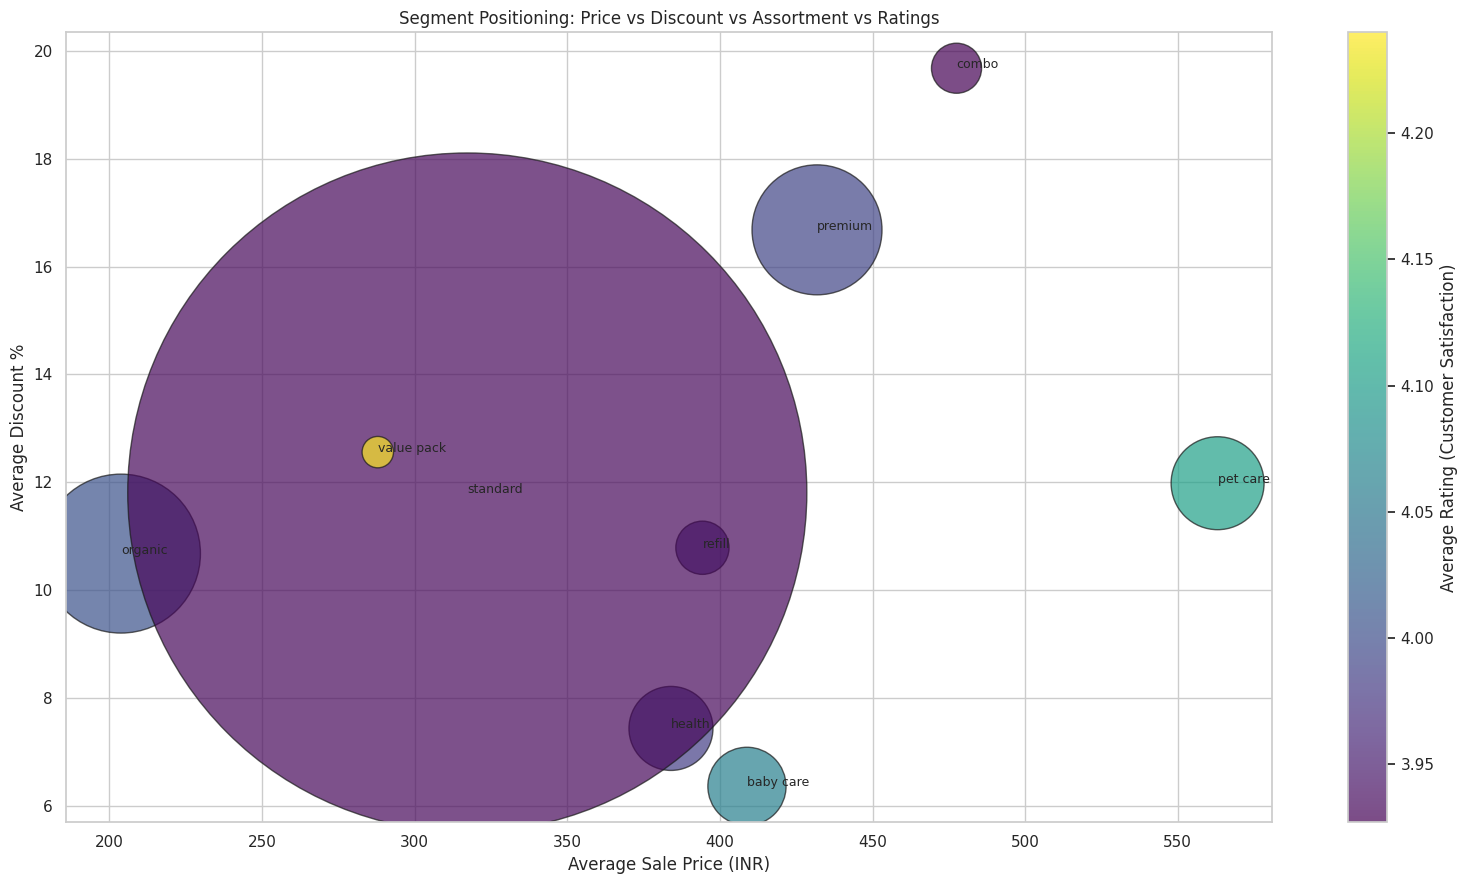

In [ ]:
# Define a function to assign segment labels based on keywords
def assign_segment(name):
    name = name.lower()
    if any(kw in name for kw in ['organic']):
        return 'organic'
    elif any(kw in name for kw in ['premium', 'luxury', 'classic', 'royal']):
        return 'premium'
    elif any(kw in name for kw in ['value pack', 'saver pack', 'super saver']):
        return 'value pack'
    elif any(kw in name for kw in ['combo', 'pack of', 'combo pack']):
        return 'combo'
    elif any(kw in name for kw in ['refill', 'recharge']):
        return 'refill'
    elif any(kw in name for kw in ['health', 'fitness', 'nutri', 'diet', 'diabetic', 'low fat']):
        return 'health'
    elif any(kw in name for kw in ['baby', 'infant', 'toddler']):
        return 'baby care'
    elif any(kw in name for kw in ['dog', 'cat', 'pet', 'puppy', 'kitten']):
        return 'pet care'
    else:
        return 'standard'

# Apply the function to create a new segment column
bb_df['segment'] = bb_df['product'].apply(assign_segment)

# Group by segment and calculate metrics
segment_df = bb_df.groupby('segment').agg({
    'discount_percent': 'mean',
    'sale_price': 'mean',
    'product': 'count',   # proxy for assortment
    'rating': 'mean'      # customer satisfaction
}).reset_index()

# Rename columns for clarity
segment_df.columns = ['Segment', 'Average Discount %', 'Average Sale Price (INR)', 'Product Count', 'Average Rating']

# Plot the bubble chart
plt.figure(figsize=(16, 9))
scatter = plt.scatter(
    data=segment_df,
    x='Average Sale Price (INR)',
    y='Average Discount %',
    s=segment_df['Product Count'] * 10,
    c=segment_df['Average Rating'],
    cmap='viridis',
    alpha=0.7,
    edgecolors='k'
)

# Annotate each bubble with segment name
for i, row in segment_df.iterrows():
    plt.text(row['Average Sale Price (INR)'], row['Average Discount %'], row['Segment'], fontsize=9)

# Final touches
plt.xlabel("Average Sale Price (INR)")
plt.ylabel("Average Discount %")
plt.title("Segment Positioning: Price vs Discount vs Assortment vs Ratings")
plt.colorbar(scatter, label='Average Rating (Customer Satisfaction)')
plt.grid(True)
plt.tight_layout()
plt.show()

**📊 Strategic Takeaways**

1. Best Performing Segments:

  - Value Pack: High customer satisfaction, large assortment, affordable pricing.

  - Baby Care & Pet Care: High satisfaction despite high prices — potential premium segments.

2. Underperformers to Watch:

  - Combo & Refill: High price or discount but lowest satisfaction.

  - Health: Not meeting expectations despite health-centric appeal — consider NPD (new product development) or repositioning.

3. Core Segment:

  - Standard dominates assortment but sits at average across all metrics — may be optimized for pricing/ratings.

---

#### **✅ 8.4: Exploring some KPIs**

**🏭 1. Number of Unique Brands per Category/Subcategory**

📌 Objective: Identify how saturated or competitive each (sub)category is.

In [ ]:
# Unique brands per category
unique_brands_per_category = bb_df.groupby('category')['brand'].nunique().reset_index(name='unique_brands')

# Unique brands per subcategory
unique_brands_per_subcategory = bb_df.groupby('sub_category')['brand'].nunique().reset_index(name='unique_brands')
print(unique_brands_per_category)
print(unique_brands_per_subcategory)

                    category  unique_brands
0                  baby care             65
1      bakery, cakes & dairy             85
2           beauty & hygiene            644
3                  beverages            171
4       cleaning & household            391
5          eggs, meat & fish             44
6   foodgrains, oil & masala            235
7        fruits & vegetables              5
8       gourmet & world food            545
9     kitchen, garden & pets            240
10    snacks & branded foods            354
                sub_category  unique_brands
0       all purpose cleaners            119
1   appliances & electricals             17
2       atta, flours & sooji             38
3           baby accessories              7
4        baby bath & hygiene             27
..                       ...            ...
85            steel utensils             33
86     storage & accessories             61
87                       tea             46
88   tinned & processed food    

**👑 2. Top 5 Brands by Product Count in Each Category**

📌 Objective: Identify dominant players by breadth of assortment.

In [ ]:
top_5_brands_by_category = (
    bb_df.groupby(['category', 'brand'])['product']
    .count()
    .reset_index(name='product_count')
    .sort_values(['category', 'product_count'], ascending=[True, False])
    .groupby('category')
    .head(5)
)
top_5_brands_by_category

category                 brand  product_count
29                   baby care               huggies             67
44                   baby care               pampers             63
37                   baby care               mee mee             41
26                   baby care              himalaya             33
61                   baby care           the moms co             32
66       bakery, cakes & dairy                  amul            111
95       bakery, cakes & dairy      fresho signature             66
77       bakery, cakes & dairy             britannia             46
143      bakery, cakes & dairy     the baker's dozen             41
113      bakery, cakes & dairy            milky mist             36
430           beauty & hygiene                inatur            146
563           beauty & hygiene                  nike            124
224           beauty & hygiene              biotique            115
190           beauty & hygiene           aroma magic            109
277           beauty & hygiene               colgate            107
962                  beverages                vahdam             59
955                  beverages               teamonk             47
923                  beverages                  real             31
870                  beverages       kapiva ayurveda             21
796                  beverages              18 herbs             20
1056      cleaning & household                    dp            110
1197      cleaning & household                nakoda             91
1000      cleaning & household               bb home             82
1154      cleaning & household                  liao             62
1086      cleaning & household                  gala             60
1372         eggs, meat & fish                fresho             71
1373         eggs, meat & fish      fresho signature             31
1383         eggs, meat & fish              la carne             28
1375         eggs, meat & fish          golden prize             19
1384         eggs, meat & fish               meatzza             19
1423  foodgrains, oil & masala              bb royal            525
1556  foodgrains, oil & masala        organic tattva             94
1500  foodgrains, oil & masala                  keya             83
1401  foodgrains, oil & masala             24 mantra             80
1484  foodgrains, oil & masala     himalayan natives             61
1636       fruits & vegetables                fresho            544
1638       fruits & vegetables             supa corn              6
1639       fruits & vegetables                 tadaa              5
1635       fruits & vegetables              bb combo              1
1637       fruits & vegetables            rosebazaar              1
1832      gourmet & world food              gooddiet             97
2027      gourmet & world food              puramate             84
1991      gourmet & world food            nutty yogi             79
2116      gourmet & world food               tgl co.             76
1817      gourmet & world food      fresho signature             74
2195    kitchen, garden & pets               bb home            299
2236    kitchen, garden & pets                    dp            136
2284    kitchen, garden & pets                  iveo            118
2213    kitchen, garden & pets                 cello            103
2221    kitchen, garden & pets             claycraft             93
2641    snacks & branded foods                   mtr             69
2737    snacks & branded foods              sunfeast             67
2742    snacks & branded foods               tasties             59
2480    snacks & branded foods             britannia             58
2702    snacks & branded foods  ritebite max protein             51

**📊 3. Brand Share (%) within Subcategories**

📌 Objective: Determine brand concentration and distribution.

In [ ]:
# Total products per subcategory
total_products_subcat = bb_df.groupby('sub_category')['product'].count().reset_index(name='total_products')

# Product count per brand per subcategory
brand_share_subcat = (
    bb_df.groupby(['sub_category', 'brand'])['product']
    .count()
    .reset_index(name='brand_products')
    .merge(total_products_subcat, on='sub_category')
)

# Calculating share %
brand_share_subcat['brand_share_pct'] = (brand_share_subcat['brand_products'] / brand_share_subcat['total_products']) * 100
brand_share_subcat

sub_category      brand  brand_products  total_products  \
0     all purpose cleaners        365               1             475   
1     all purpose cleaners  abzorb-it               1             475   
2     all purpose cleaners       ajax               2             475   
3     all purpose cleaners     arnigo               4             475   
4     all purpose cleaners   astonish               1             475   
...                    ...        ...             ...             ...   
3921                 water    bisleri               5              17   
3922                 water    glaceau               1              17   
3923                 water  himalayan               2              17   
3924                 water     kinley               2              17   
3925                 water       tata               1              17   

      brand_share_pct  
0            0.210526  
1            0.210526  
2            0.421053  
3            0.842105  
4            0.210526  
...               ...  
3921        29.411765  
3922         5.882353  
3923        11.764706  
3924        11.764706  
3925         5.882353  

[3926 rows x 5 columns]

**📉 4. Categories with Brand Monopolies (<2 Brands)**

📌 Objective: Identify categories lacking competition.

In [ ]:
# Count number of unique brands per category
brand_monopolies = unique_brands_per_category[unique_brands_per_category['unique_brands'] < 2]
brand_monopolies

Empty DataFrame
Columns: [category, unique_brands]
Index: []

### **🎯 Objective 3 Summary: Brand & Category Positioning**

Goal: Understand brand and category positioning in terms of price, assortment, discounting, and customer engagement to reveal market segmentation.

1. **✅ Category-Level Positioning**
- Premium Segments: Baby Care, Gourmet & World Food – high price, low discount, strong ratings.

- Essentials: Foodgrains, Cleaning – balanced pricing, good engagement; Snacks – low price, high demand.

- Outliers: Kitchen, Garden & Pets – high price + discount but low ratings; Fruits & Vegetables – low price, high discount due to perishability.

2. **✅ Brand-Level Positioning**
- Premium Brands: Hawkins, Corelle, Shankara – high price, low discount, strong ratings.

- Discount-Heavy, Low Ratings: Nova, Bristol, Ajmal – deep discounts, poor engagement.

- Wide Assortment, Mid-Range Strategy: Tata, Amul, Catch – broad selection, moderate pricing.

- Sweet Spot: Mid-price, mid-discount brands with high ratings — good for scaling.

- Competitive Cluster: Low-price, low-discount brands — need differentiation.

3. **✅ Segment-Level Positioning**
- High Performers: Value Pack, Baby Care, Pet Care – affordable or premium, high satisfaction.

- Underperformers: Combo, Refill, Health – high price/discount, low satisfaction.

- Standard Segment: Dominates volume, but needs optimization.

4. **✅ Additional KPIs**
- Unique Brands per Category: Most brands in Beauty & Hygiene (644) and Gourmet & World Food (545); least in Fruits & Vegetables (5) — possible monopoly.

- Top Brands by Assortment: Identifies dominant players in each category.

- Brand Share in Subcategories: Measures brand concentration.

- Monopolistic Categories: Categories with fewer than 2 brands, open for new entrants.

---

## **🎯 Business Objective 4: Opportunity and Gap Identification**

✅ Goal:

Identify underrepresented categories, untapped pricing/discount gaps, low-competition segments, or high-potential emerging brands to inform strategic expansion, assortment planning, or partnerships.

#### **✅ 9.1: Categories with Low Product Counts but High Price Averages**

Purpose: Identify premium opportunities or categories underserved in variety.

Approach:

- Group by category.

- Calculate product count and average price.

- Filter for low counts and high price averages.

In [ ]:
# Group by category
category_stats = bb_df.groupby('category').agg(
    product_count=('sale_price', 'count'),
    avg_price=('sale_price', 'mean')
).reset_index()

# Sort to identify categories with low product counts and high prices
# You can customize thresholds (e.g., product_count < 20 and avg_price > 400)
low_count_high_price = category_stats[
    (category_stats['product_count'] < 20) &
    (category_stats['avg_price'] > 400)
].sort_values(by='avg_price', ascending=False)

# Display or export result
print(low_count_high_price)

Empty DataFrame
Columns: [category, product_count, avg_price]
Index: []


We are getting no results, it means that no category satisfies both conditions (e.g., product count < 20 and average price > ₹400) using the current thresholds.

#### **✅ 9.2: Subcategories with Few Brands and High Prices**

Purpose: Spot undercompetitive niches where new brands could enter.

Approach:

- Group by subcategory.

- Count distinct brands and compute average prices.

- Highlight subcategories with low brand presence and high pricing.

In [ ]:
# Step 1: Group by subcategory and compute unique brand count & average sale price
subcat_stats = bb_df.groupby('sub_category').agg(
    brand_count=('brand', pd.Series.nunique),
    avg_price=('sale_price', 'mean')
).reset_index()

# Step 2: Use percentiles to define 'few brands' and 'high price'
low_brand_threshold = subcat_stats['brand_count'].quantile(0.25)
high_price_threshold = subcat_stats['avg_price'].quantile(0.75)

# Step 3: Filter subcategories satisfying both conditions
few_brands_high_price = subcat_stats[
    (subcat_stats['brand_count'] <= low_brand_threshold) &
    (subcat_stats['avg_price'] >= high_price_threshold)
].sort_values(by='avg_price', ascending=False)

print(few_brands_high_price)

           sub_category  brand_count   avg_price
62        mutton & lamb            6  716.005000
39    flask & casserole            7  505.729167
61  mothers & maternity           12  443.419032
3      baby accessories            7  409.648649
5   baby food & formula           11  358.315625


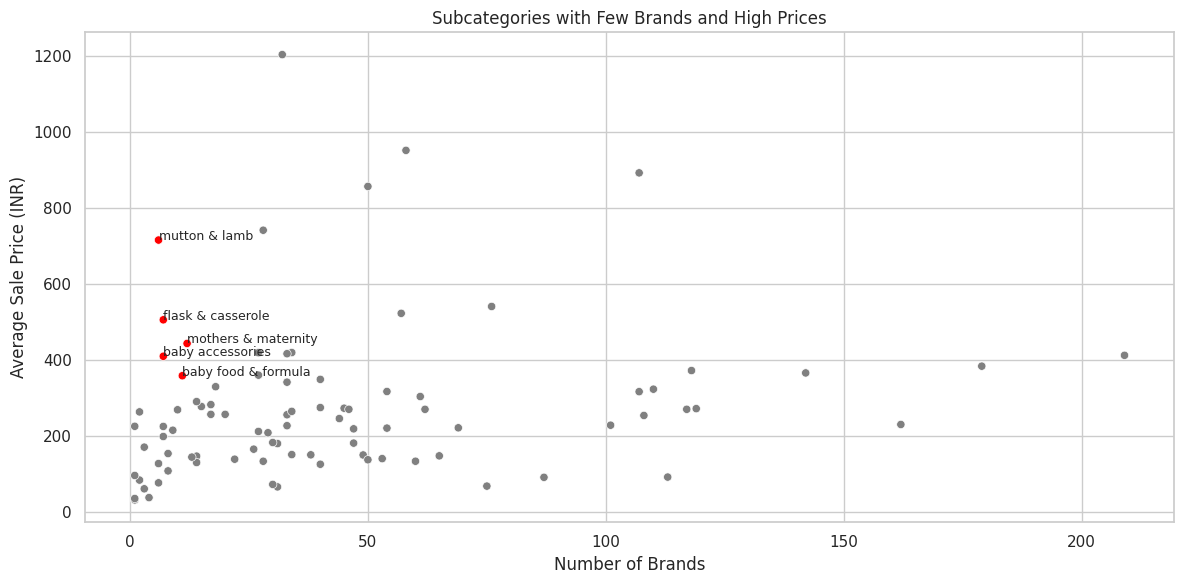

In [ ]:
# Scatter plot: X-axis = brand count, Y-axis = average price
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=subcat_stats,
    x='brand_count',
    y='avg_price',
    hue=subcat_stats['sub_category'].isin(few_brands_high_price['sub_category']),
    palette={True: 'red', False: 'grey'},
    legend=False
)

# Annotate subcategories identified
for _, row in few_brands_high_price.iterrows():
    plt.text(row['brand_count'], row['avg_price'], row['sub_category'], fontsize=9)

plt.xlabel('Number of Brands')
plt.ylabel('Average Sale Price (INR)')
plt.title('Subcategories with Few Brands and High Prices')
plt.tight_layout()
plt.show()

**🧠 Interpretation:**

We’ll use the highlighted red dots to pinpoint high-priced subcategories that are dominated by very few brands. These are potential opportunities for:

- Introducing competitive alternatives

- Exploring bundling or pricing strategies

- Partnering with premium brands to diversify the offering

#### **✅ 9.3: Potential Bundling Candidates**

Purpose: Identify products that could be sold together as bundles.

Approach:

- Within each subcategory, look for clusters of products with similar price points.

- Use a small standard deviation range or clustering on price.

In [ ]:
# Step 1: Define a function to find bundling candidates within each subcategory
def find_bundling_candidates(group, price_tolerance=5):
    group = group.copy()
    group['price_diff'] = group['sale_price'].diff().abs()
    return group[group['price_diff'] <= price_tolerance]

# Step 2: Sort and apply within each subcategory
df_sorted = bb_df.sort_values(by=['sub_category', 'sale_price'])
bundling_candidates = df_sorted.groupby('sub_category', group_keys=False).apply(
    lambda x: find_bundling_candidates(x, price_tolerance=5)  # Adjust ₹5 tolerance as needed
)

# Step 3: Select relevant columns
bundling_candidates = bundling_candidates[['product', 'sub_category', 'brand', 'sale_price']]
bundling_candidates.head(10)

product  \
9394                       toilet cleaner - super strong   
5469   vegetable & fruit wash - 100% natural action, ...   
21882                       emasol all surface sanitizer   
11928                                      glass cleaner   
4694                                      toilet cleaner   
24438                           surface cleaner - sandal   
25806                            surface cleaner - flora   
26493                          surface cleaner - jasmine   
14800  disinfectant surface & floor cleaner liquid - ...   
10721                     perfumed herbal phenyle - rose   

               sub_category       brand  sale_price  
9394   all purpose cleaners   good home        25.0  
5469   all purpose cleaners     nimwash        30.0  
21882  all purpose cleaners       emami        30.0  
11928  all purpose cleaners     floroma        30.5  
4694   all purpose cleaners     floroma        32.5  
24438  all purpose cleaners     homizol        32.5  
25806  all purpose cleaners     homizol        32.5  
26493  all purpose cleaners     homizol        32.5  
14800  all purpose cleaners       lizol        38.0  
10721  all purpose cleaners  smart home        39.0

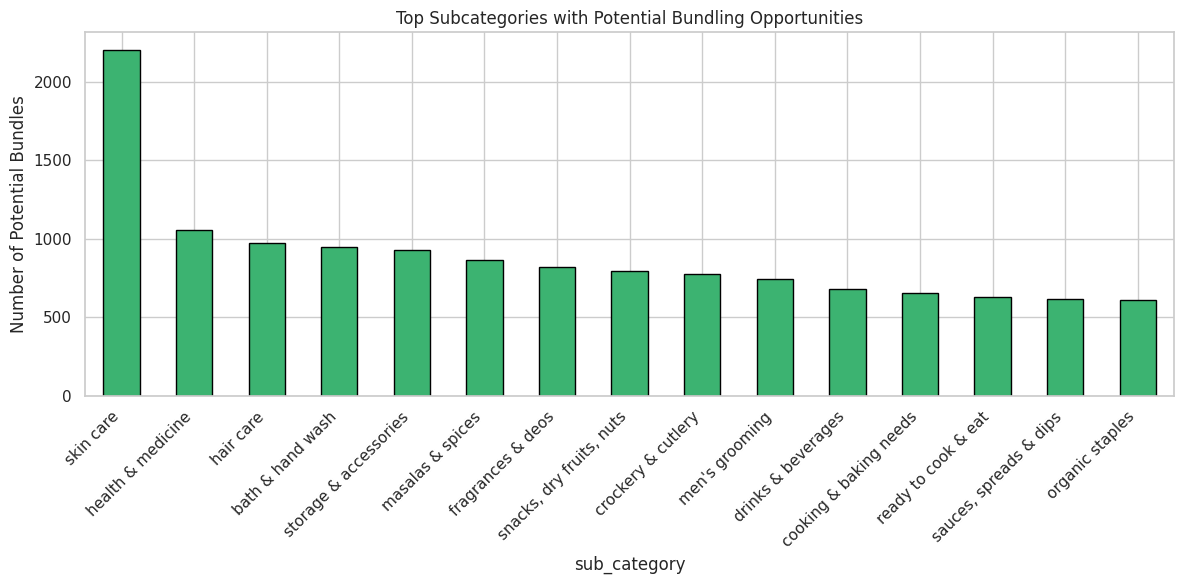

In [ ]:
# Count of bundling pairs per subcategory
bundling_density = bundling_candidates.groupby('sub_category').size().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
bundling_density.head(15).plot(kind='bar', color='mediumseagreen', edgecolor='black')
plt.ylabel('Number of Potential Bundles')
plt.title('Top Subcategories with Potential Bundling Opportunities')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**✅ Key Insights:**

- 🧴 Skin care leads by a large margin—likely due to a wide range of similar-priced creams, lotions, etc.

- 💊 Health & medicine, hair care, and bath & hand wash also show strong bundling opportunities.

- These categories could benefit from:

  - Combo packs

  - "Buy 2, Save ₹X" offers

  - Thematic bundles (e.g., “Monsoon Hair Care Pack”)

#### **✅ 9.4: Categories Lacking Tiered Options**

Find categories that do not offer clear low, mid, and premium price bands.

In [ ]:
# Initialize list to hold structured records
tier_records = []

# Calculate price tier counts for each category
for category, group in bb_df.groupby('category'):
    prices = group['sale_price']
    q1 = prices.quantile(0.33)
    q2 = prices.quantile(0.66)

    low = (prices < q1).sum()
    mid = ((prices >= q1) & (prices < q2)).sum()
    high = (prices >= q2).sum()

    present_tiers = sum([low > 0, mid > 0, high > 0])
    missing_tiers = 3 - present_tiers

    tier_records.append({
        'category': category,
        'low': low,
        'mid': mid,
        'high': high,
        'missing_tiers': missing_tiers
    })

# Convert to DataFrame
tier_gap_df = pd.DataFrame(tier_records)

# Sort and preview
tier_gap_df = tier_gap_df.sort_values(by='missing_tiers', ascending=False)
tier_gap_df.head(10)

category   low   mid  high  missing_tiers
0                 baby care   201   201   208              0
1     bakery, cakes & dairy   281   276   294              0
2          beauty & hygiene  2595  2590  2682              0
3                 beverages   289   290   305              0
4      cleaning & household   867   898   909              0
5         eggs, meat & fish   116   112   122              0
6  foodgrains, oil & masala   877   889   910              0
7       fruits & vegetables   167   198   192              0
8      gourmet & world food  1517  1534  1639              0
9    kitchen, garden & pets  1119  1233  1228              0

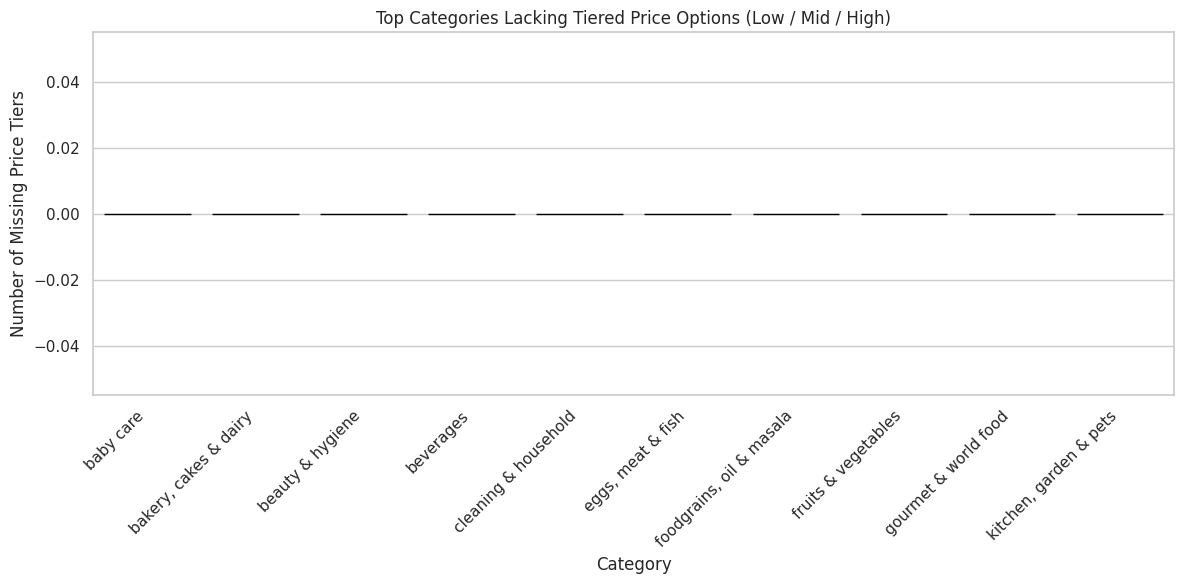

In [ ]:
# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=tier_gap_df.head(10),
    x='category',
    y='missing_tiers',
    palette='Reds_r',
    edgecolor='black'
)
plt.title("Top Categories Lacking Tiered Price Options (Low / Mid / High)")
plt.ylabel("Number of Missing Price Tiers")
plt.xlabel("Category")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**✅ Insight for KPI 4: Categories Lacking Tiered Options**

- Finding: No major categories are missing tiered pricing structures. All 10 categories listed have balanced distribution across low, mid, and high price bands.

- Implication:
BigBasket seems to be doing well in offering diverse price points across key categories — catering to budget, mid-range, and premium segments. This supports both value-seeking and quality-conscious customers.

- Recommendation:
Instead of broad categories, we might want to drill down into subcategories to see if certain segments (e.g., niche product lines) lack price variation.

#### **✅ 9.5: Sub categories Lacking Tiered Options**

Find sub categories that do not offer clear low, mid, and premium price bands.

**✅ Step 1: Define Pricing Tiers & Count per Subcategory**

In [ ]:
# Initialize list to hold structured records
tier_records = []

# Calculate price tier counts for each category
for sub_category, group in bb_df.groupby('sub_category'):
    prices = group['sale_price']
    q1 = prices.quantile(0.33)
    q2 = prices.quantile(0.66)

    low = (prices < q1).sum()
    mid = ((prices >= q1) & (prices < q2)).sum()
    high = (prices >= q2).sum()

    present_tiers = sum([low > 0, mid > 0, high > 0])
    missing_tiers = 3 - present_tiers

    tier_records.append({
        'sub_category': sub_category,
        'low': low,
        'mid': mid,
        'high': high,
        'missing_tiers': missing_tiers
    })

# Convert to DataFrame
tier_gap_df = pd.DataFrame(tier_records)

# Sort and preview
tier_gap_df = tier_gap_df.sort_values(by='missing_tiers', ascending=False)
tier_gap_df.head(10)

sub_category  low  mid  high  missing_tiers
57                 marinades    0    0     1              2
74        pork & other meats    0    3     2              1
2       atta, flours & sooji   48   52    52              0
3           baby accessories    8   11    18              0
4        baby bath & hygiene   68   68    70              0
5        baby food & formula   15   16    17              0
6              bakery snacks   13   13    13              0
7                   bakeware   16   16    16              0
0       all purpose cleaners  157  152   166              0
1   appliances & electricals   44   47    47              0

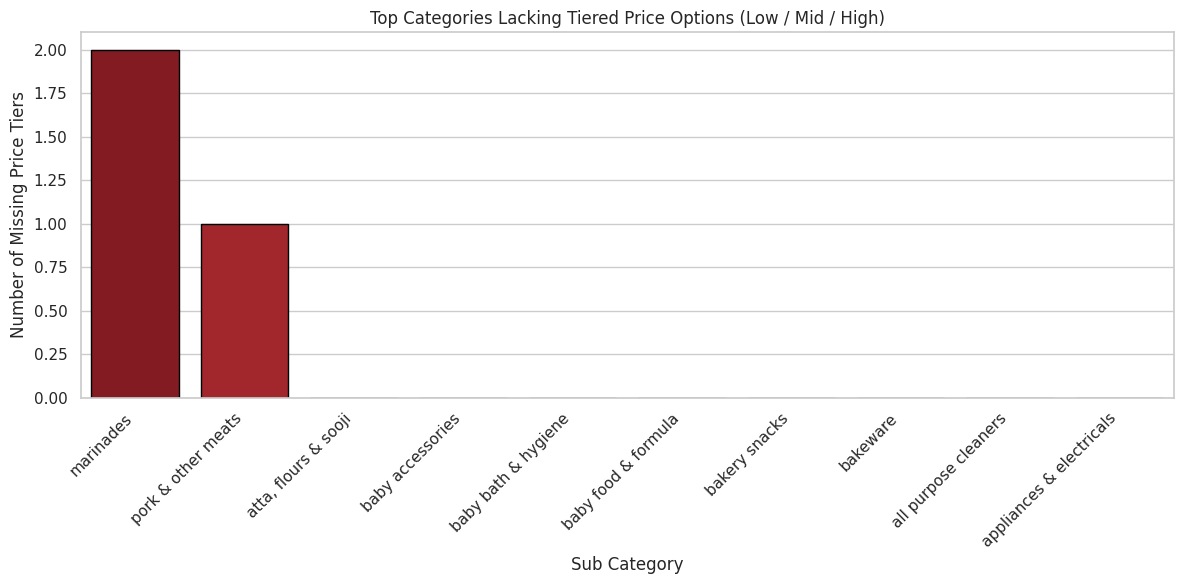

In [ ]:
# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=tier_gap_df.head(10),
    x='sub_category',
    y='missing_tiers',
    palette='Reds_r',
    edgecolor='black'
)
plt.title("Top Categories Lacking Tiered Price Options (Low / Mid / High)")
plt.ylabel("Number of Missing Price Tiers")
plt.xlabel("Sub Category")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**📊 Insight: Subcategories Lacking Tiered Pricing Segments**

🔎 Key Observations:

- Lack of tiered pricing suggests limited product variety for different income segments.

- This can hamper sales potential by excluding customers looking for affordable or premium alternatives.

- It’s a missed opportunity for strategic pricing, bundling, and upselling.

📌 Recommended Actions:

- Audit Products in Marinades & Pork Subcategory – Check if SKU additions can fill the missing tiers.

- Introduce Entry-level Options – Partner with value brands or offer smaller packs to cater to price-sensitive users.

- Explore Premium Extensions – For subcategories missing high-end tiers, consider premium branding or gourmet variants.

### **✅ Objective 4 Summary: Opportunity & Gap Identification**

🔍 Goal: Find untapped areas in BigBasket’s assortment and pricing for new revenue or partnerships.

1. **📌 Low Product Count + High Price Categories**
- Result: No such categories found.

- Insight: BigBasket avoids niche, expensive segments — focusing more on mass-market offerings.

2. **📌 Subcategories with Few Brands + High Prices**
- Examples: Mutton & Lamb, Flask & Casserole, Mothers & Maternity, Baby Accessories

- Insight: Undercompetitive, high-value niches — good for new brand entry or premium expansion.

3. **📌 Potential Bundling Candidates**
- Method: Grouped similar-priced products (₹5 range) within subcategories.

- Top Picks: Skin Care, Health & Medicine, Hair Care, Bath & Hand Wash

- Insight: Great for themed bundles, combo deals, and value packs.

4. **📌 Categories Lacking Tiered Options**
- Result: No major gaps — all major categories have low/mid/high-priced items.

- Insight: Assortment is well-balanced at the category level.

5. **📌 Subcategories Lacking Tiered Options**
- Key Areas: Marinades, Pork

- Insight: Missed pricing variety — could add value and premium options.

- Suggestions:

  - Introduce smaller/value packs

  - Add premium lines for upselling

---

## **🏁 Final Summary & Conclusion**

Over the course of this EDA, we uncovered key insights across BigBasket’s assortment, pricing, brand landscape, and growth opportunities — all aligned with the platform’s business goals.

### **✅ Objective 1: Product Assortment Optimization**

- Insight: Broad product range with dense subcategories (e.g., Skincare, Health).

- Action: Rationalize SKUs in overcrowded segments; expand underrepresented areas like Marinades and Pork.

---

### **💰 Objective 2: Pricing Strategy Analysis**

- Insight: Diverse pricing strategies across segments.

- Action: Protect margins in over-discounted premium areas; optimize bundles and tiered pricing for price-sensitive categories.

---

### **🏷️ Objective 3: Brand & Category Positioning**

- Insight: Strong premium and mid-tier brand presence; some clusters lack differentiation.

- Action: Identify high-rating mid-tier brands for scaling; monitor underperforming discount-heavy brands.

---

### **🔍 Objective 4: Opportunity & Gap Identification**

- Insight: Few subcategories show low brand presence with high prices—prime for expansion.

- Action: Explore new brand partnerships, bundling opportunities, and tier diversity in niche subcategories.

---

### **🎯 Final Takeaways**

- BigBasket is well-structured in terms of product breadth, price coverage, and brand variety.

- Strategic gaps exist in niche subcategories, pricing tiers, and brand concentration.

- There’s strong potential for revenue growth through smart bundling, SKU refinement, and targeted assortment expansion.
---

## **🧠 Strategic Recommendations Based on Insights**

### **📦 1. SKU Rationalization & Assortment Streamlining**

- Why: Overcrowded subcategories (e.g., Skincare, Health & Medicine) may have redundant or underperforming products.

- Action:

  - Use product ratings/sales to identify low-value SKUs.

  - Cluster similar items to reduce duplication.

  - Focus on high-margin, high-demand variants.

---

### **🧑‍🍳 2. Expand Underserved & Niche Segments**

- Why: Categories like Marinades, Pork, and Flower Bouquets show limited assortment but potential for differentiation.

- Action:

  - Add affordable/value SKUs.

  - Test premium variants or bundle with related categories.

  - Partner with niche or local suppliers.

---

### **💸 3. Optimize Discount Strategies**

- Why: High discounts in premium segments (e.g., Cookware, Fragrances) may hurt margins.

- Action:

  - Reassess necessity of discounts in low-elasticity segments.

  - Use promo targeting for high-inventory or footfall-driving items.

  - Monitor discount impact on brand equity and price perception.

---

### **🛍️ 4. Leverage Smart Bundling**

- Why: Subcategories like Skin Care, Health, and Hair Care have strong bundling potential.

- Action:

  - Create thematic packs (e.g., "Self-Care Sunday", "Monsoon Essentials").

  - Offer combo deals using price clustering logic.

  - Promote bundles to increase average order value (AOV).

---

### **🧴 5. Strengthen Mid-Tier & High-Rated Brands**

- Why: Brands with balanced pricing and strong ratings are ideal for scaling.

- Action:

  - Prioritize them in search results and category placements.

  - Co-create marketing campaigns or exclusive product lines.

  - Phase out poor-performing brands with deep discounts and low ratings.

---

### **📊 6. Monitor Pricing Tier Gaps in Subcategories**

- Why: Some subcategories lack low/mid/high price tiers, limiting consumer choice.

- Action:

  - Introduce entry-level packs and premium formats in single-tier segments.

  - Use competitive benchmarking to identify tier gaps.

  - Target tier expansion during assortment planning.

---